In [1]:
import numpy as np
import pandas as pd

In [34]:
diversity_metrics = pd.read_csv('all_diversity.csv')

In [16]:
def ensure_unique_folders(df, threshold):
    """
    Ensures uniqueness of the "Folder" field in the dataframe.
    
    Args:
    - df (pd.DataFrame): The dataframe to process.
    - threshold (int): The maximum allowable value for "Count".
    
    Returns:
    - pd.DataFrame: A dataframe where the "Folder" field is unique, and 
                    the chosen row for each folder has the largest "Count" 
                    below the threshold.
    """

    # Filter rows where Count is less than the threshold
    df = df[df['Count'] <= threshold]

    # Sort by Folder and Count, then drop duplicates on Folder while keeping the last (highest Count)
    df = df.sort_values(by=['Folder', 'Count']).drop_duplicates(
        subset='Folder', keep='last')

    return df

In [38]:
diversity_metrics_extracted = ensure_unique_folders(diversity_metrics, 1000)
diversity_metrics_extracted

Folder  Count  Vendi (vgg19-gram)  \
857                                       .   1000            8.939584   
855                  Abstract_Expressionism   1000           10.345274   
797     Abstract_Expressionism/brice-marden     54            4.686884   
796       Abstract_Expressionism/cy-twombly     72            5.765179   
800     Abstract_Expressionism/hans-hofmann     75            3.783502   
..                                      ...    ...                 ...   
512  concept_art/greg=rutkowski_concept_art    129            3.517280   
514   concept_art/sergey=vasnev_concept_art     62            3.508784   
812                                  others    725           11.402087   
808                          others/davinci     57            2.778305   
809                others/matthiasheiderich    555           10.049367   

     Dissimilarity (vgg19-gram)  Std (vgg19-gram)  Vendi (convnextv2-l)  \
857                    0.366176        4692218.00             58.486599   
855                    0.385561        4394681.00             60.718380   
797                    0.325882        6167212.50             10.638475   
796                    0.356882        3272156.50             15.812095   
800                    0.240686        3341381.75             13.588293   
..                          ...               ...                   ...   
512                    0.201558        2126045.75             16.688637   
514                    0.217966        1585251.00             16.401848   
812                    0.413206        4882246.00             60.010361   
808                    0.167717        2338460.25              7.775822   
809                    0.377888        5198677.50             49.367802   

     Dissimilarity (convnextv2-l)  Std (convnextv2-l)  Vendi (dinov2-l-fb)  \
857                      0.773112           24.110567           126.302803   
855                      0.738135           25.082428            57.214905   
797                      0.541685           21.102821             9.069160   
796                      0.617927           23.332573            12.896381   
800                      0.546192           21.600964             8.345932   
..                            ...                 ...                  ...   
512                      0.578689           20.975582            25.685740   
514                      0.635167           21.347809            30.047962   
812                      0.786106           23.344013           157.095398   
808                      0.427636           16.768085             6.251285   
809                      0.725071           22.440804           133.243927   

     Dissimilarity (dinov2-l-fb)  Std (dinov2-l-fb)  Vendi (clip-L-14)  \
857                     0.844104          41.251266          32.026257   
855                     0.668473          35.788841          13.081425   
797                     0.485031          30.975021           5.189494   
796                     0.533181          32.519447           5.673102   
800                     0.433903          29.095196           4.062295   
..                           ...                ...                ...   
512                     0.665941          37.156960           9.760063   
514                     0.762195          40.281330           6.297496   
812                     0.910396          43.678505          29.038992   
808                     0.370919          27.985962           5.867595   
809                     0.871033          42.760017          22.902479   

     Dissimilarity (clip-L-14)  Std (clip-L-14)  
857                   0.586443        15.892152  
855                   0.399684        13.092562  
797                   0.311615        11.589130  
796                   0.320914        11.909410  
800                   0.240924        10.266905  
..                         ...              ...  
512                   0.403038        13.048491  
514                  

In [42]:
diversity_metrics_extracted[diversity_metrics_extracted['Folder']=='.']

Folder  Count  Vendi (vgg19-gram)  Dissimilarity (vgg19-gram)  \
857      .   1000            8.939584                    0.366176   

     Std (vgg19-gram)  Vendi (convnextv2-l)  Dissimilarity (convnextv2-l)  \
857         4692218.0             58.486599                      0.773112   

     Std (convnextv2-l)  Vendi (dinov2-l-fb)  Dissimilarity (dinov2-l-fb)  \
857           24.110567           126.302803                     0.844104   

     Std (dinov2-l-fb)  Vendi (clip-L-14)  Dissimilarity (clip-L-14)  \
857          41.251266          32.026257                   0.586443   

     Std (clip-L-14)  
857        15.892152

In [40]:
for row in diversity_metrics_extracted.head():
    print(row)

Folder
Count
Vendi (vgg19-gram)
Dissimilarity (vgg19-gram)
Std (vgg19-gram)
Vendi (convnextv2-l)
Dissimilarity (convnextv2-l)
Std (convnextv2-l)
Vendi (dinov2-l-fb)
Dissimilarity (dinov2-l-fb)
Std (dinov2-l-fb)
Vendi (clip-L-14)
Dissimilarity (clip-L-14)
Std (clip-L-14)


In [41]:
diversity_metrics_extracted.head()

Folder  Count  Vendi (vgg19-gram)  \
857                                    .   1000            8.939584   
855               Abstract_Expressionism   1000           10.345274   
797  Abstract_Expressionism/brice-marden     54            4.686884   
796    Abstract_Expressionism/cy-twombly     72            5.765179   
800  Abstract_Expressionism/hans-hofmann     75            3.783502   

     Dissimilarity (vgg19-gram)  Std (vgg19-gram)  Vendi (convnextv2-l)  \
857                    0.366176        4692218.00             58.486599   
855                    0.385561        4394681.00             60.718380   
797                    0.325882        6167212.50             10.638475   
796                    0.356882        3272156.50             15.812095   
800                    0.240686        3341381.75             13.588293   

     Dissimilarity (convnextv2-l)  Std (convnextv2-l)  Vendi (dinov2-l-fb)  \
857                      0.773112           24.110567           126.302803   
855                      0.738135           25.082428            57.214905   
797                      0.541685           21.102821             9.069160   
796                      0.617927           23.332573            12.896381   
800                      0.546192           21.600964             8.345932   

     Dissimilarity (dinov2-l-fb)  Std (dinov2-l-fb)  Vendi (clip-L-14)  \
857                     0.844104          41.251266          32.026257   
855                     0.668473          35.788841          13.081425   
797                     0.485031          30.975021           5.189494   
796                     0.533181          32.519447           5.673102   
800                     0.433903          29.095196           4.062295   

     Dissimilarity (clip-L-14)  Std (clip-L-14)  
857                   0.586443        15.892152  
855                   0.399684        13.092562  
797                   0.311615        11.589130  
796                   0.320914        11.909410  
800                   0.240924        10.266905

In [55]:
metrics_avg = {}

for col in diversity_metrics_extracted.columns:
    if col not in 'Folder':
        metrics_avg[col] = {}

In [47]:
metrics_avg

{'Count': {},
 'Vendi (vgg19-gram)': {},
 'Dissimilarity (vgg19-gram)': {},
 'Std (vgg19-gram)': {},
 'Vendi (convnextv2-l)': {},
 'Dissimilarity (convnextv2-l)': {},
 'Std (convnextv2-l)': {},
 'Vendi (dinov2-l-fb)': {},
 'Dissimilarity (dinov2-l-fb)': {},
 'Std (dinov2-l-fb)': {},
 'Vendi (clip-L-14)': {},
 'Dissimilarity (clip-L-14)': {},
 'Std (clip-L-14)': {}}

In [56]:
import os
from tqdm import tqdm

common_ref = diversity_metrics_extracted[diversity_metrics_extracted['Folder'] == "."].iloc[0]
print(common_ref)

for index, row in tqdm(diversity_metrics_extracted.iterrows()):
    folder_path = row['Folder']
    if folder_path == '.':
        continue  # Skip the root directory

    parts = folder_path.split(os.path.sep)

    if len(parts) == 2:
        types = ['all_artists', parts[0]]
        reference_rows = [common_ref,
                          diversity_metrics_extracted[
            diversity_metrics_extracted['Folder'] == parts[0]].iloc[0]]
    else:
        types = ['all_styles']
        reference_rows = [common_ref]

    for col in diversity_metrics_extracted.columns[1:]:
        for type_, reference_row in zip(types, reference_rows):
            if reference_row[col] == 0:  # Check to avoid division by zero
                ratio = 0
            else:
                ratio = row[col] / reference_row[col]
            # Storing the ratio and the name of the row
            if type_ not in metrics_avg[col]:
                metrics_avg[col][type_] = []
            metrics_avg[col][type_].append((folder_path, ratio))

Folder                                   .
Count                                 1000
Vendi (vgg19-gram)                8.939584
Dissimilarity (vgg19-gram)        0.366176
Std (vgg19-gram)                 4692218.0
Vendi (convnextv2-l)             58.486599
Dissimilarity (convnextv2-l)      0.773112
Std (convnextv2-l)               24.110567
Vendi (dinov2-l-fb)             126.302803
Dissimilarity (dinov2-l-fb)       0.844104
Std (dinov2-l-fb)                41.251266
Vendi (clip-L-14)                32.026257
Dissimilarity (clip-L-14)         0.586443
Std (clip-L-14)                  15.892152
Name: 857, dtype: object


530it [00:00, 2403.86it/s]


In [57]:
metrics_avg

{'Count': {'all_styles': [('Abstract_Expressionism', 1.0),
   ('Action_painting', 0.098),
   ('Analytical_Cubism', 0.11),
   ('Art_Nouveau_Modern', 1.0),
   ('Baroque', 1.0),
   ('Color_Field_Painting', 1.0),
   ('Contemporary_Realism', 0.481),
   ('Cubism', 1.0),
   ('Early_Renaissance', 1.0),
   ('Expressionism', 1.0),
   ('Fauvism', 0.934),
   ('High_Renaissance', 1.0),
   ('Impressionism', 1.0),
   ('Mannerism_Late_Renaissance', 1.0),
   ('Minimalism', 1.0),
   ('Naive_Art_Primitivism', 1.0),
   ('New_Realism', 0.314),
   ('Northern_Renaissance', 1.0),
   ('Pointillism', 0.513),
   ('Pop_Art', 1.0),
   ('Post_Impressionism', 1.0),
   ('Realism', 1.0),
   ('Rococo', 1.0),
   ('Romanticism', 1.0),
   ('Symbolism', 1.0),
   ('Synthetic_Cubism', 0.216),
   ('Ukiyo_e', 1.0),
   ('anime', 1.0),
   ('concept_art', 0.349),
   ('others', 0.725)],
  'all_artists': [('Abstract_Expressionism/brice-marden', 0.054),
   ('Abstract_Expressionism/cy-twombly', 0.072),
   ('Abstract_Expressionism/han

In [75]:
diversity_metrics_extracted[diversity_metrics_extracted['Folder'].apply(lambda x: 'Cubism' in x)]

Folder  Count  Vendi (vgg19-gram)  \
460                Analytical_Cubism    110            3.298955   
459  Analytical_Cubism/pablo-picasso     50            2.856276   
825                           Cubism   1000            6.349729   
17              Cubism/fernand-leger    141            3.981006   
16             Cubism/georges-braque     80            3.247240   
22                  Cubism/juan-gris     71            3.533683   
19           Cubism/louis-marcoussis     52            3.277734   
21               Cubism/marc-chagall     67            3.375772   
13              Cubism/pablo-picasso    203            4.464985   
20               Cubism/paul-cezanne     56            2.910937   
15         Cubism/pyotr-konchalovsky     88            3.278218   
510                 Synthetic_Cubism    216            3.727702   
508       Synthetic_Cubism/juan-gris    111            3.083251   
507   Synthetic_Cubism/pablo-picasso     53            3.289350   

     Dissimilarity (vgg19-gram)  Std (vgg19-gram)  Vendi (convnextv2-l)  \
460                    0.199343       2826626.750             13.486001   
459                    0.187218       2683487.750             10.029029   
825                    0.288697       4430817.500             48.020695   
17                     0.241055       5632119.000             17.320038   
16                     0.197490       3108488.000             19.328712   
22                     0.216877       3011056.750             16.888952   
19                     0.209976       3117841.250             14.753034   
21                     0.204629       2880277.000             16.271690   
13                     0.245224       4412770.500             28.102093   
20                     0.185010       1981987.125              8.572530   
15                     0.218574       2653300.500             18.699207   
510                    0.200957       3008724.500             23.228041   
508                    0.174533       2986394.000             16.756998   
507                    0.204775       2705322.000             14.818663   

     Dissimilarity (convnextv2-l)  Std (convnextv2-l)  Vendi (dinov2-l-fb)  \
460                      0.521438           20.495152            16.427862   
459                      0.513524           20.230940            10.882498   
825                      0.692790           23.939371            84.713936   
17                       0.559772           21.254684            27.526018   
16                       0.624046           23.850588            24.668175   
22                       0.603356           22.885303            21.283648   
19                       0.581249           23.205618            16.883703   
21                       0.583004           21.783684            25.534855   
13                       0.646924           22.930441            31.848969   
20                       0.460656           19.777391            12.330942   
15                       0.693225           23.349766            27.623028   
510                      0.586264           22.753122            28.825788   
508                      0.551195           21.788683            21.547764   
507                      0.582902           23.276217            16.011522   

     Dissimilarity (dinov2-l-fb)  Std (dinov2-l-fb)  Vendi (clip-L-14)  \
460                     0.541153          31.847878           3.913377   
459                     0.520214          31.227634           3.179552   
825                     0.733516          37.505806          14.431095   
17                      0.646157          35.399342           7.230561   
16                      0.654901          34.990341           6.015320   
22                      0.660089          35.958267           5.267630   
19                      0.603166          33.451275           5.297793   
21                      0.691731          36.654243           8.095493   
13                      0.646425          35.214283          

In [58]:
# Assuming 'data' is your dictionary
for metric, categories in metrics_avg.items():
    for category, values in categories.items():
        # Split tuples to two lists: labels and their values
        labels, value_list = zip(*values)
        
        # Create dataframe from the lists for easy plotting
        df = pd.DataFrame({'Label': labels, 'Value': value_list})
        print(df)
        
          # Plot
        plt.figure(figsize=(12, 8))
        sns.violinplot(x='Label', y='Value', data=df)
        plt.title(f"Violin Plot for {metric} - {category}")
        plt.xticks(rotation=90)  # Rotate x labels for readability
        plt.tight_layout()
        plt.show()
 

                         Label  Value
0       Abstract_Expressionism  1.000
1              Action_painting  0.098
2            Analytical_Cubism  0.110
3           Art_Nouveau_Modern  1.000
4                      Baroque  1.000
5         Color_Field_Painting  1.000
6         Contemporary_Realism  0.481
7                       Cubism  1.000
8            Early_Renaissance  1.000
9                Expressionism  1.000
10                     Fauvism  0.934
11            High_Renaissance  1.000
12               Impressionism  1.000
13  Mannerism_Late_Renaissance  1.000
14                  Minimalism  1.000
15       Naive_Art_Primitivism  1.000
16                 New_Realism  0.314
17        Northern_Renaissance  1.000
18                 Pointillism  0.513
19                     Pop_Art  1.000
20          Post_Impressionism  1.000
21                     Realism  1.000
22                      Rococo  1.000
23                 Romanticism  1.000
24                   Symbolism  1.000
25          

In [68]:
# Convert the nested dictionary structure to a flat dataframe
df_list = []

for metric, categories in metrics_avg.items():
    for category, values in categories.items():
        labels, value_list = zip(*values)
        temp_df = pd.DataFrame({
            'Metric': [metric] * len(labels),
            'Category': category,
            'Value': value_list
        })
        df_list.append(temp_df)

full_df = pd.concat(df_list, ignore_index=True)


In [69]:
full_df

Metric     Category     Value
0                Count   all_styles  1.000000
1                Count   all_styles  0.098000
2                Count   all_styles  0.110000
3                Count   all_styles  1.000000
4                Count   all_styles  1.000000
...                ...          ...       ...
13359  Std (clip-L-14)        anime  0.931446
13360  Std (clip-L-14)  concept_art  0.949331
13361  Std (clip-L-14)  concept_art  0.888944
13362  Std (clip-L-14)       others  0.778719
13363  Std (clip-L-14)       others  0.936252

[13364 rows x 3 columns]

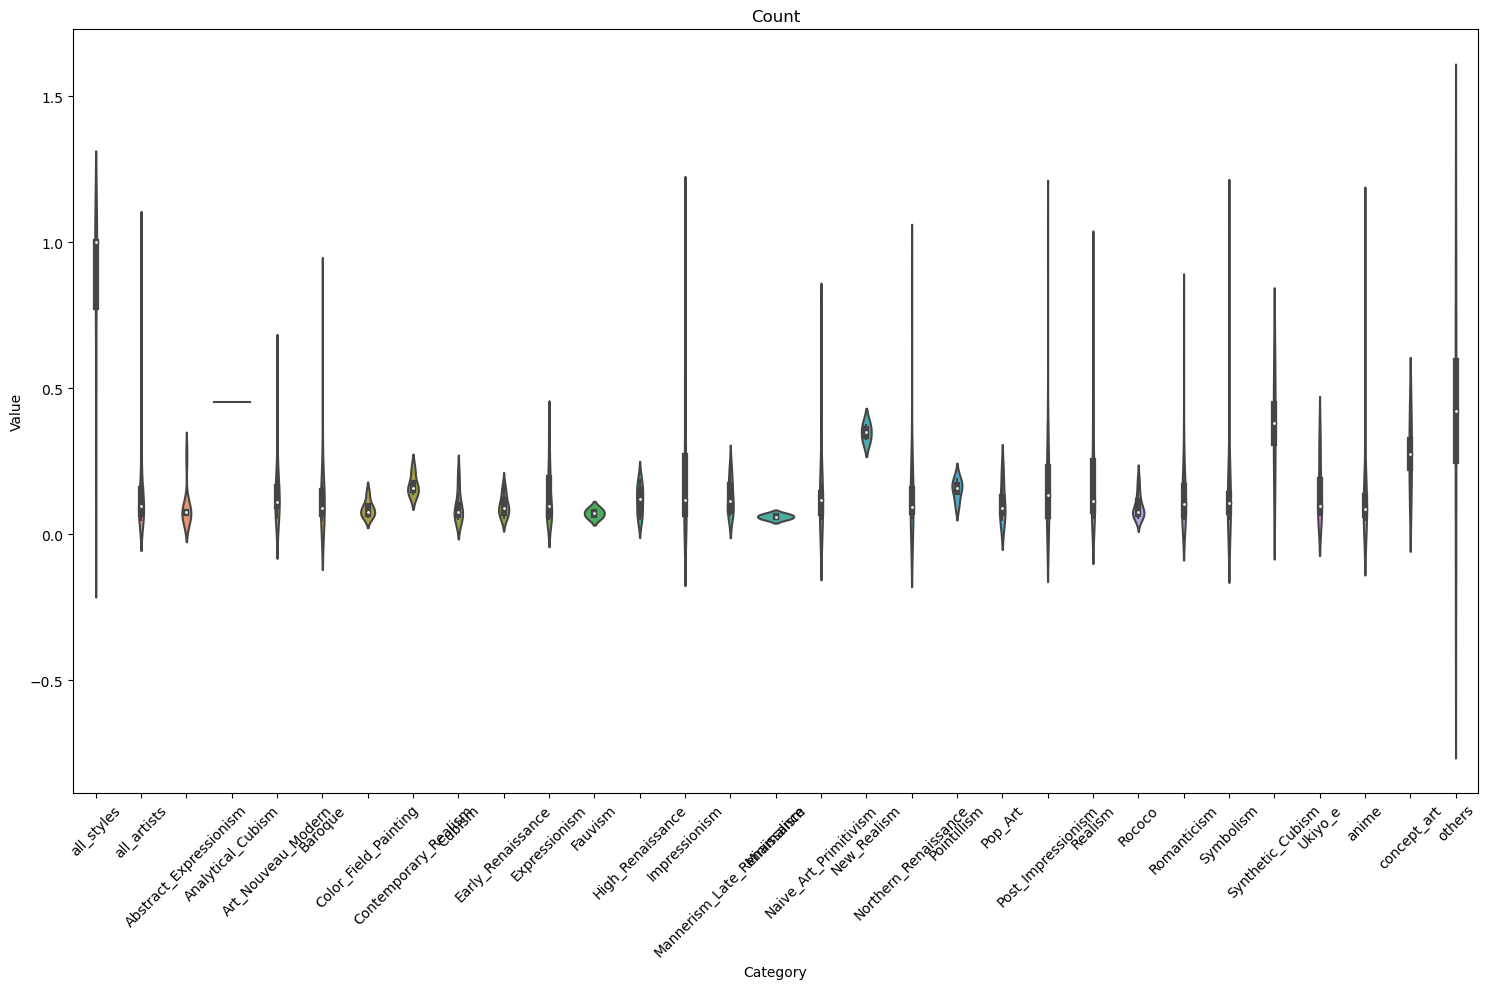

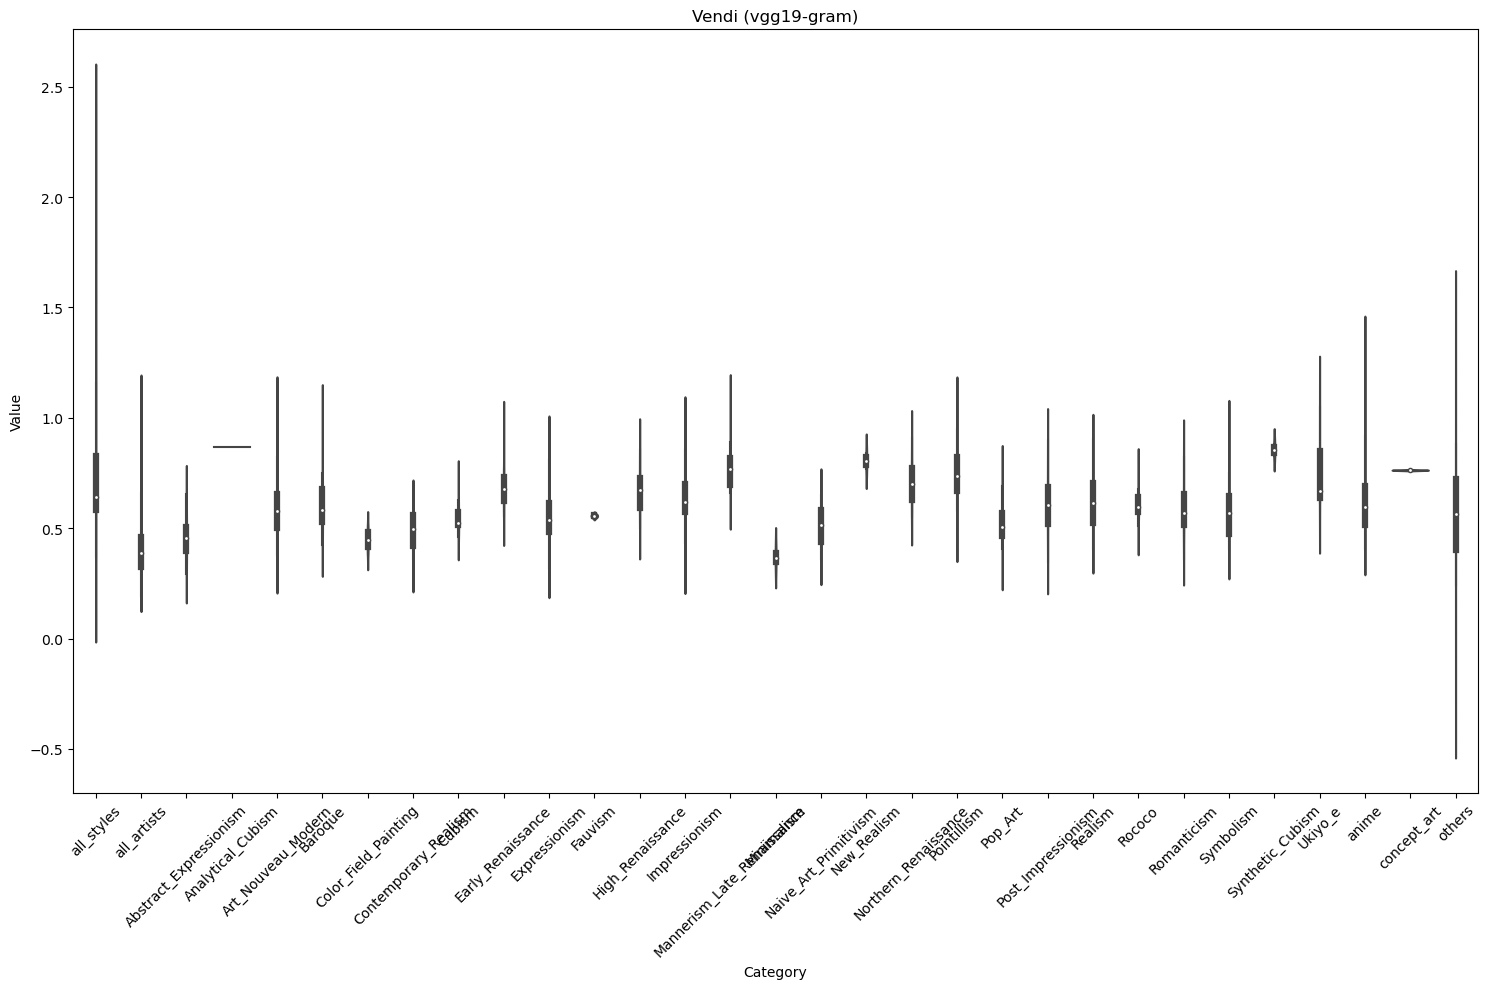

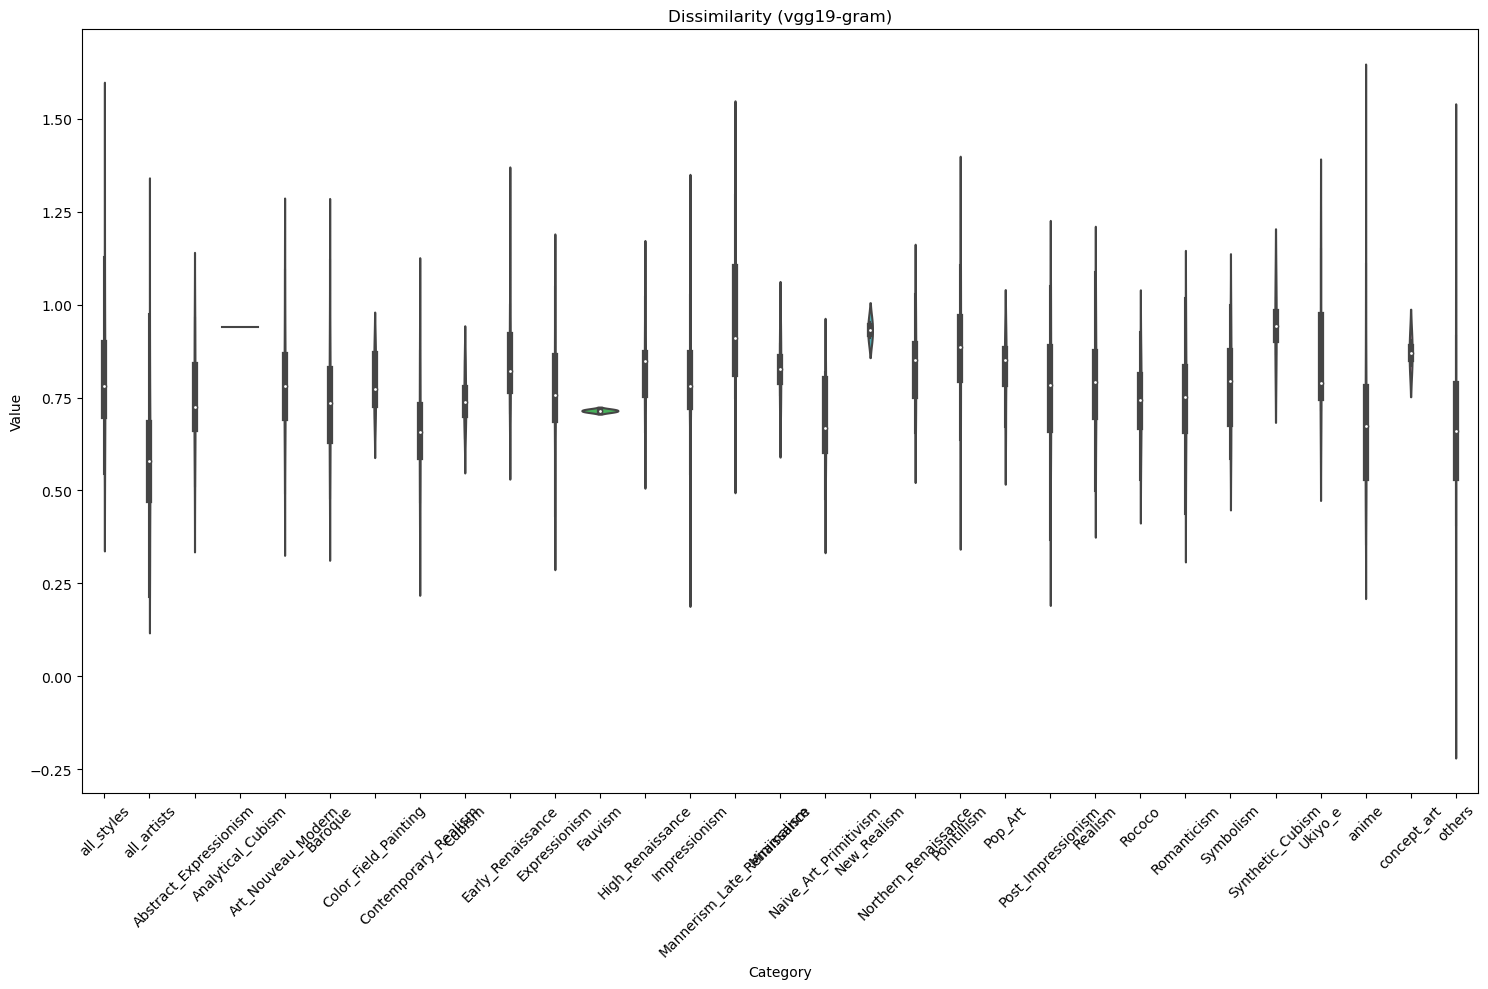

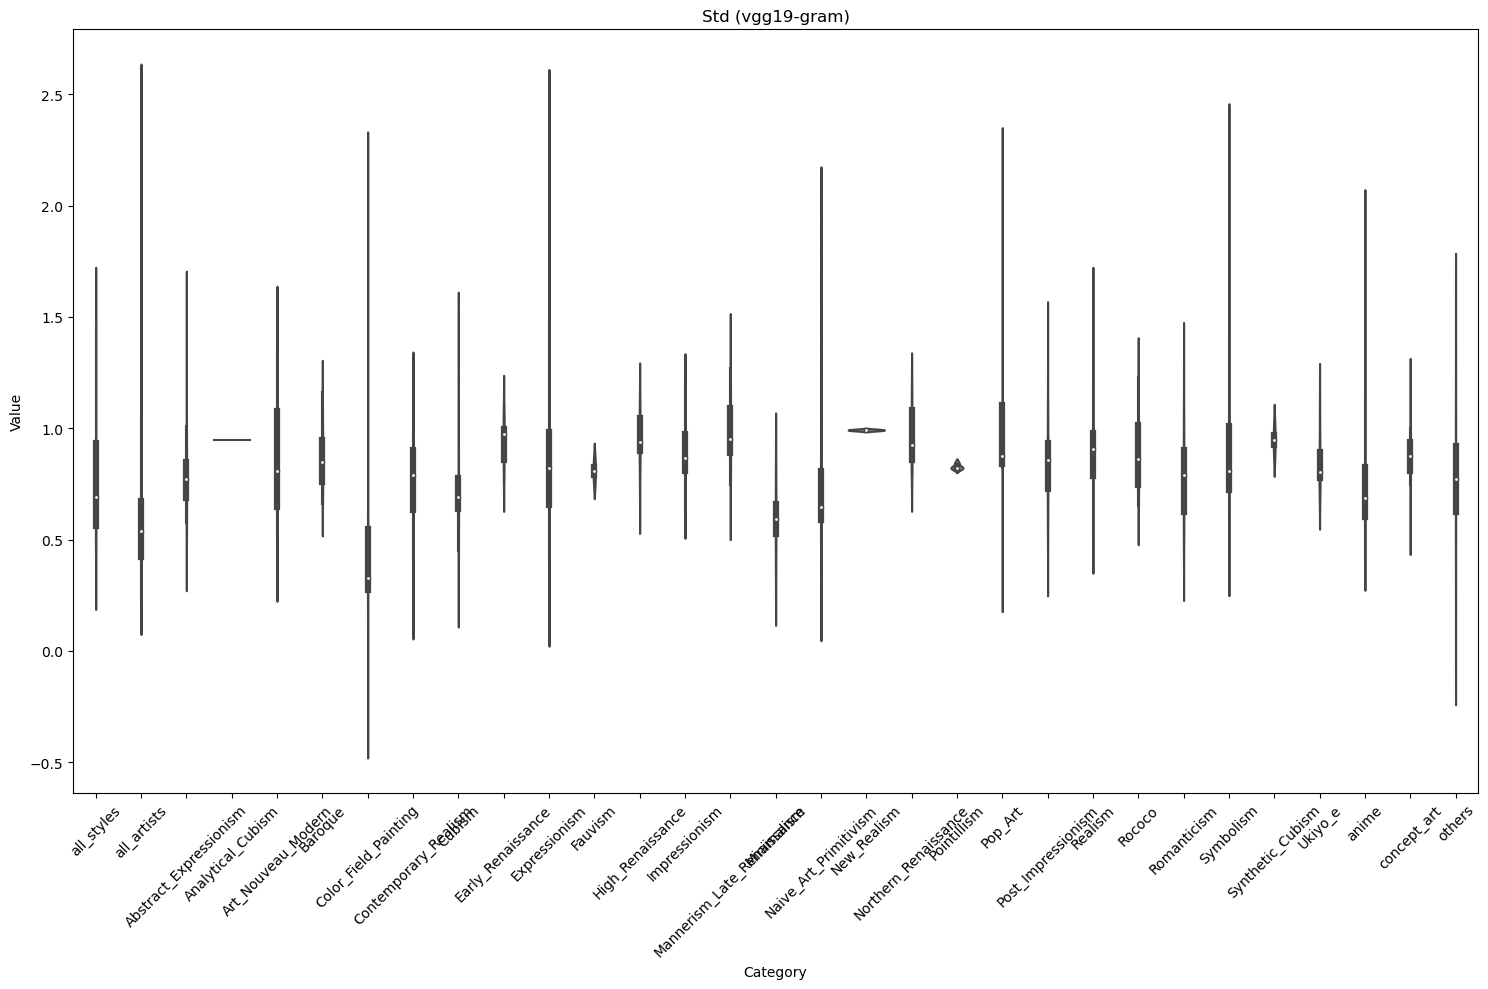

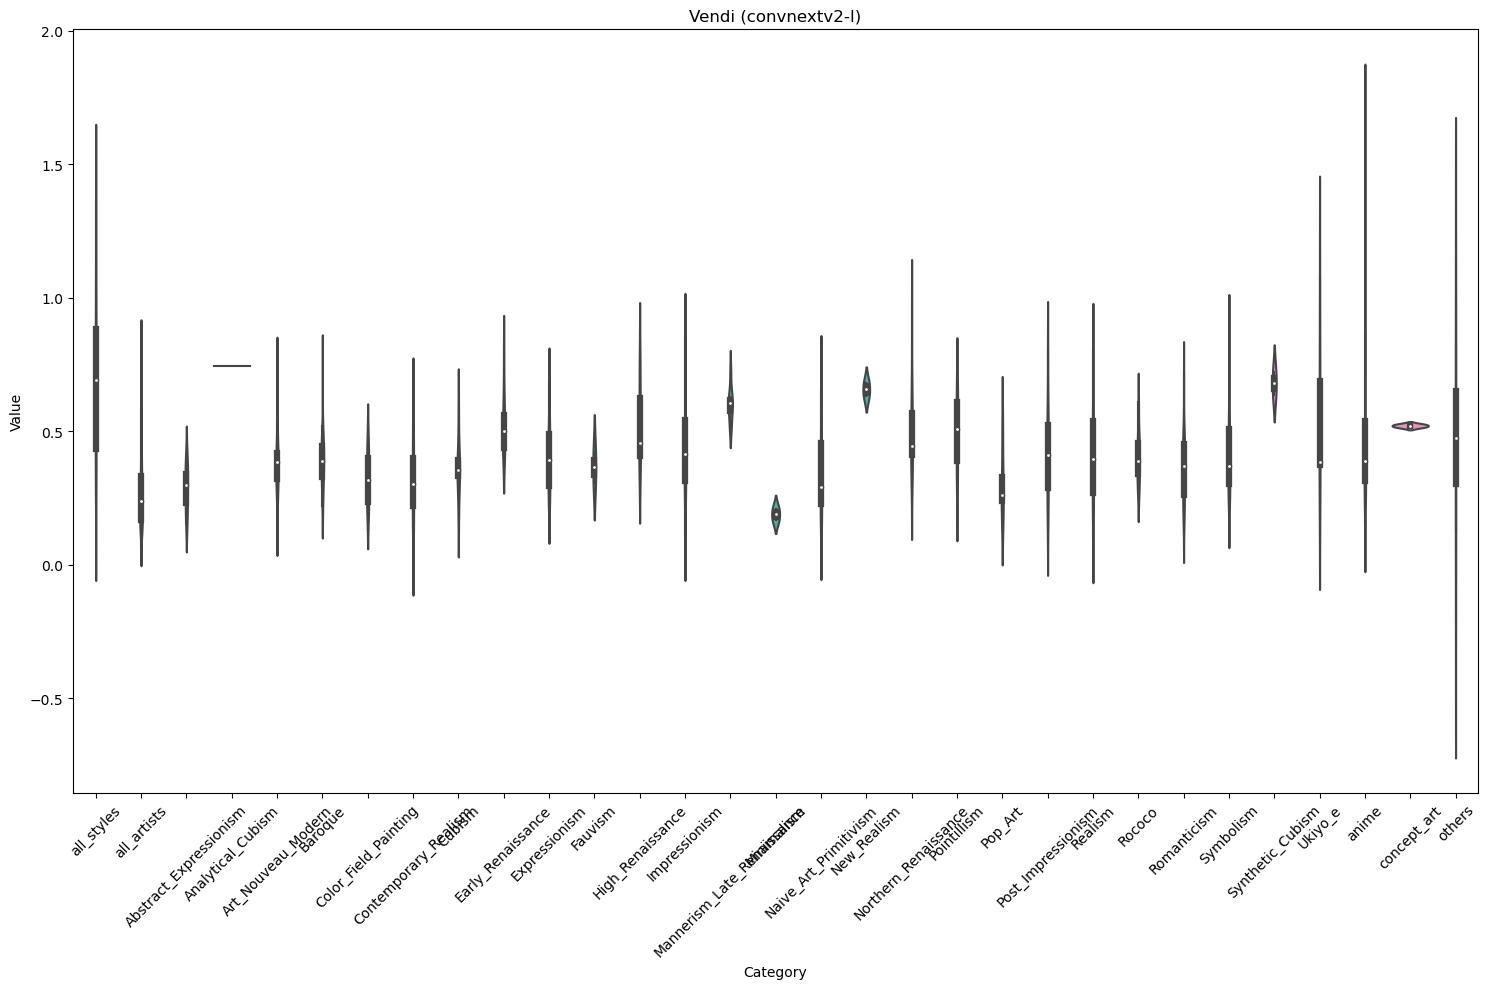

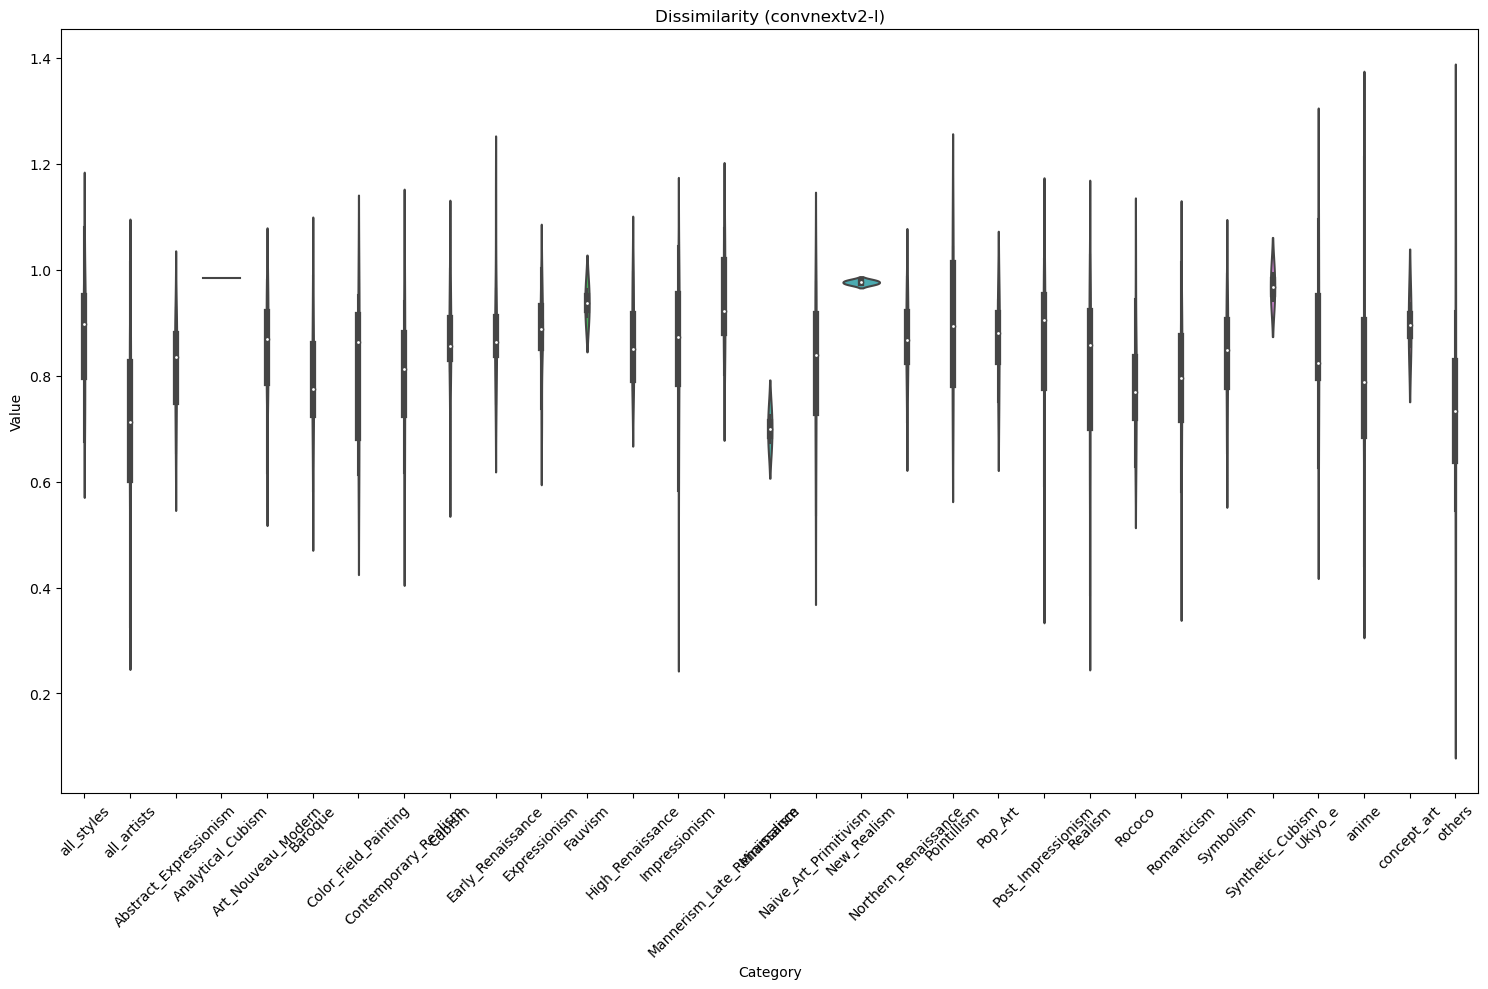

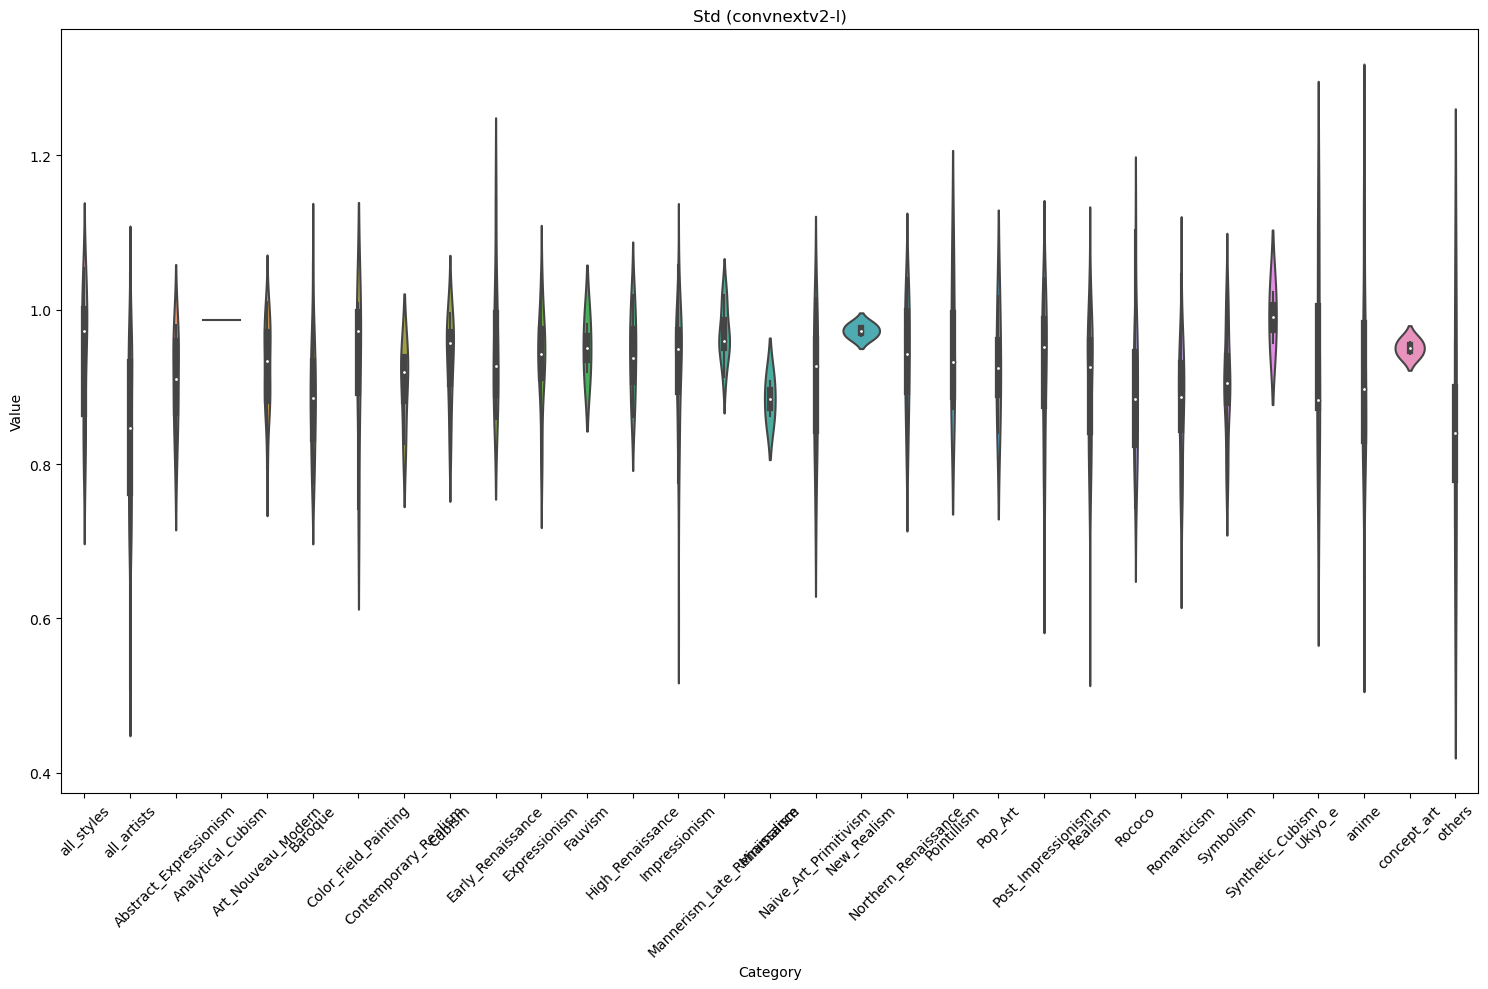

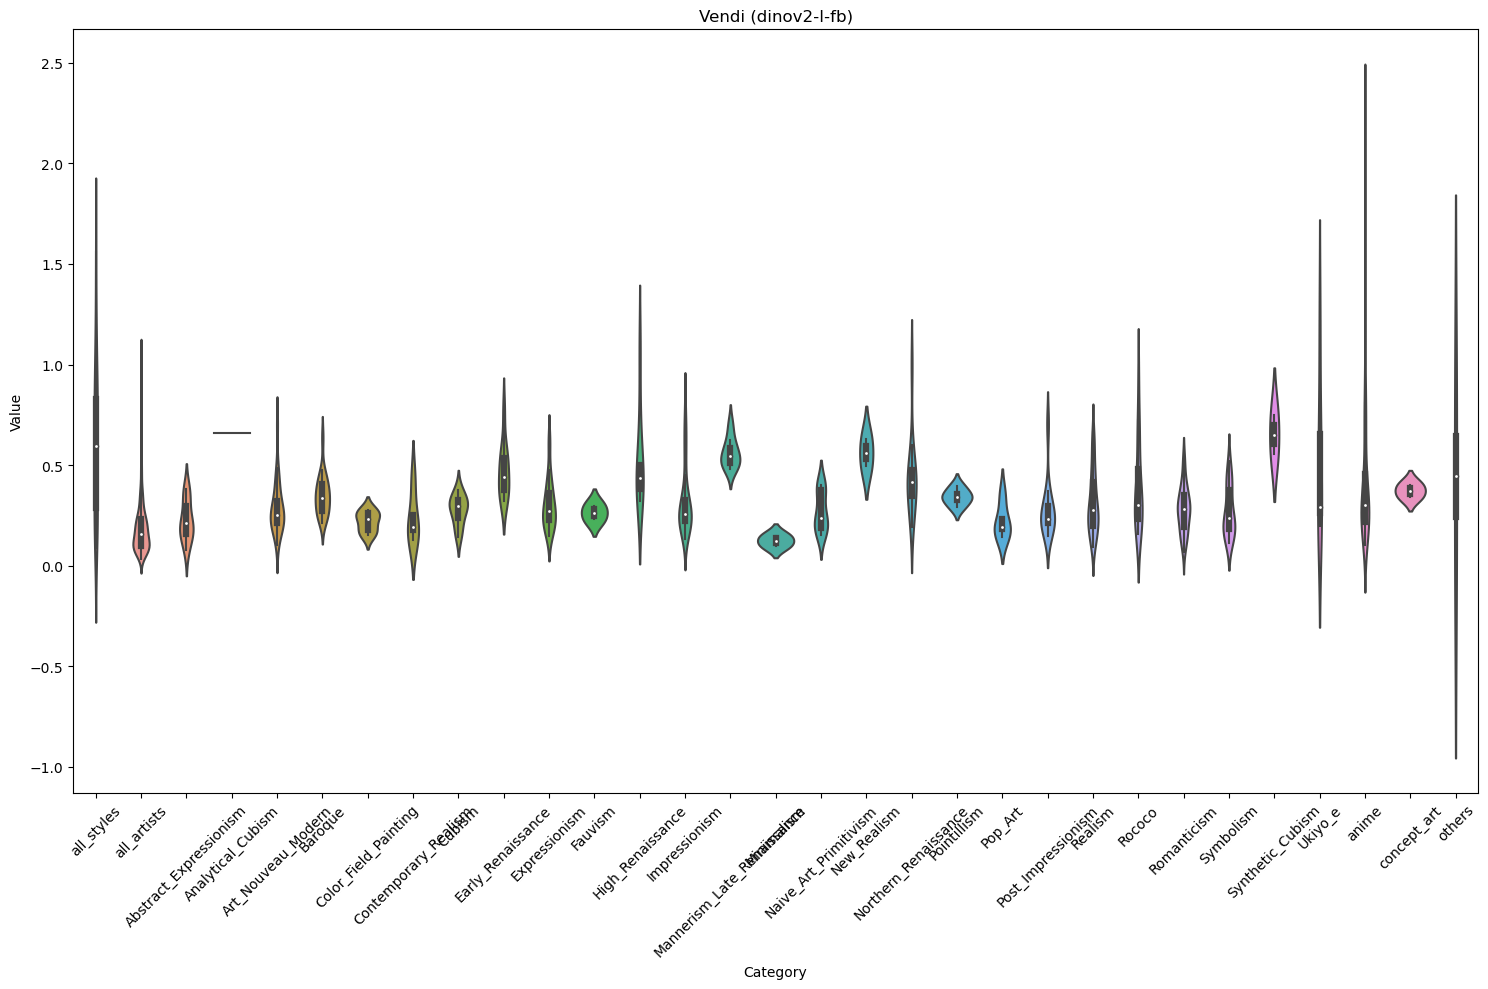

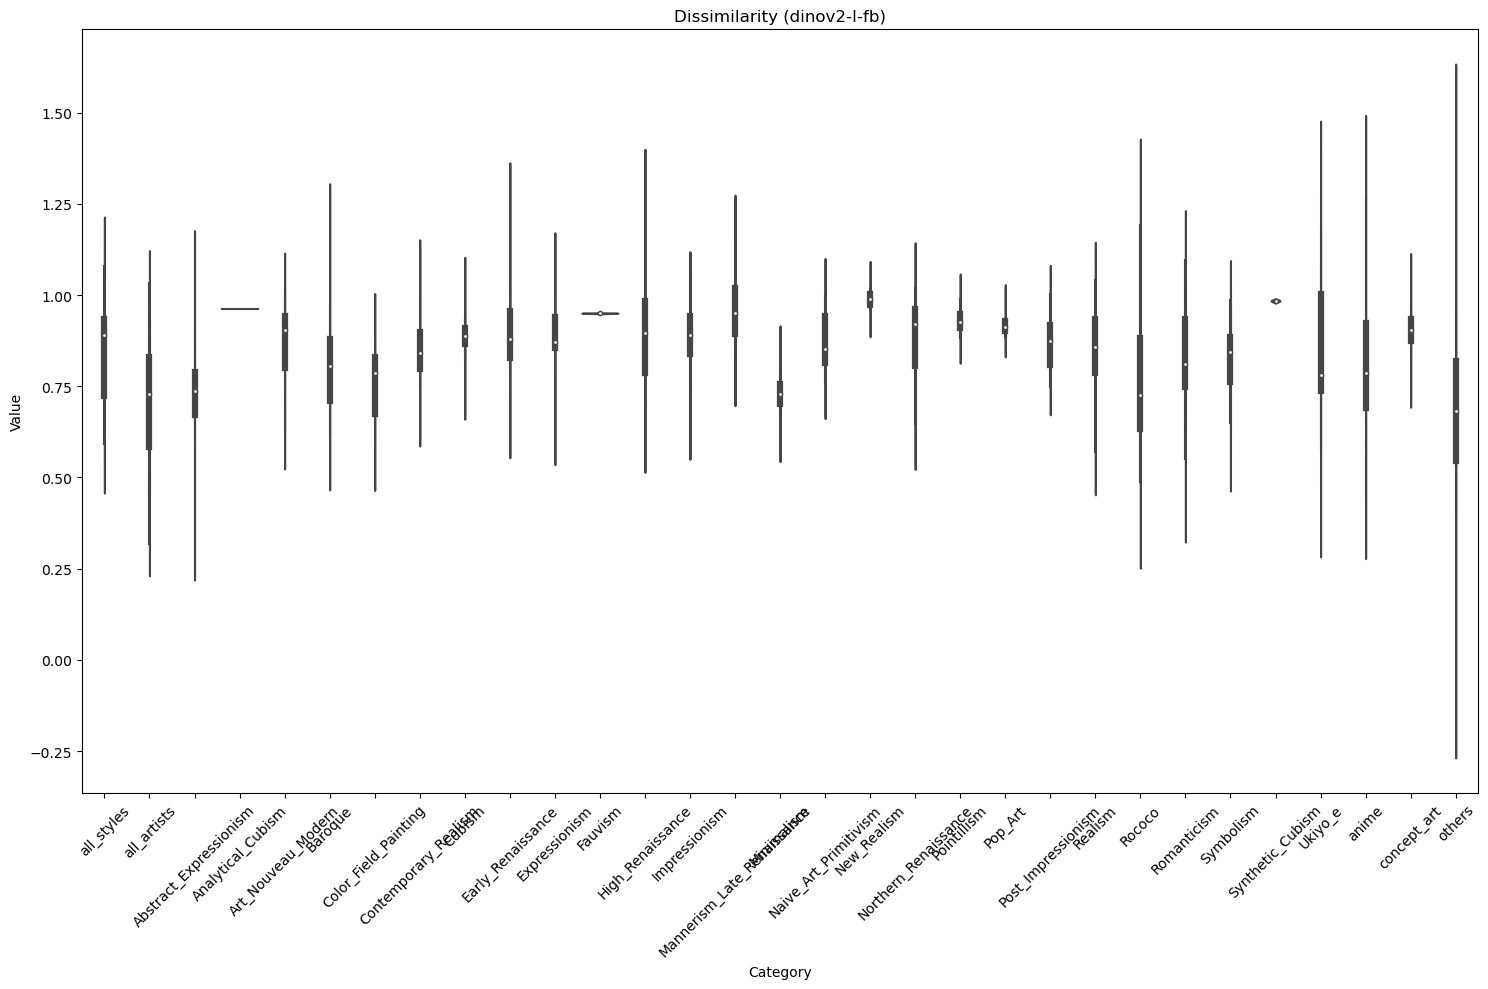

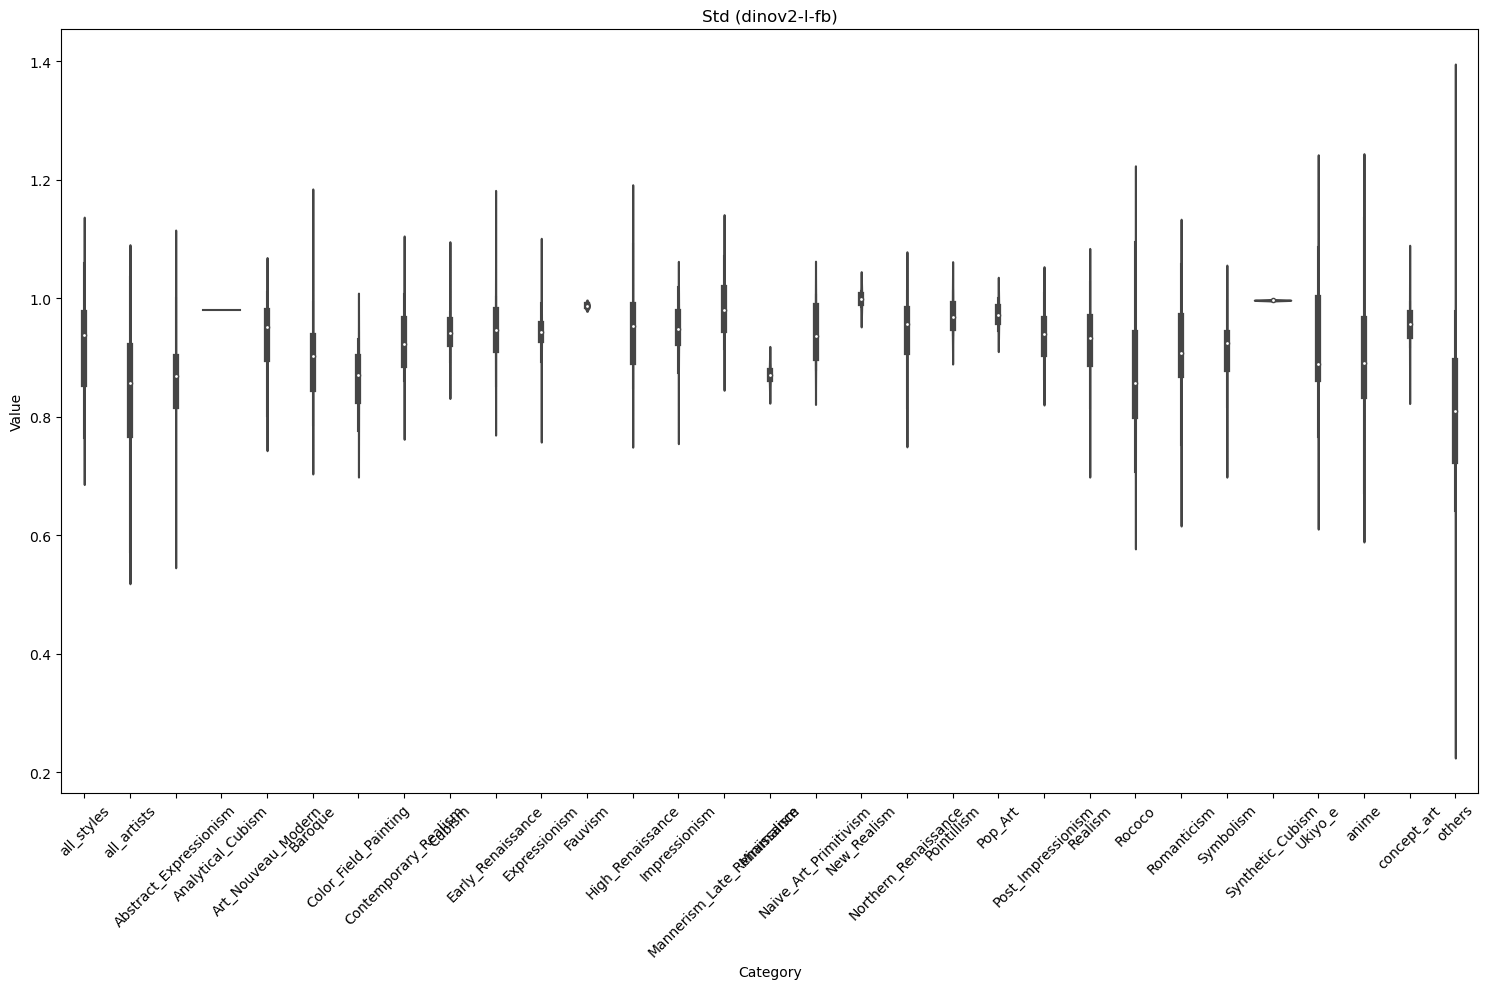

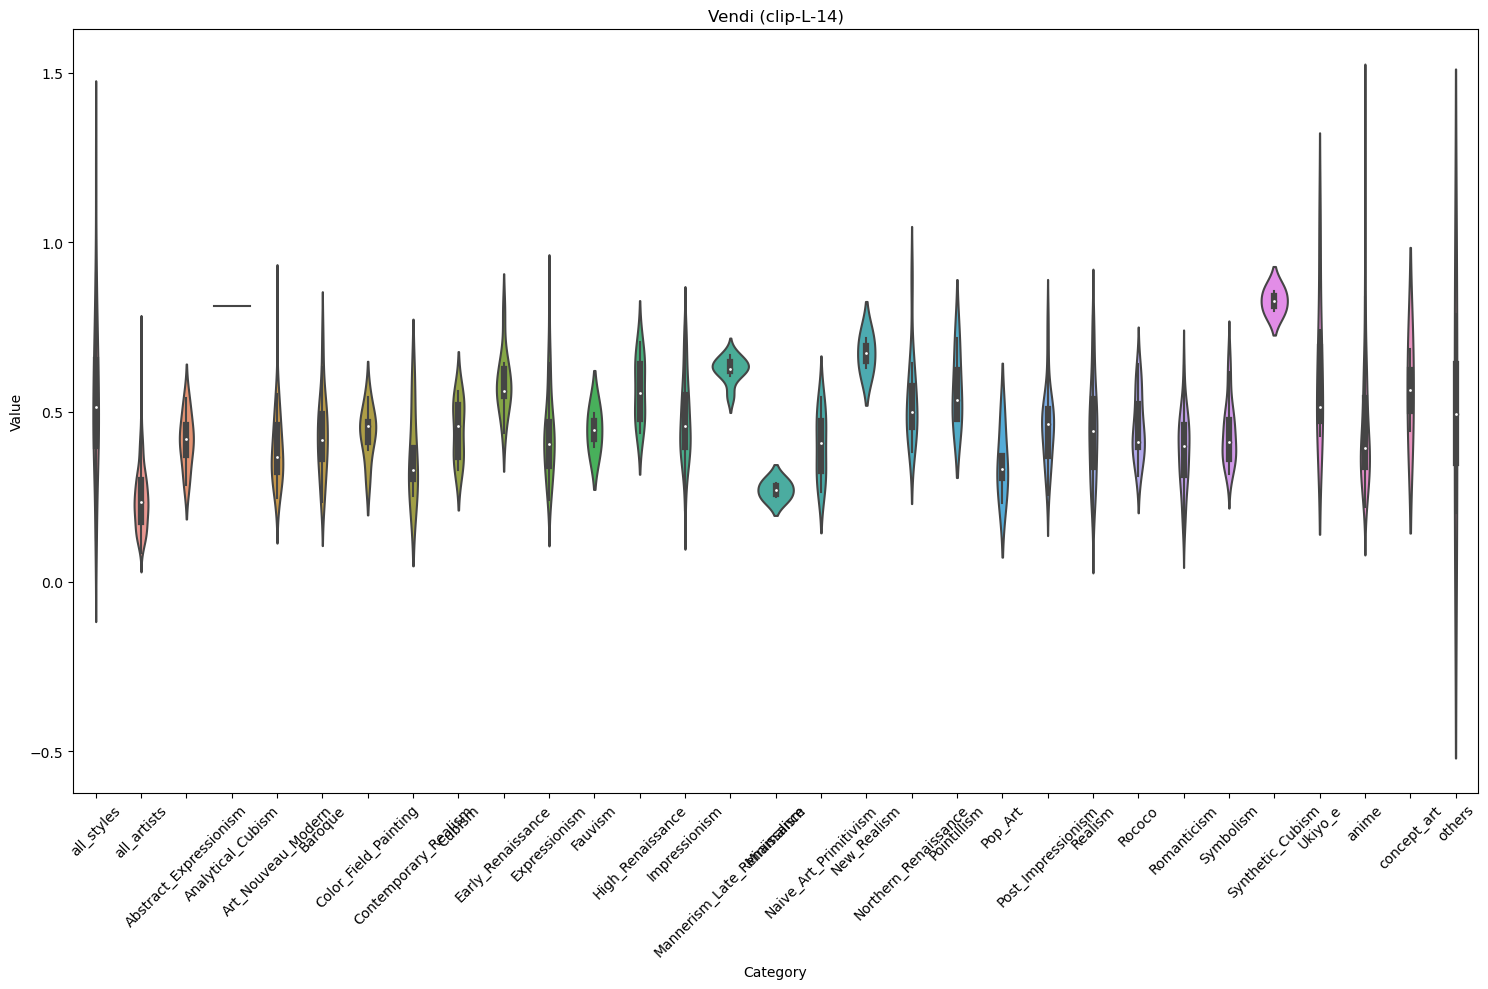

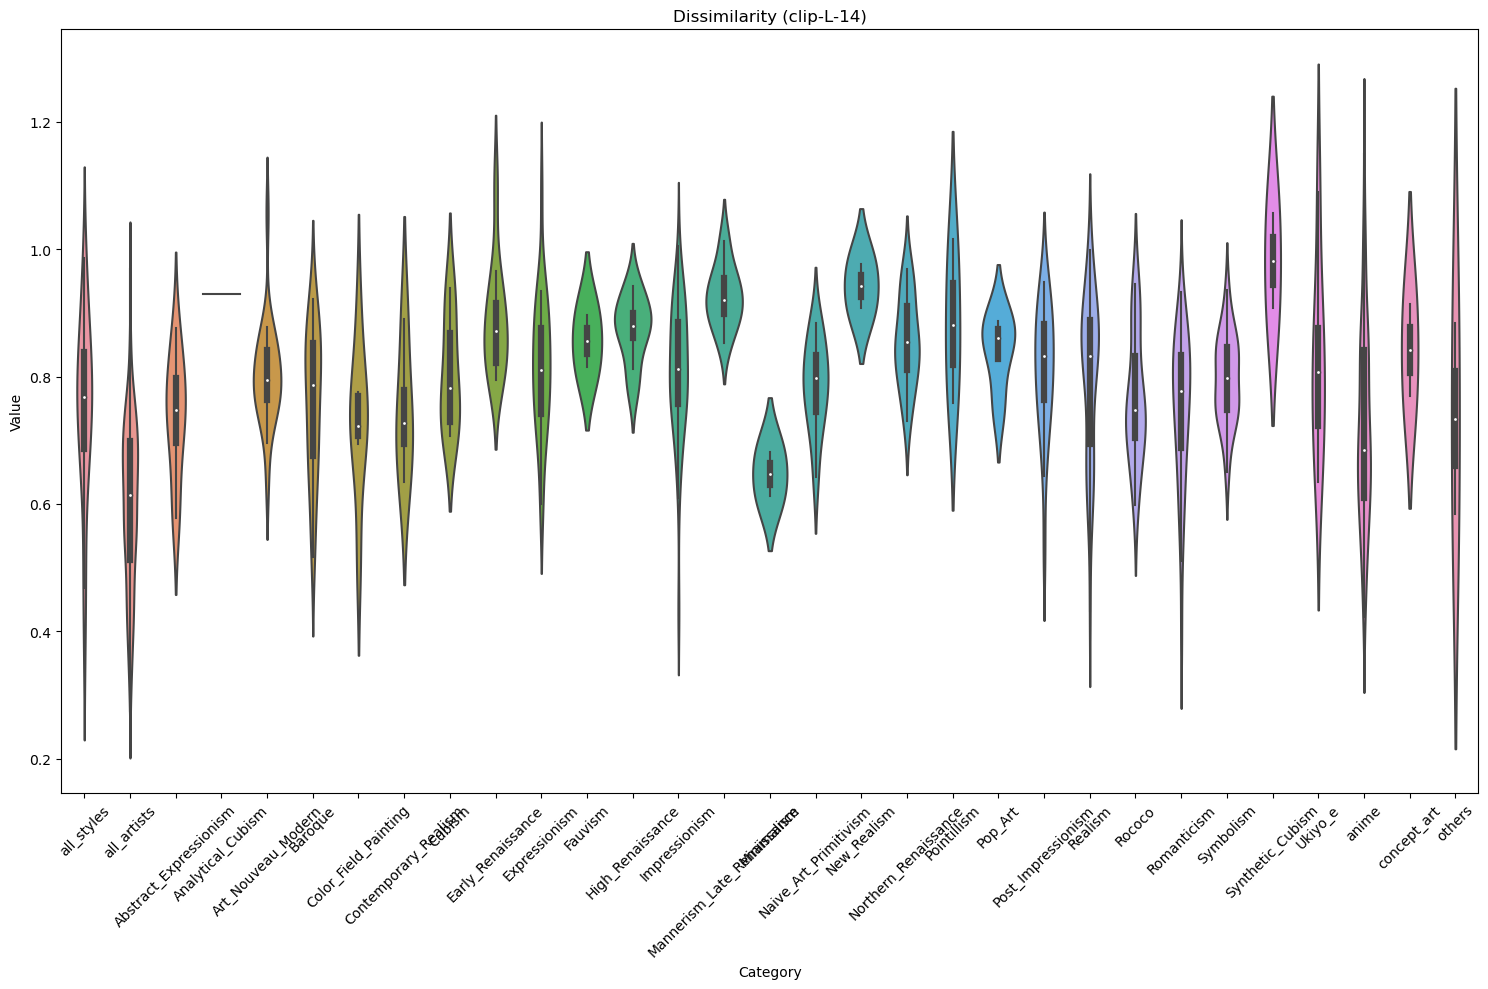

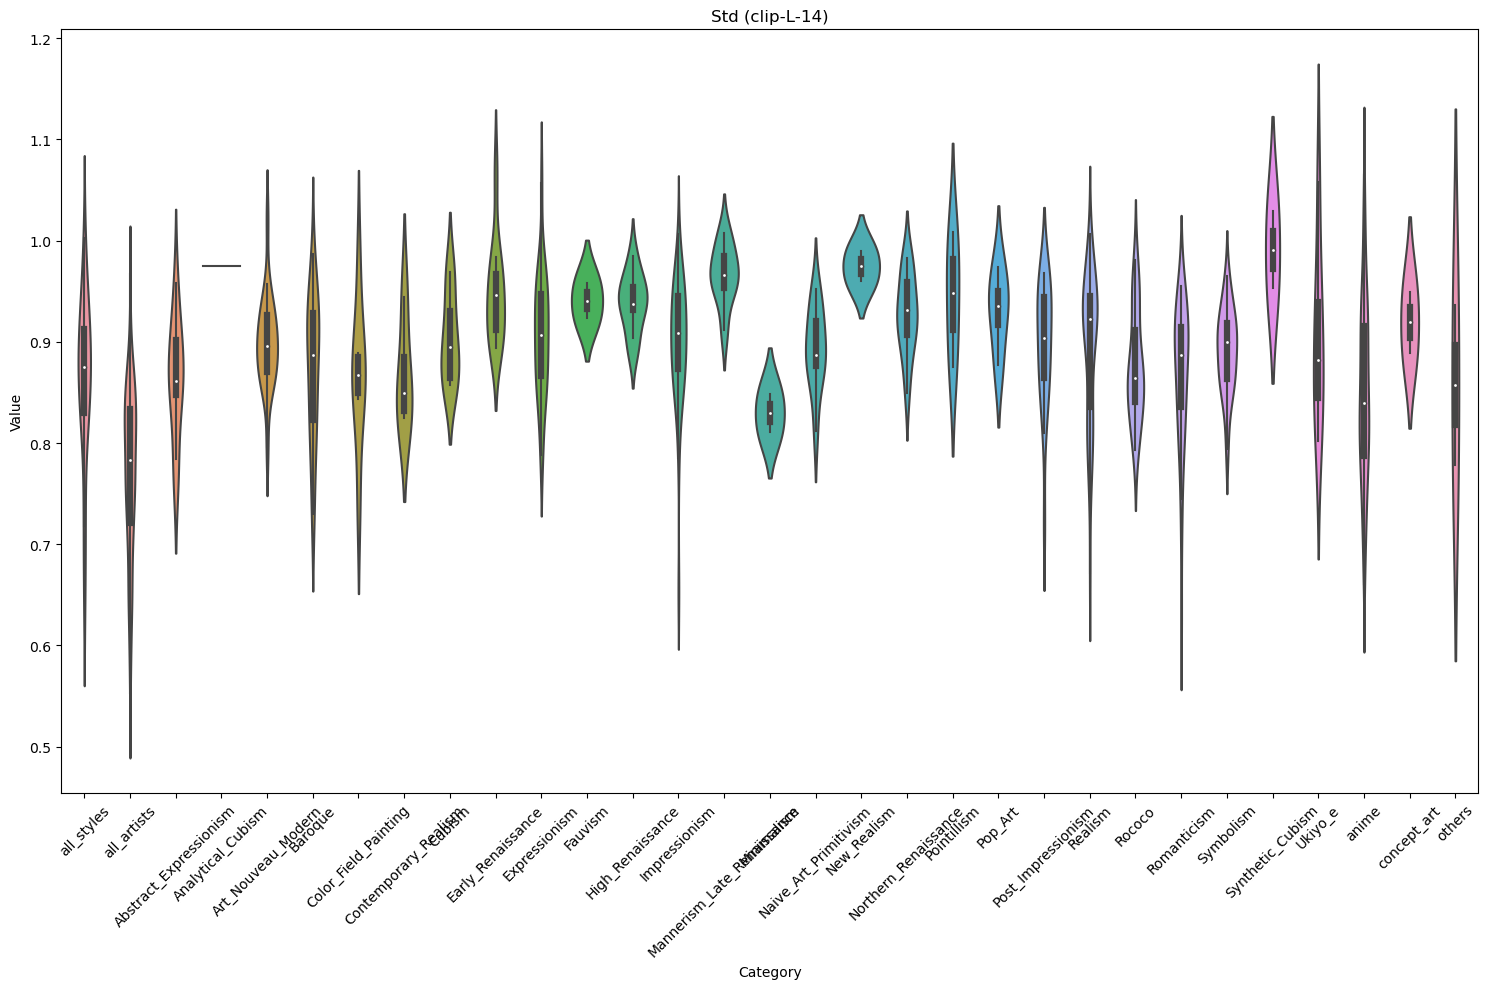

In [71]:

# Plot each metric separately
metrics = full_df['Metric'].unique()

for metric in metrics:
    plt.figure(figsize=(15, 10))
    sns.violinplot(x='Category',
                   y='Value',
                   data=full_df[full_df['Metric'] == metric])
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'figures/{metric}.png')

In [77]:
len(diversity_metrics.columns)-1

Index(['Folder', 'Count', 'Vendi (vgg19-gram)', 'Dissimilarity (vgg19-gram)',
       'Std (vgg19-gram)', 'Vendi (convnextv2-l)',
       'Dissimilarity (convnextv2-l)', 'Std (convnextv2-l)',
       'Vendi (dinov2-l-fb)', 'Dissimilarity (dinov2-l-fb)',
       'Std (dinov2-l-fb)', 'Vendi (clip-L-14)', 'Dissimilarity (clip-L-14)',
       'Std (clip-L-14)'],
      dtype='object')

/tmp/ipykernel_57599/4082441044.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 10))


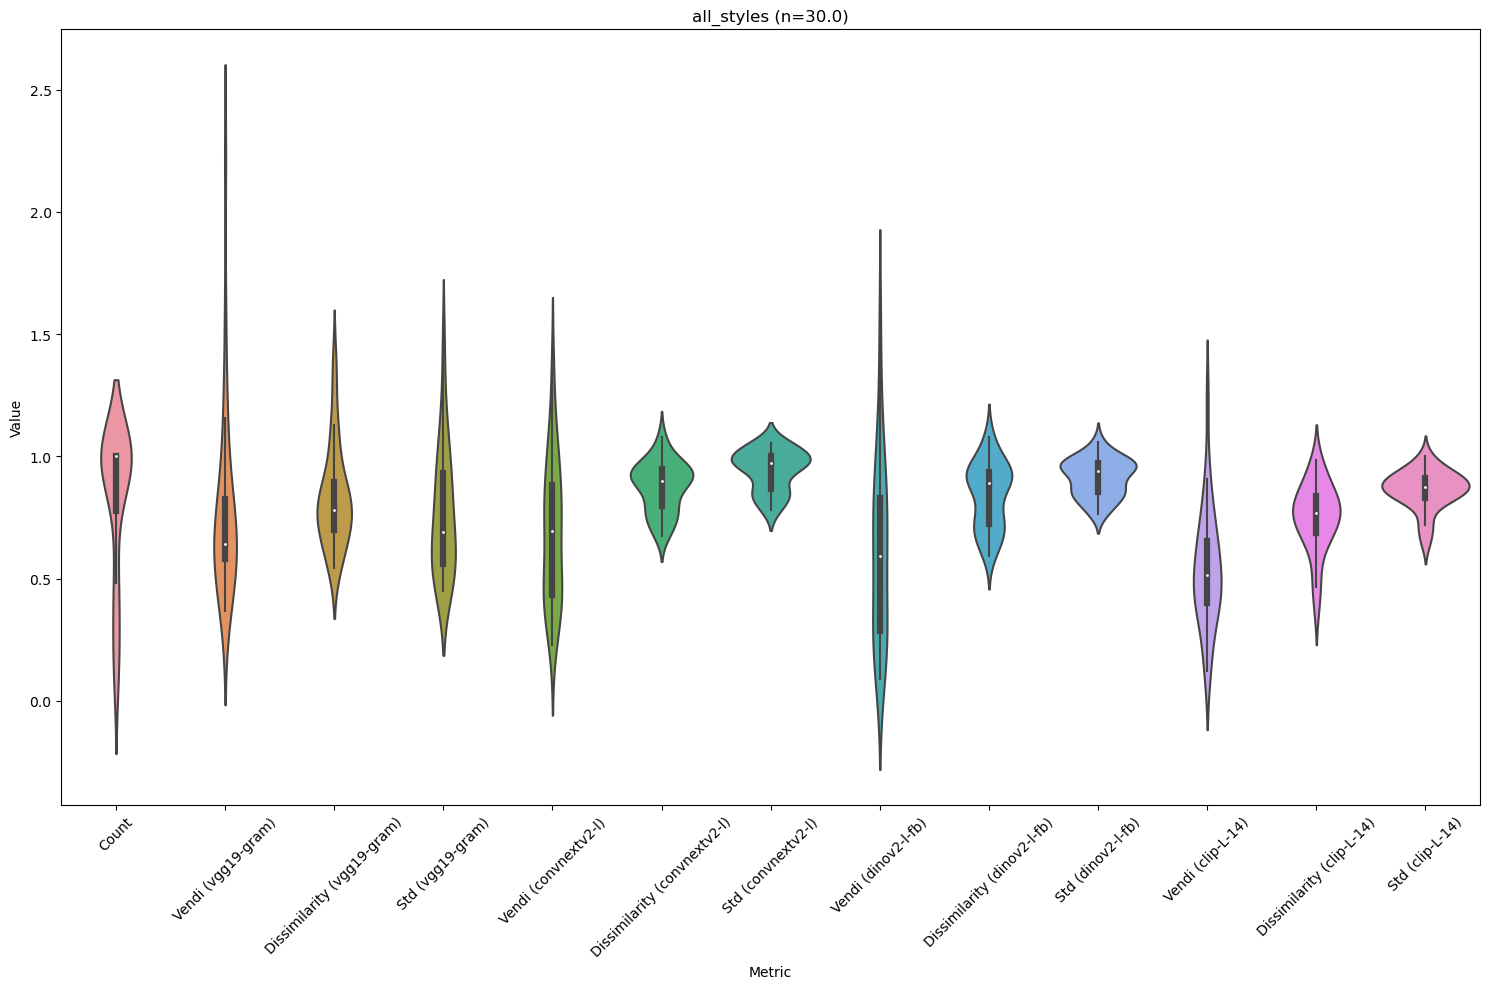

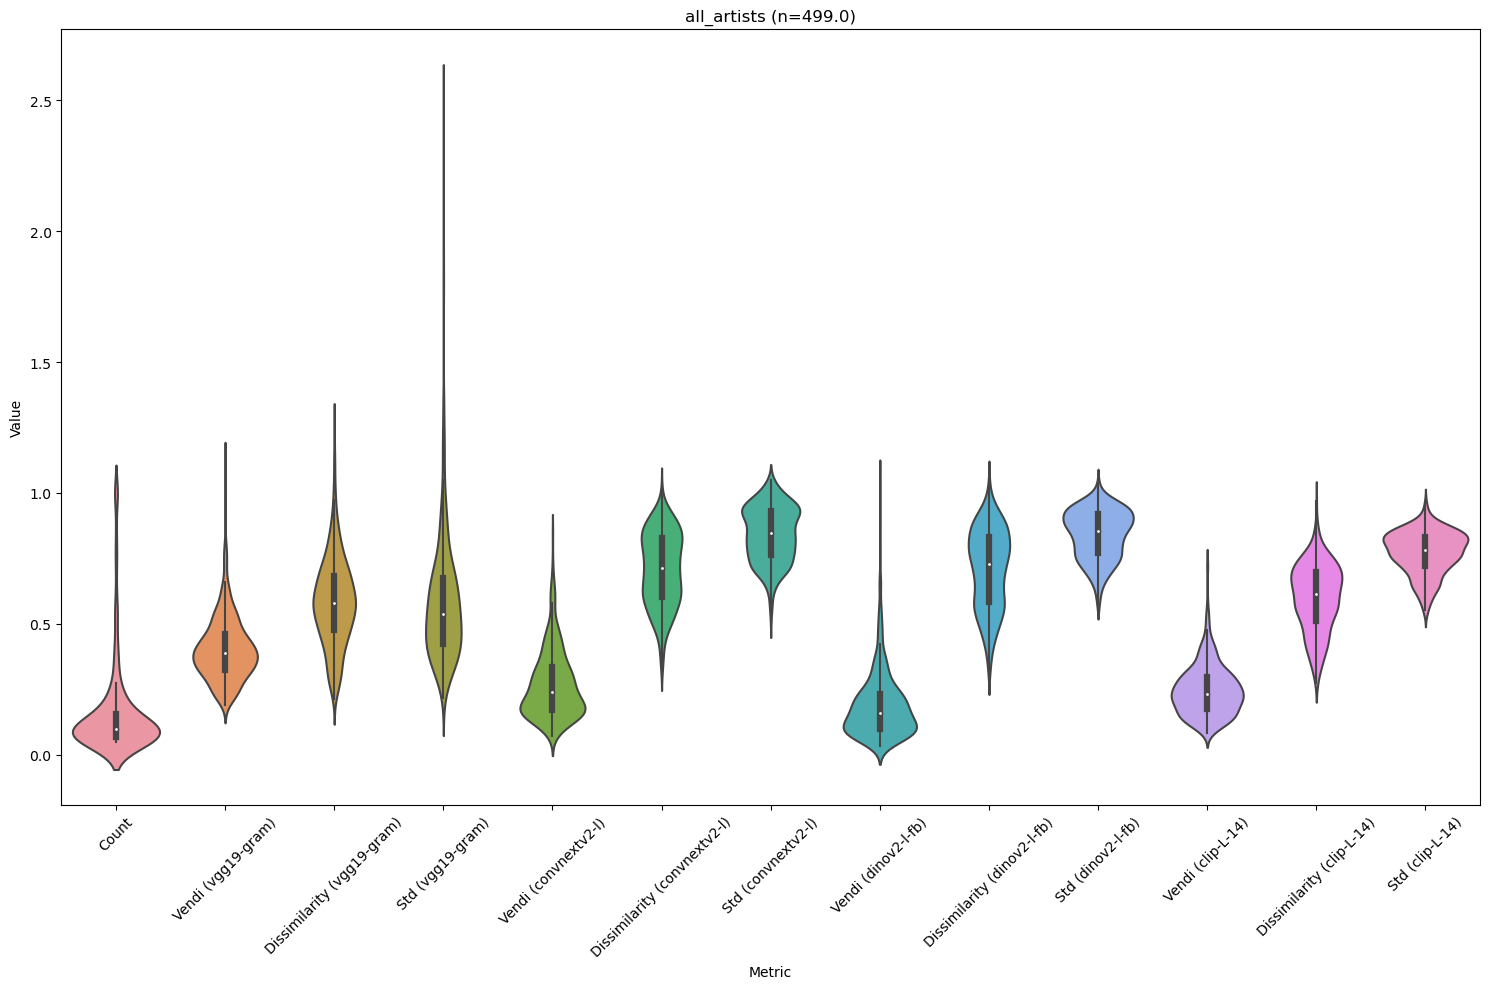

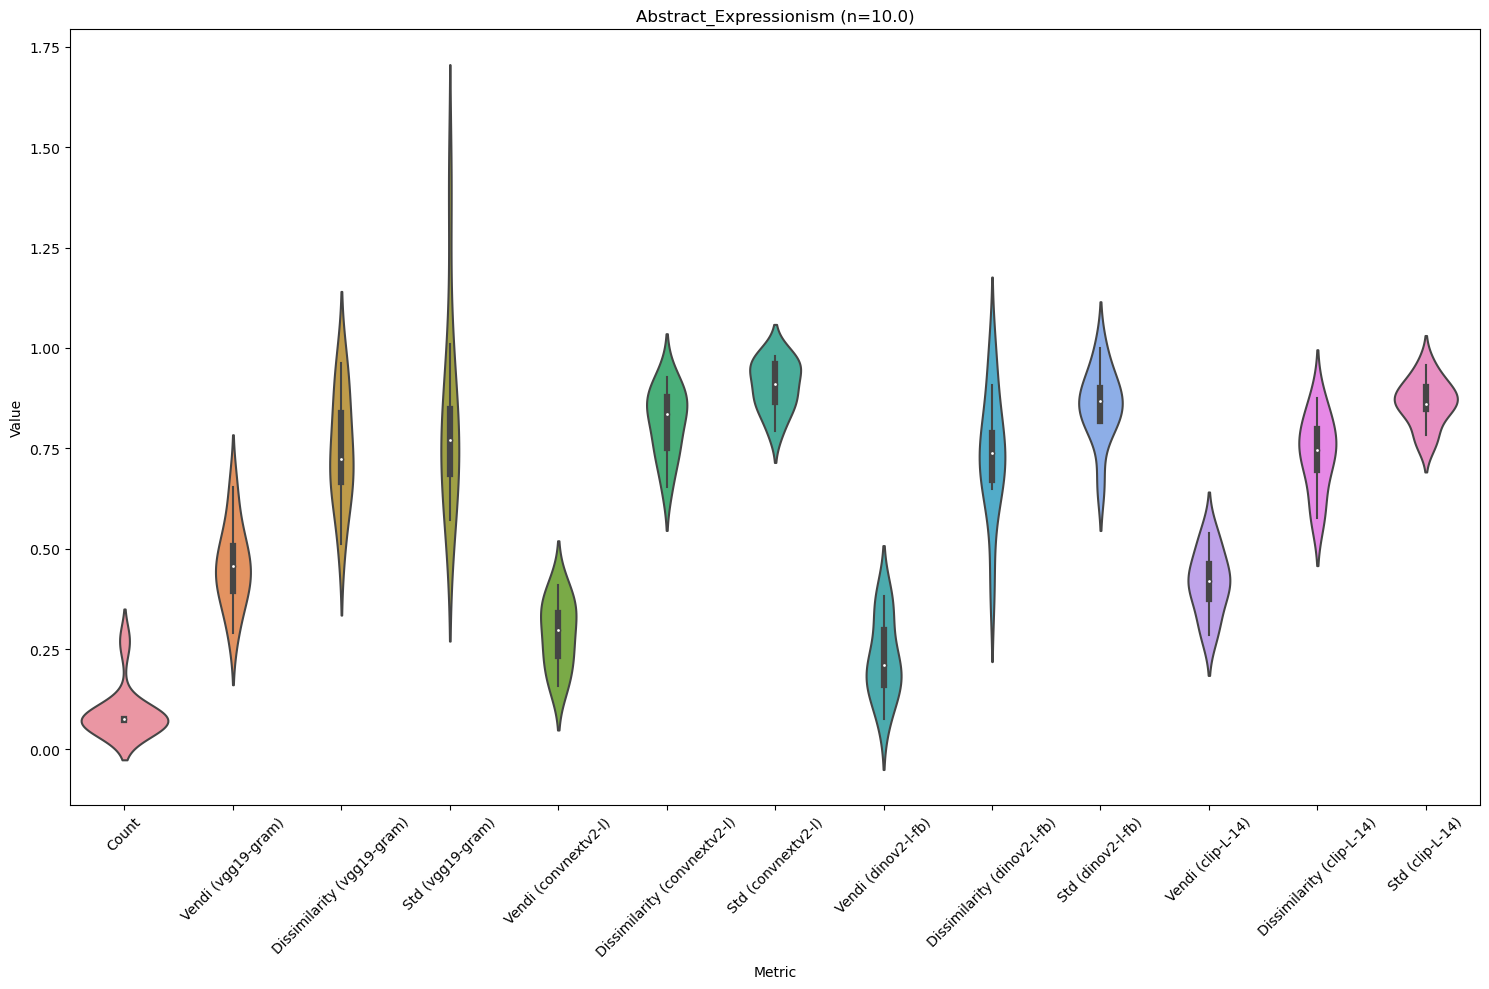

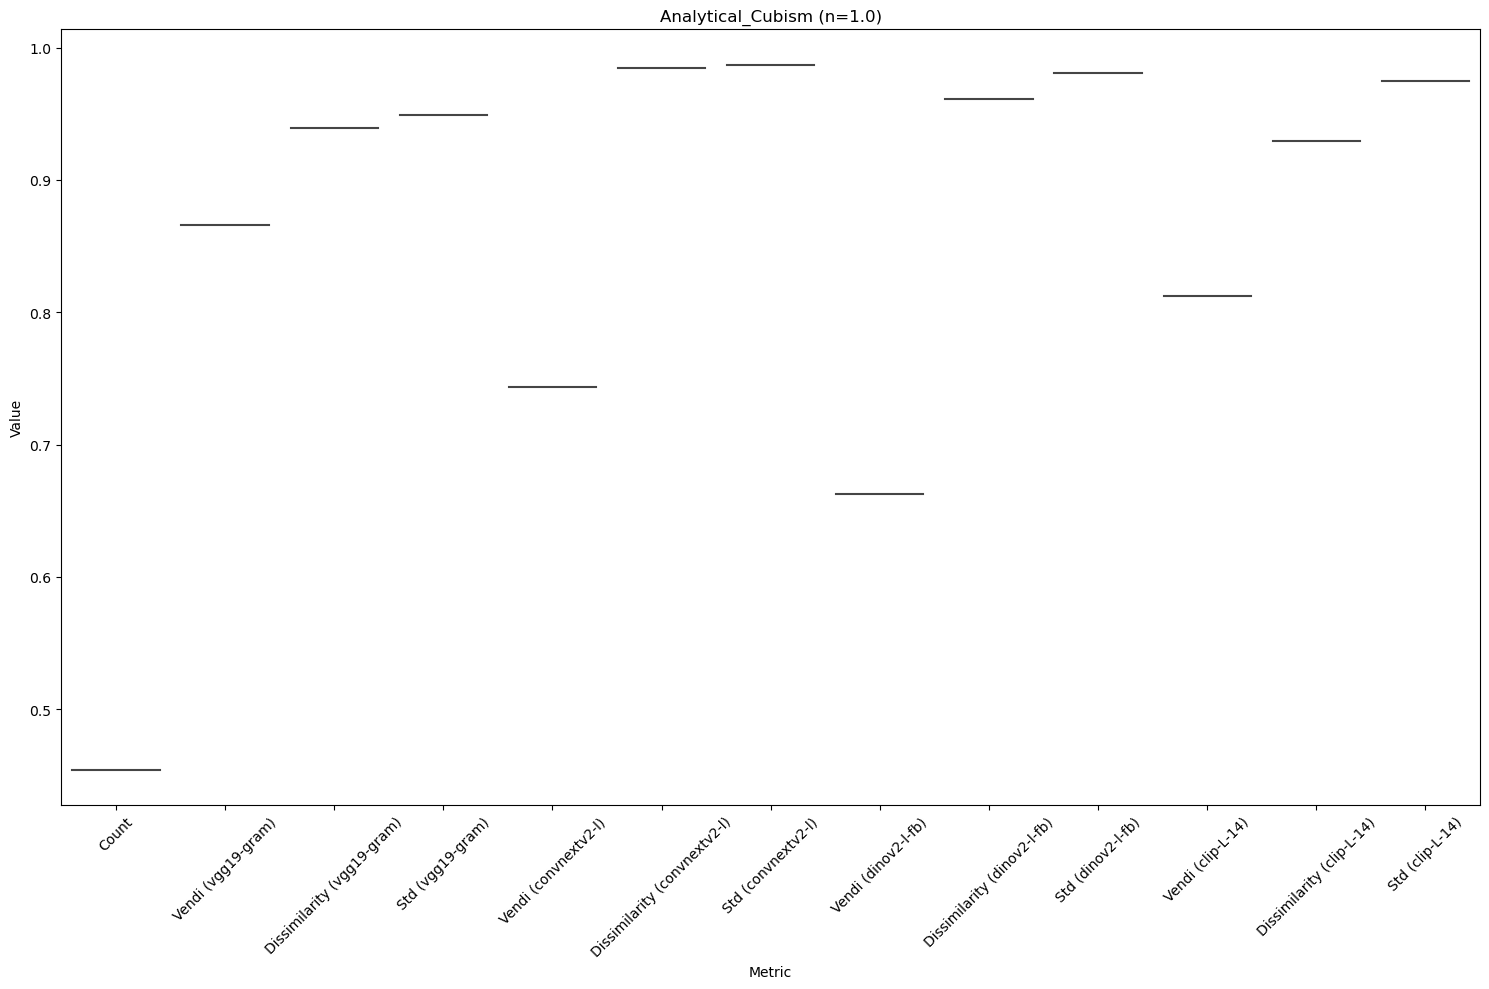

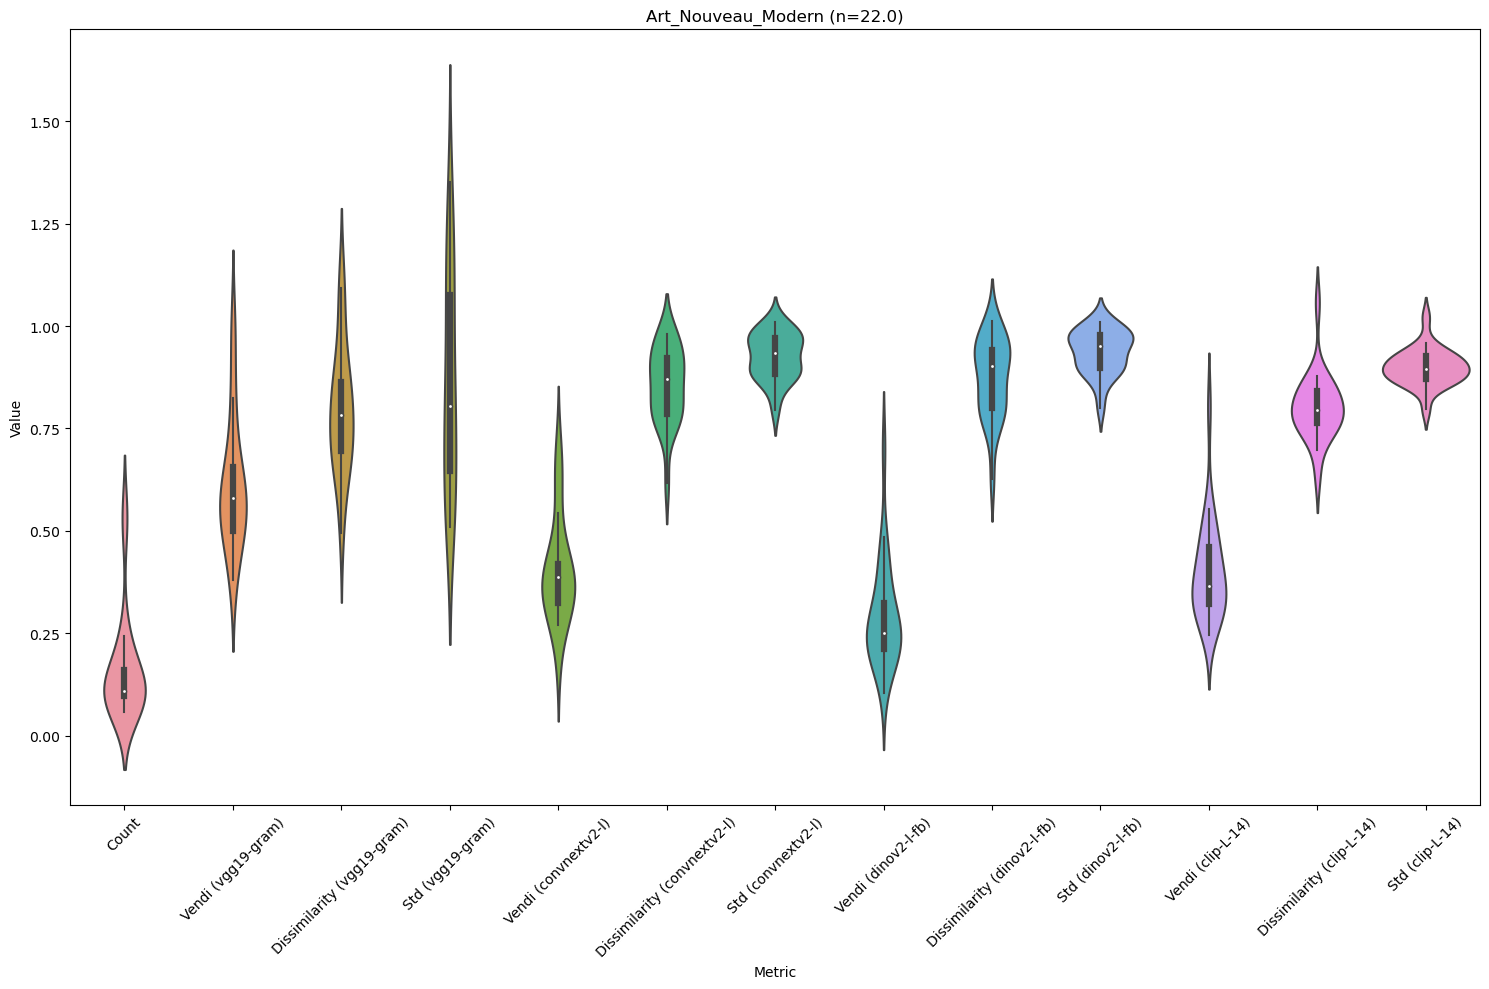

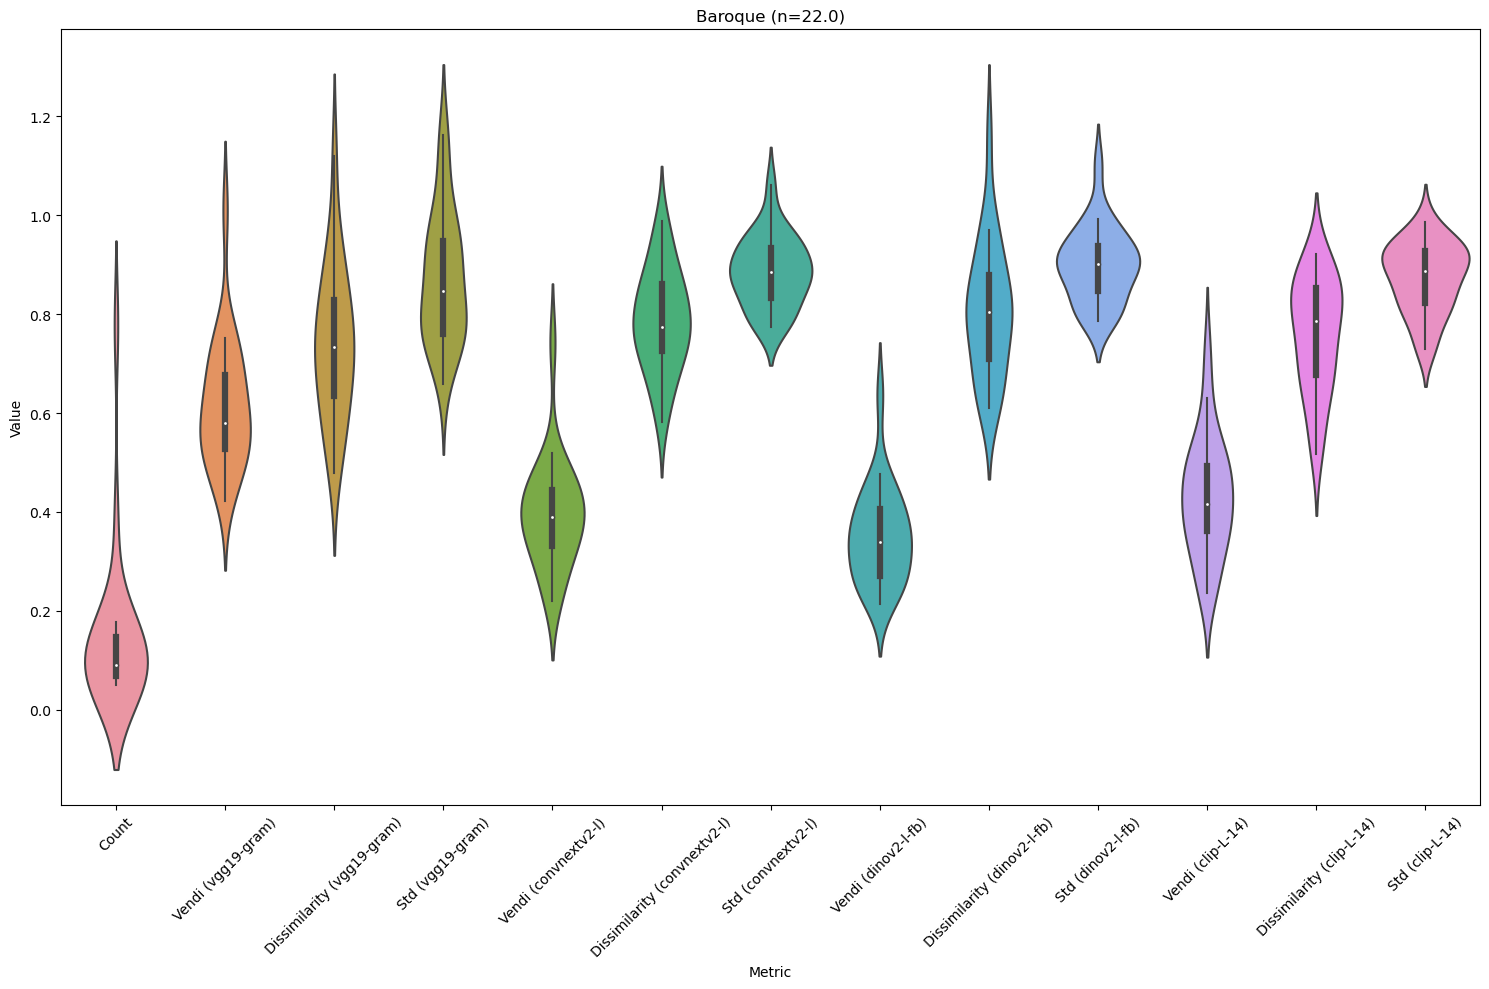

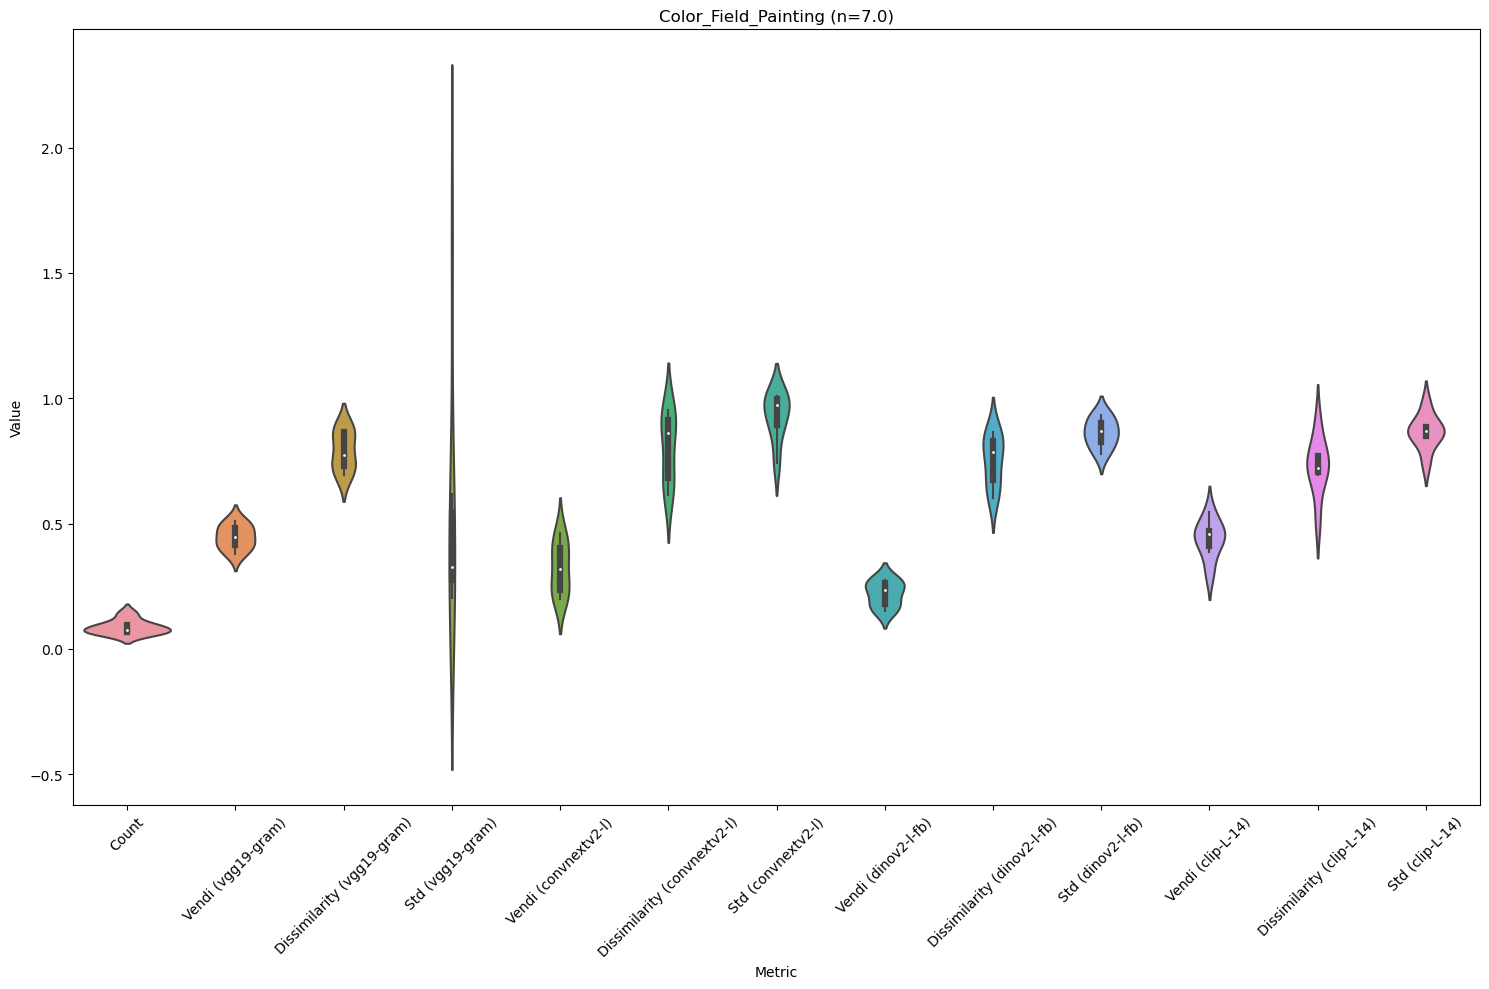

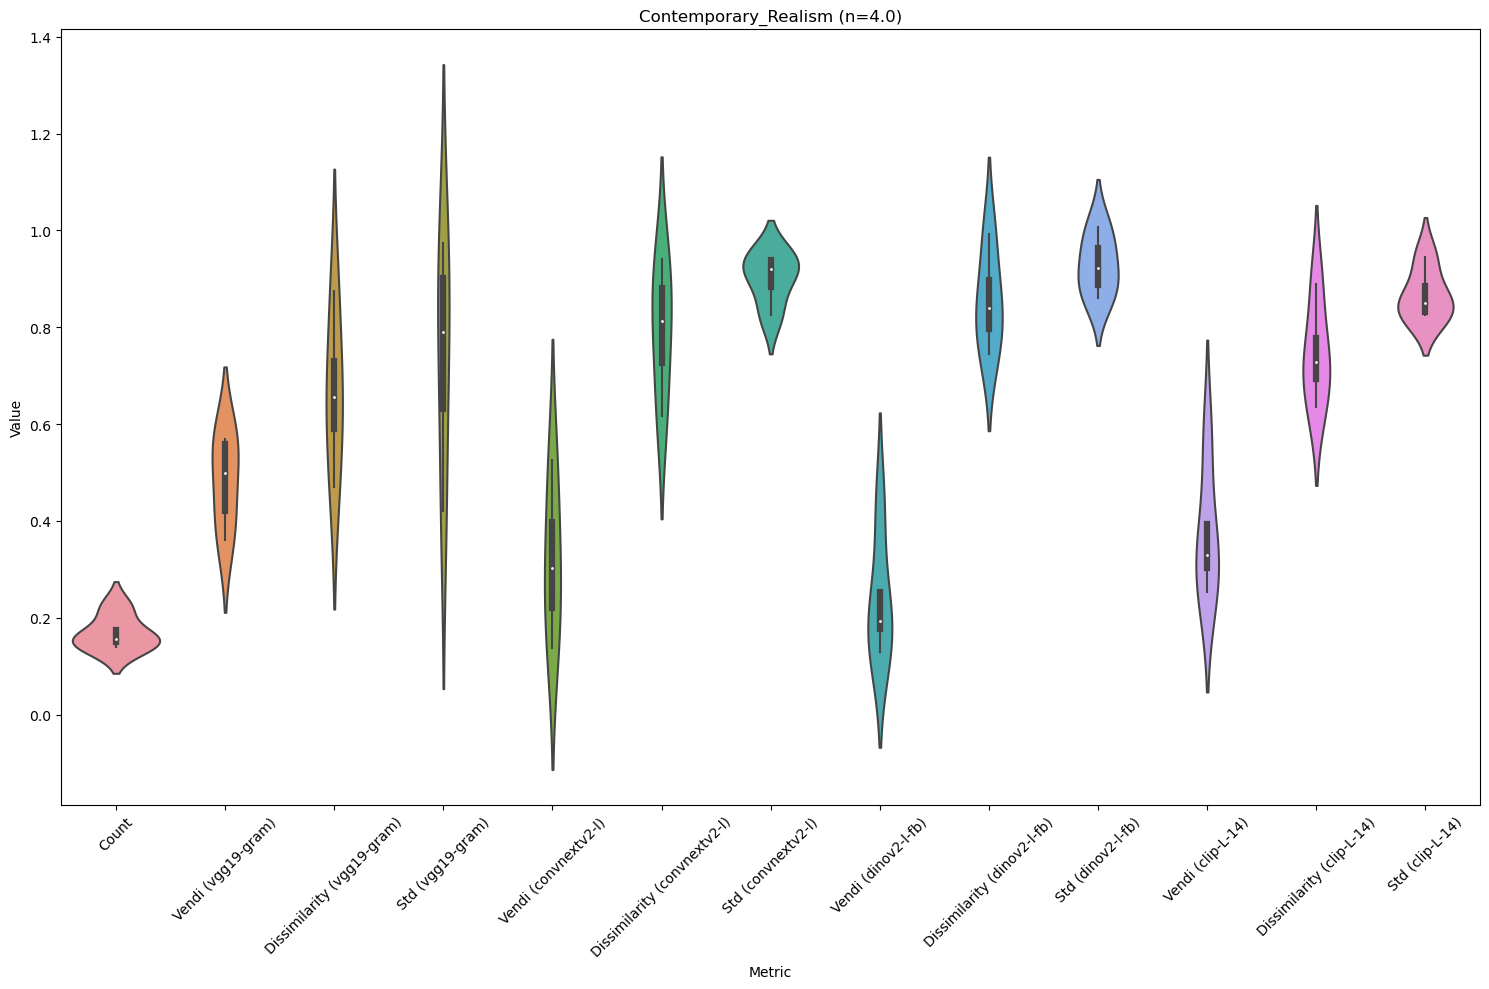

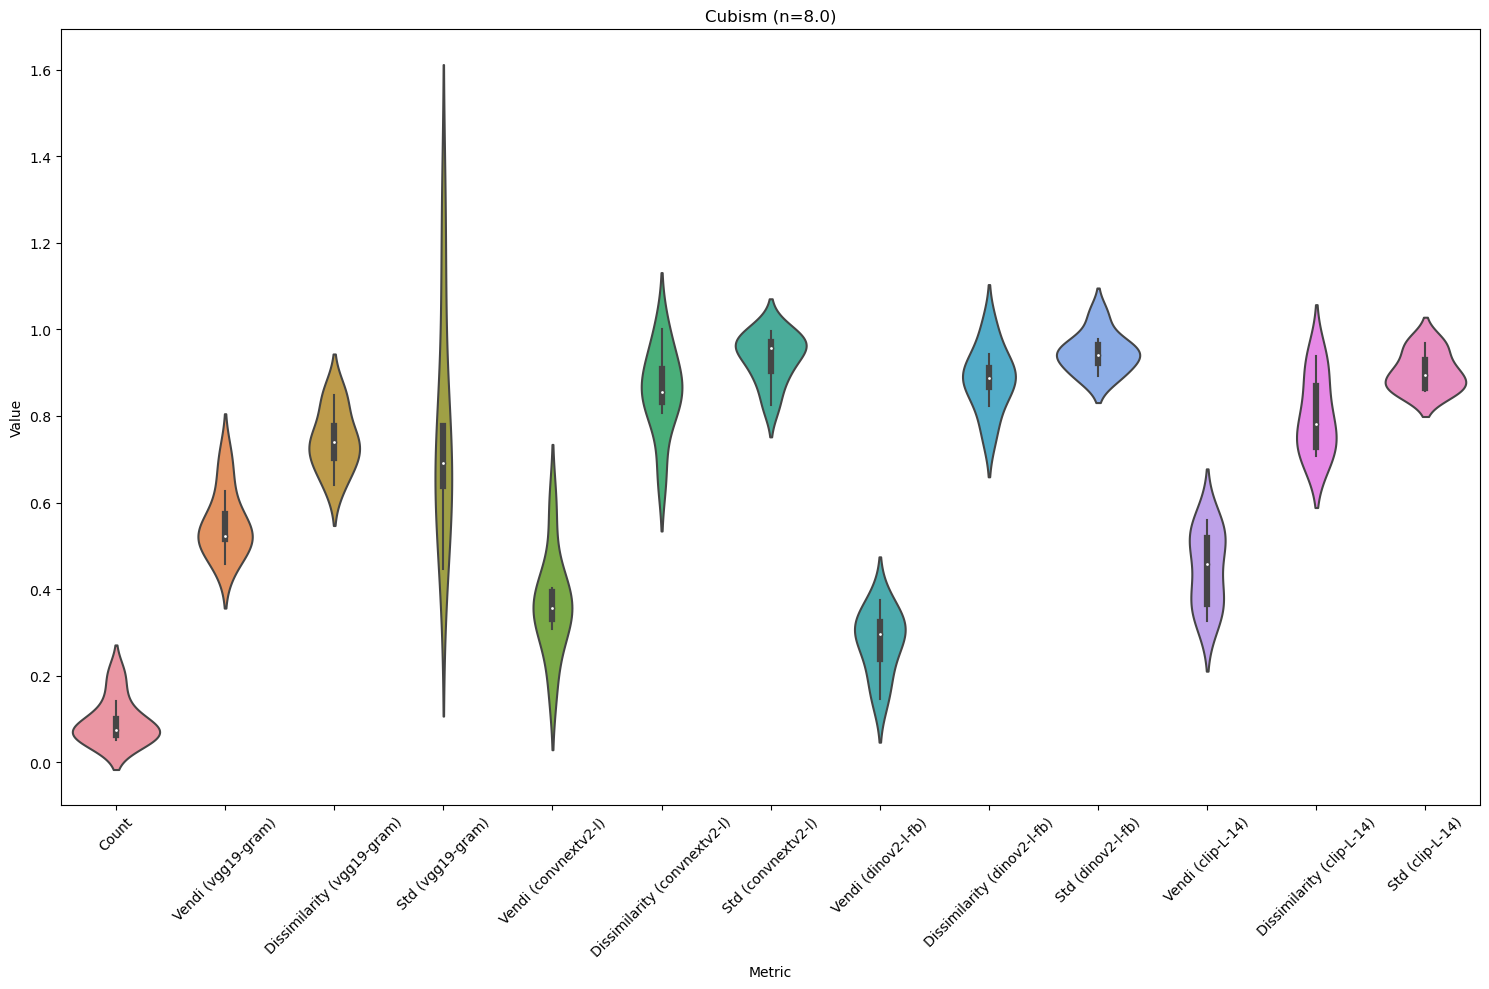

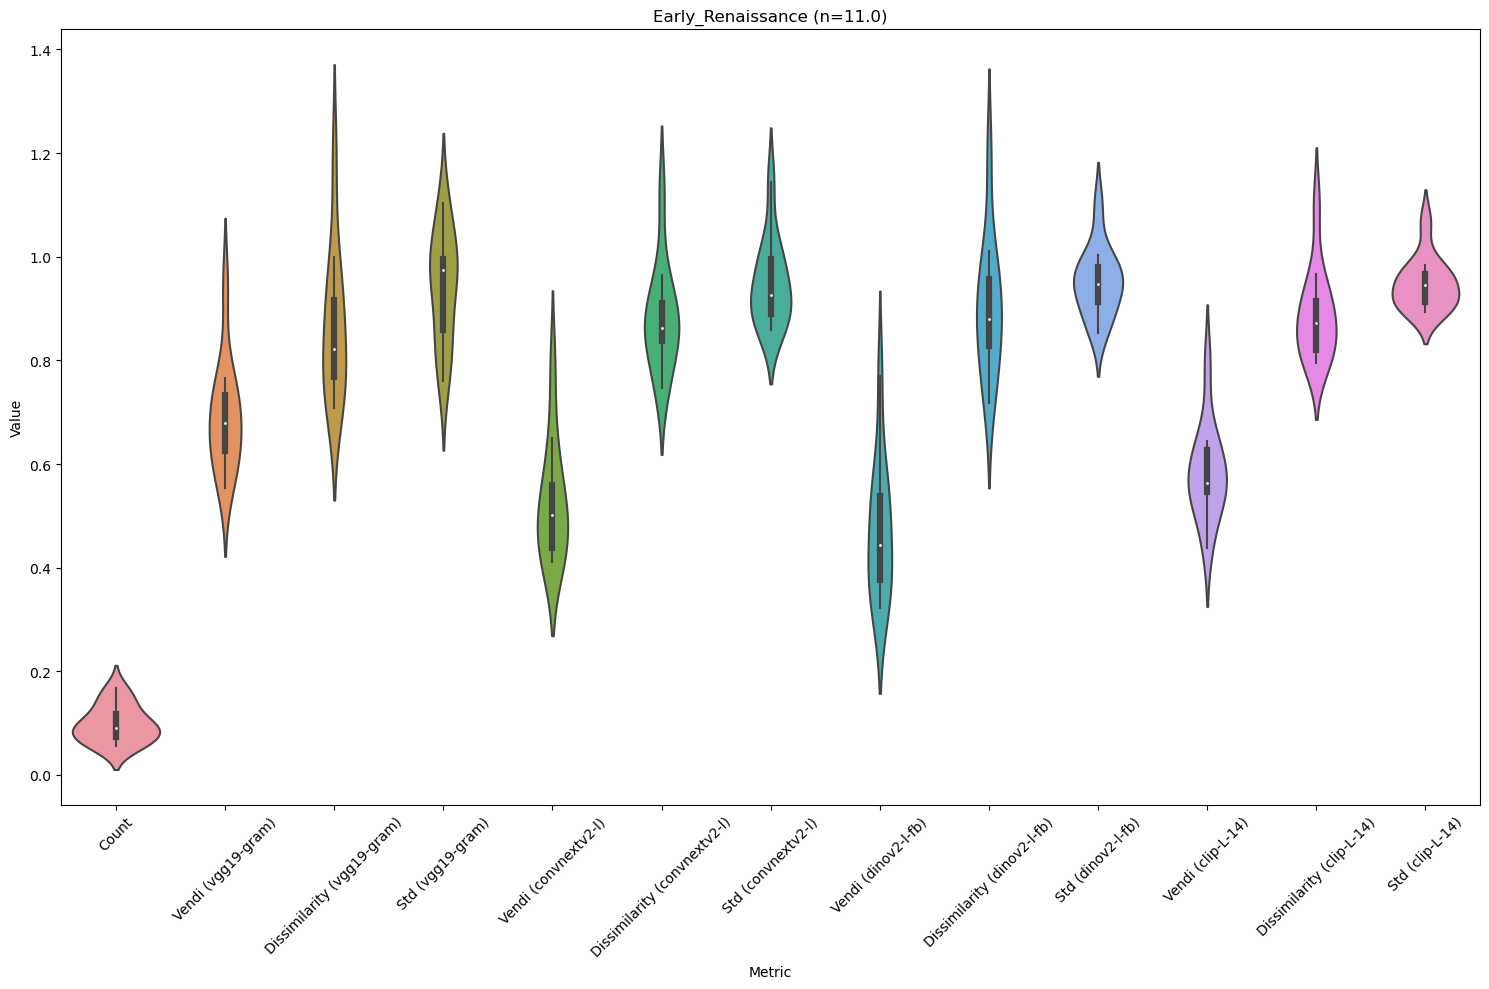

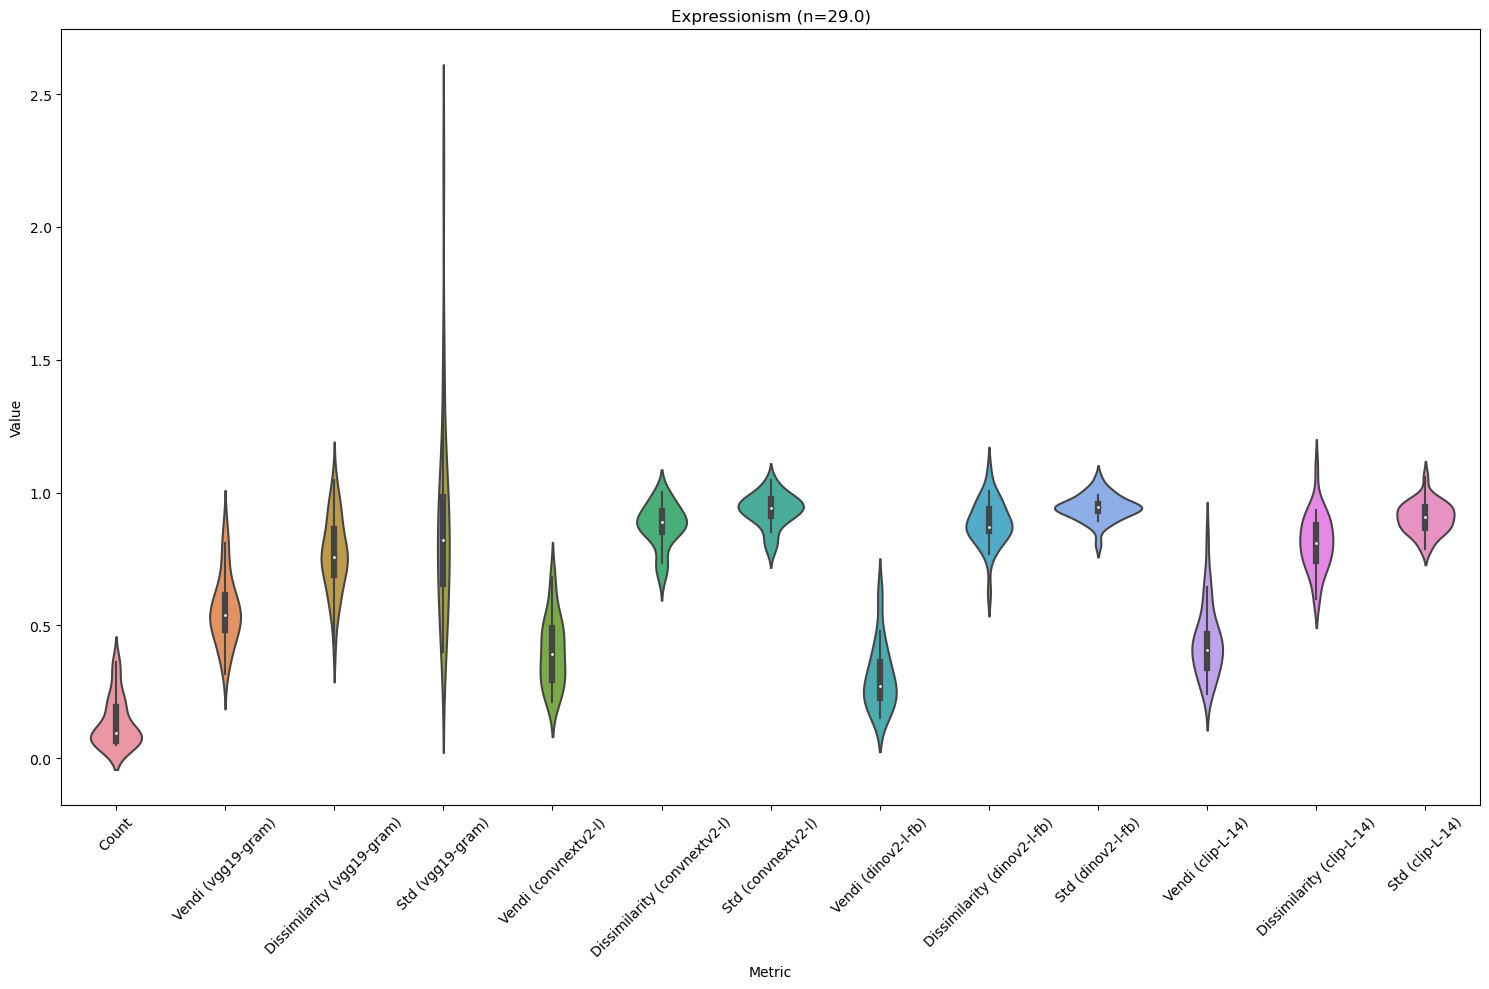

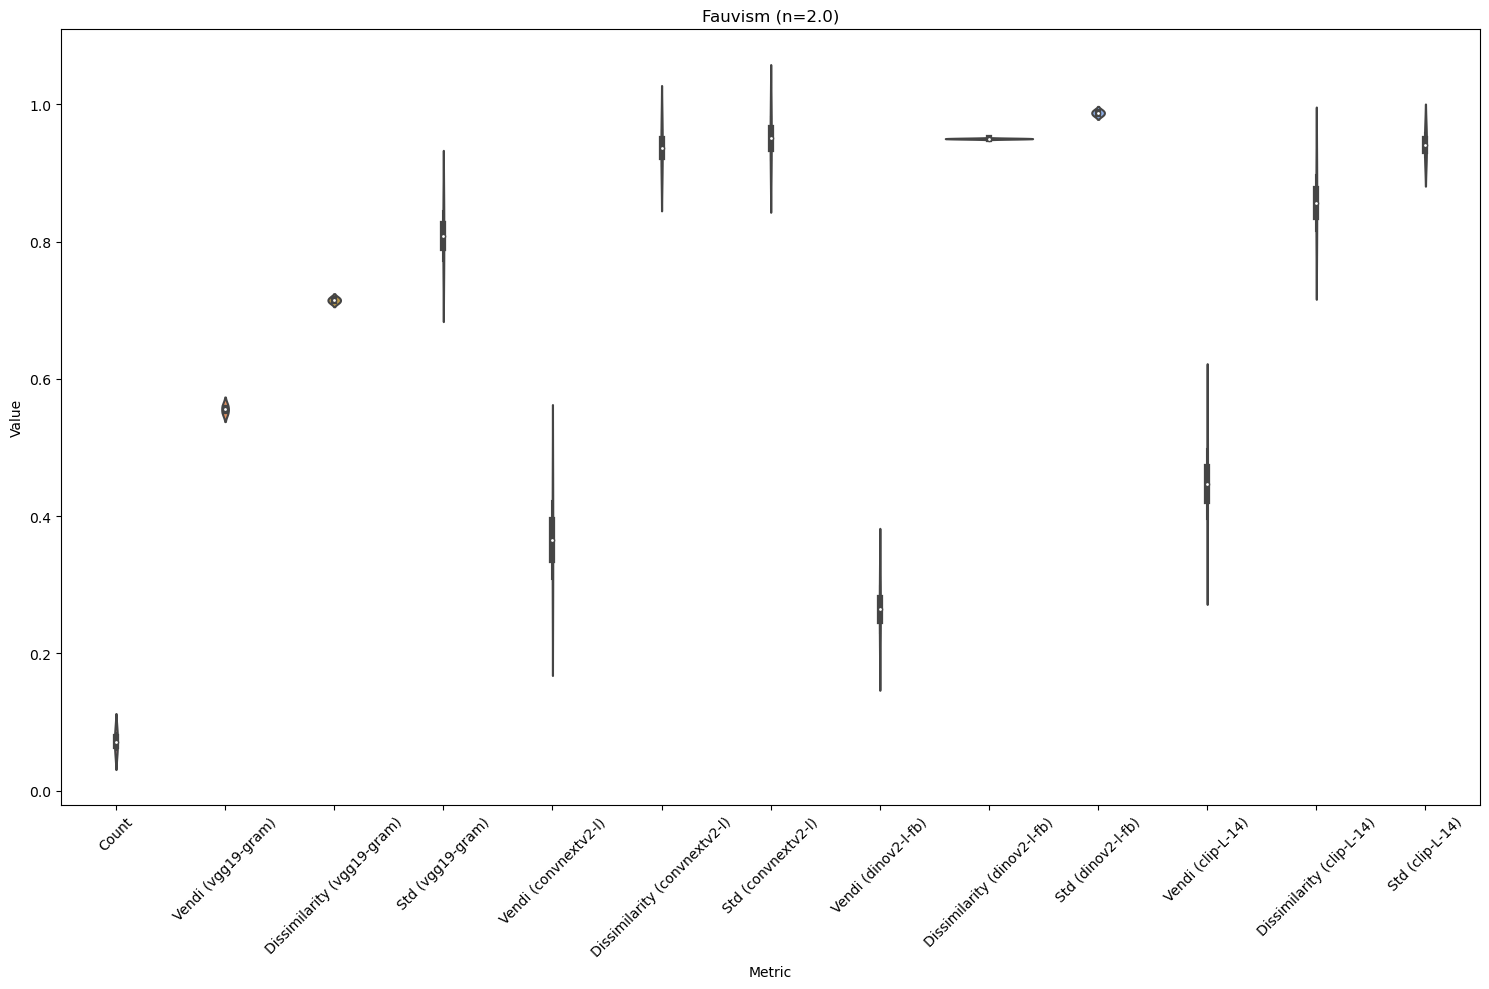

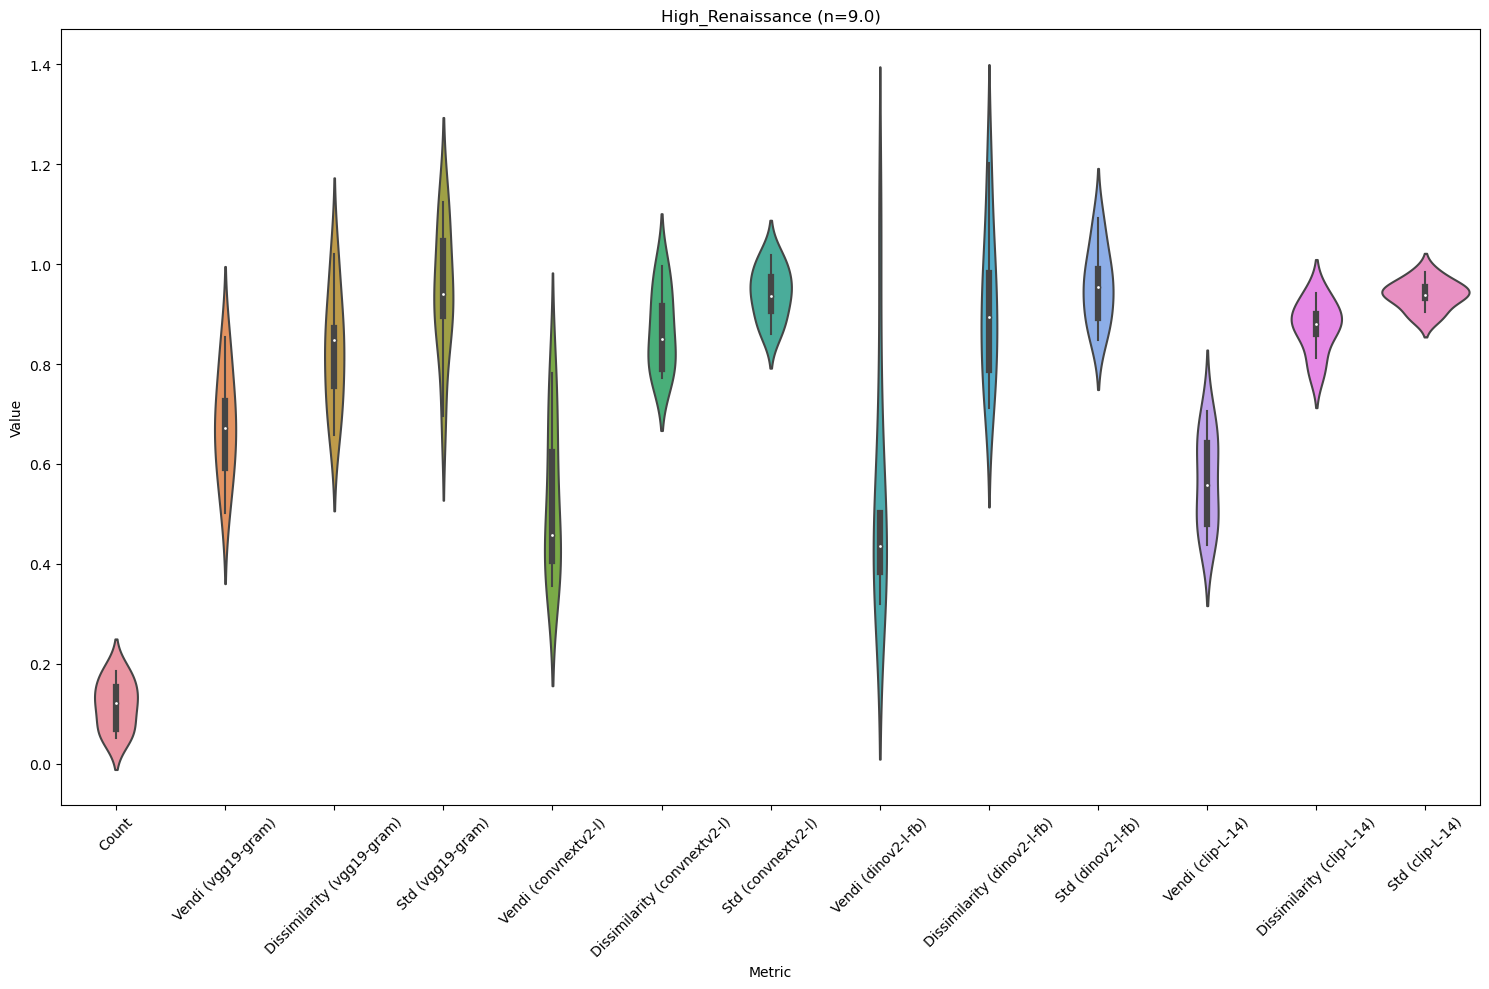

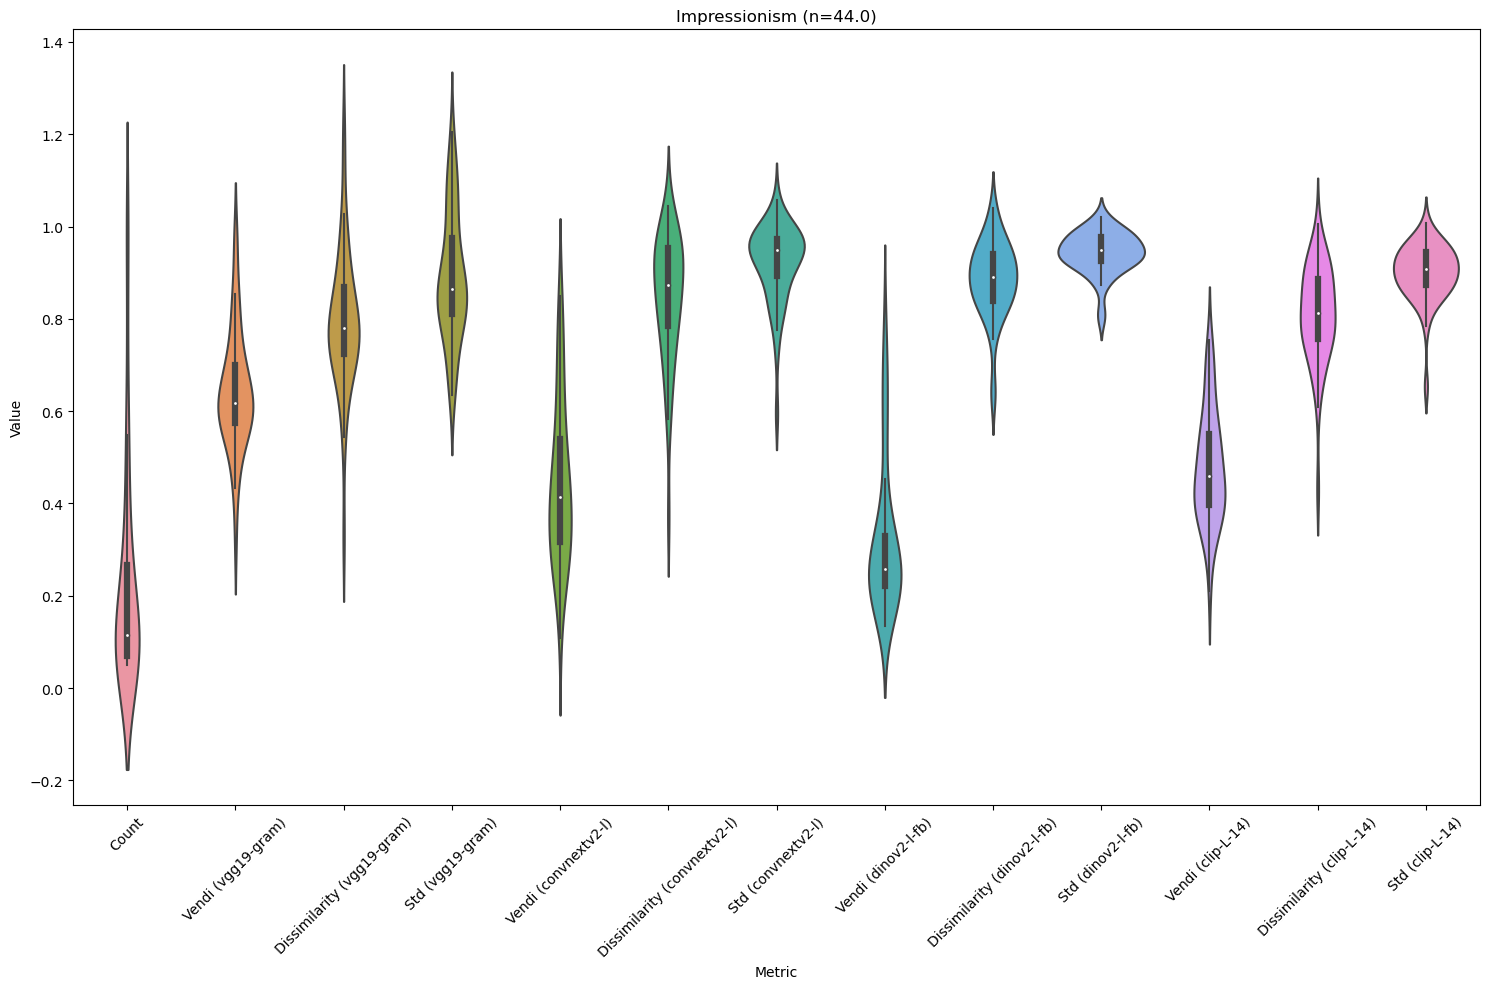

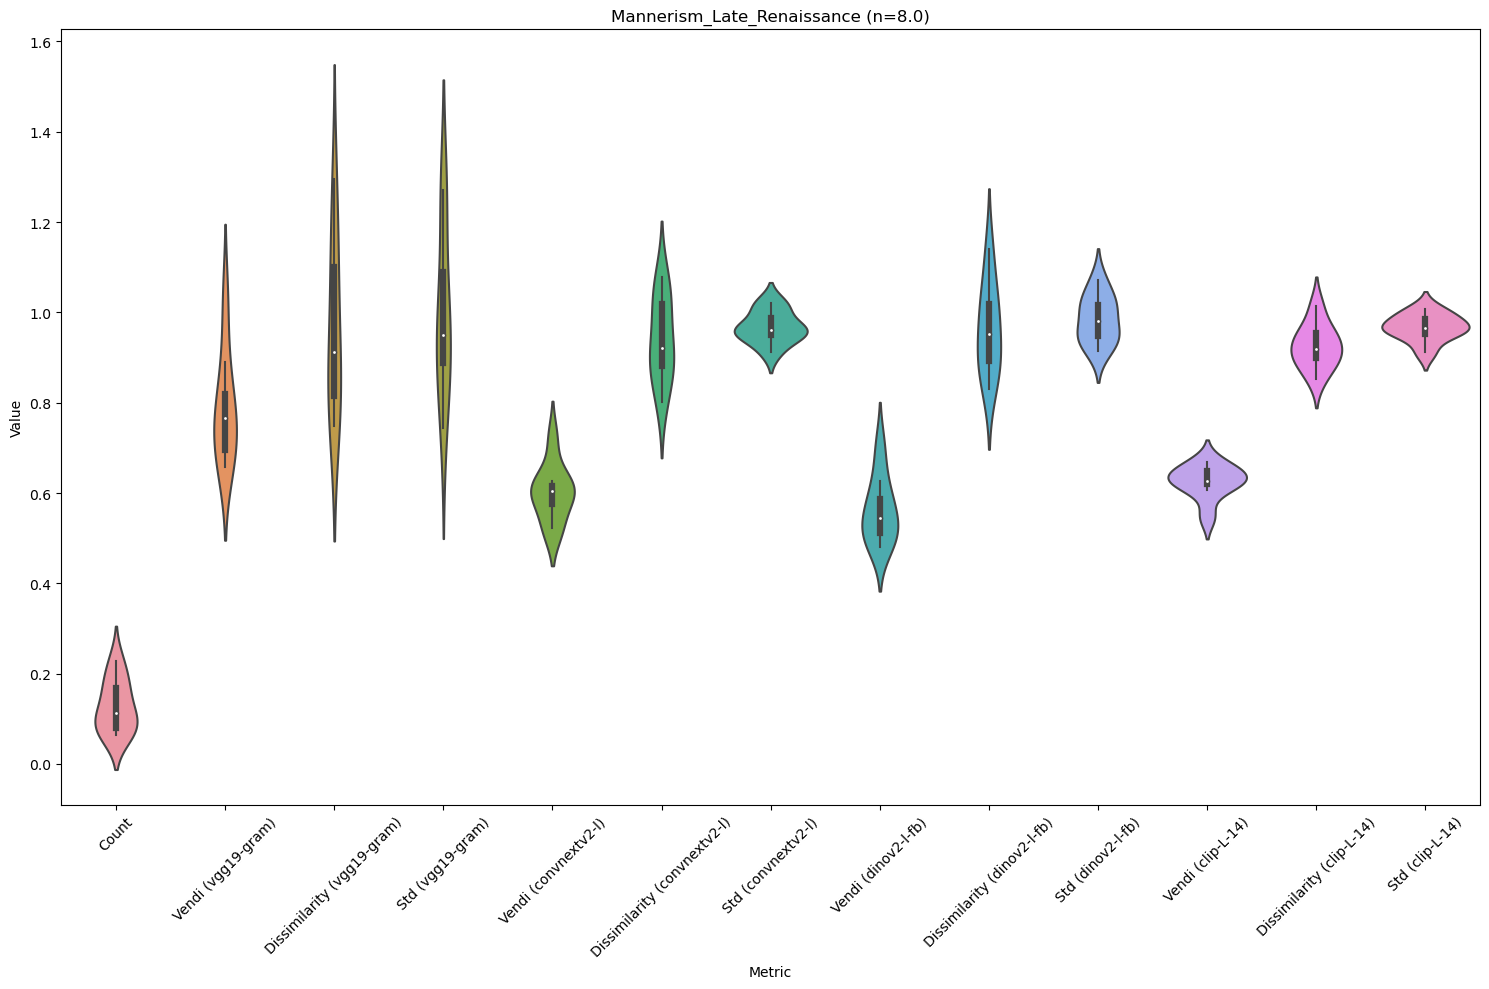

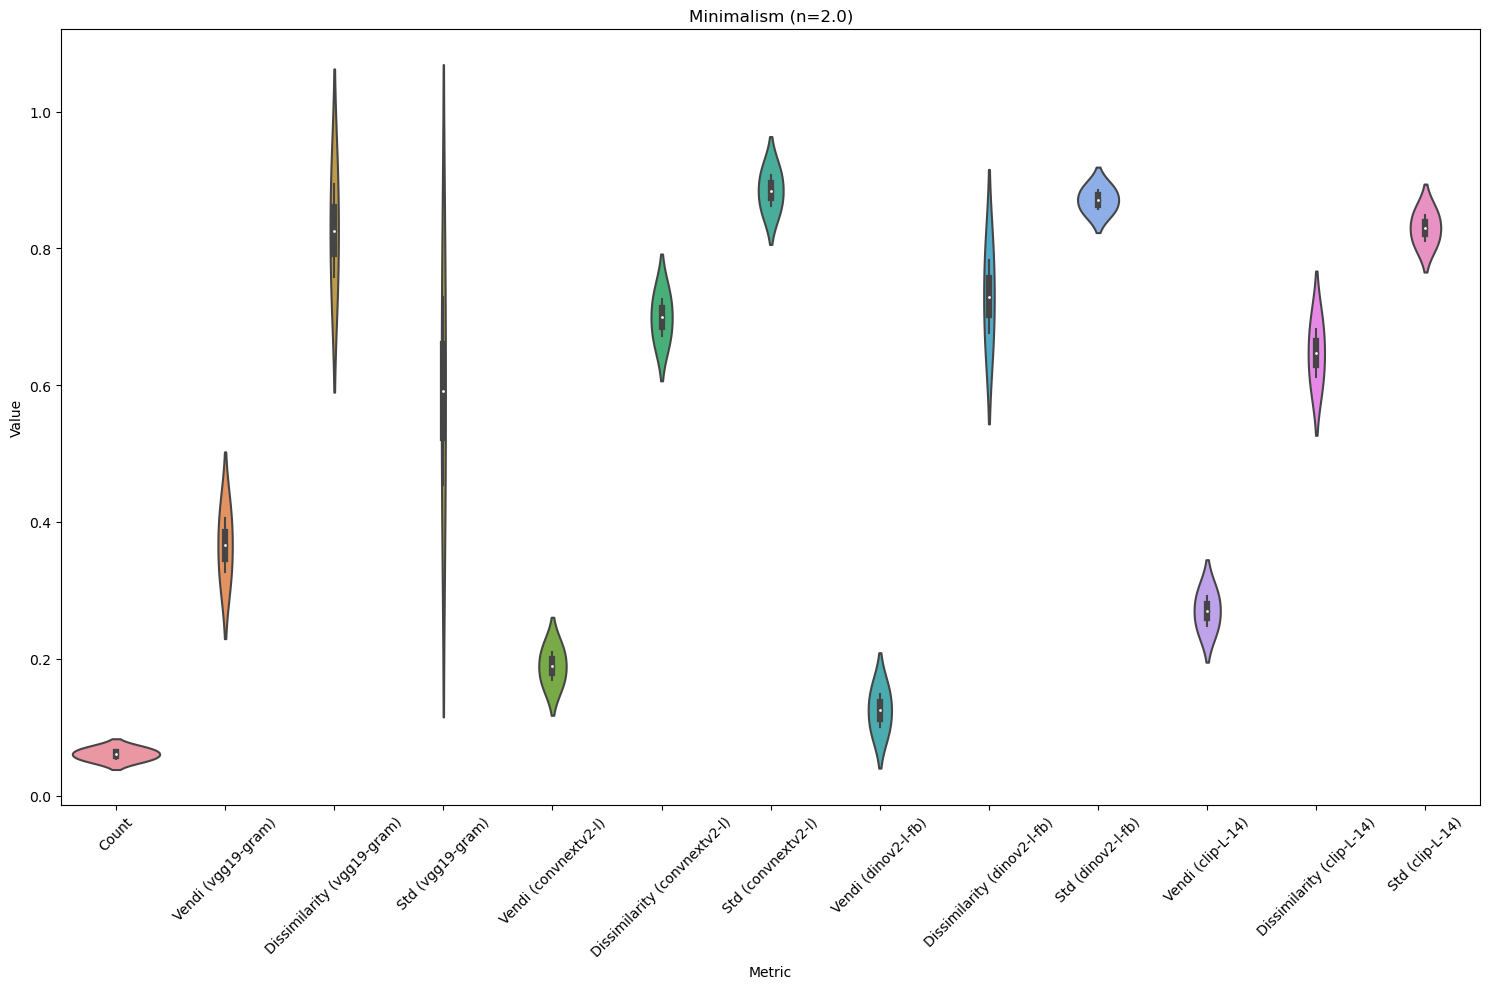

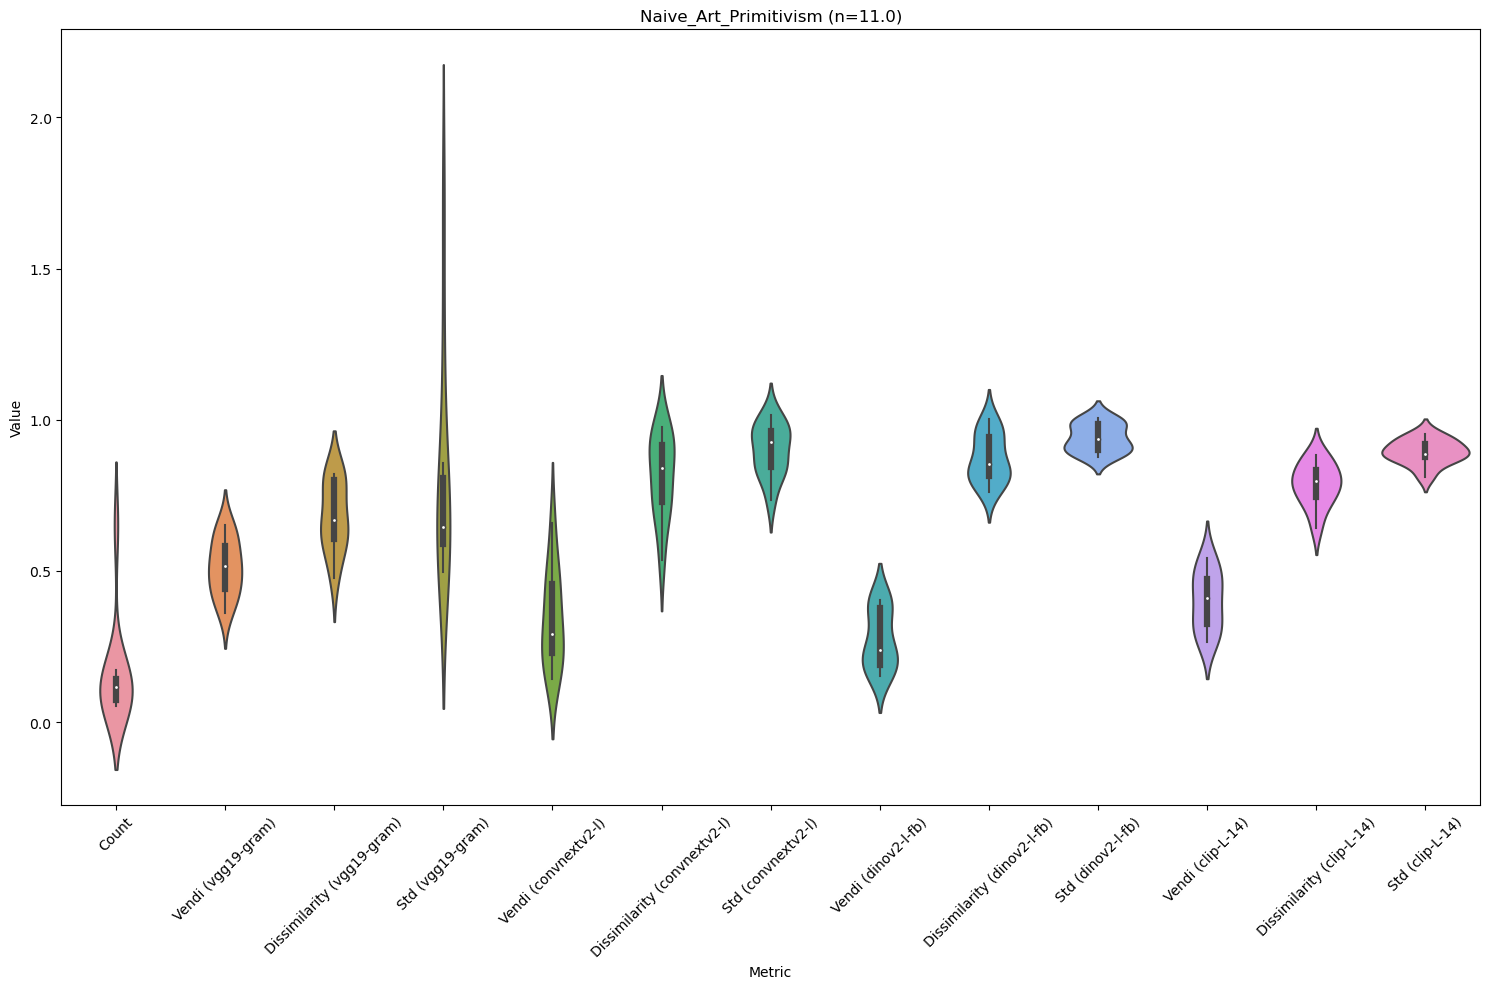

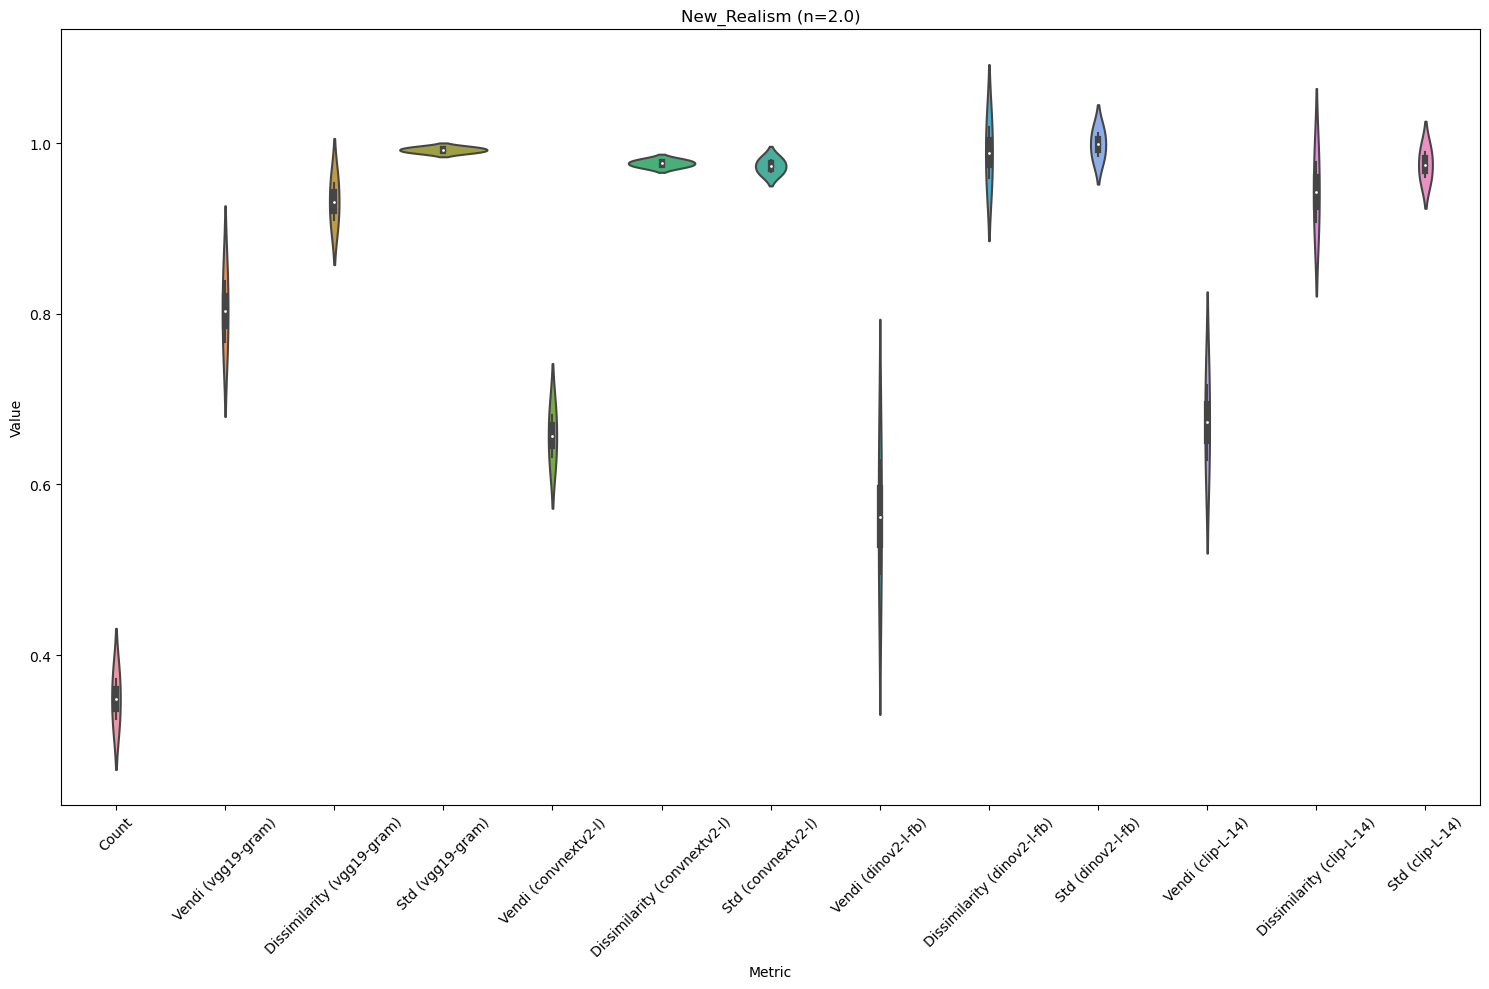

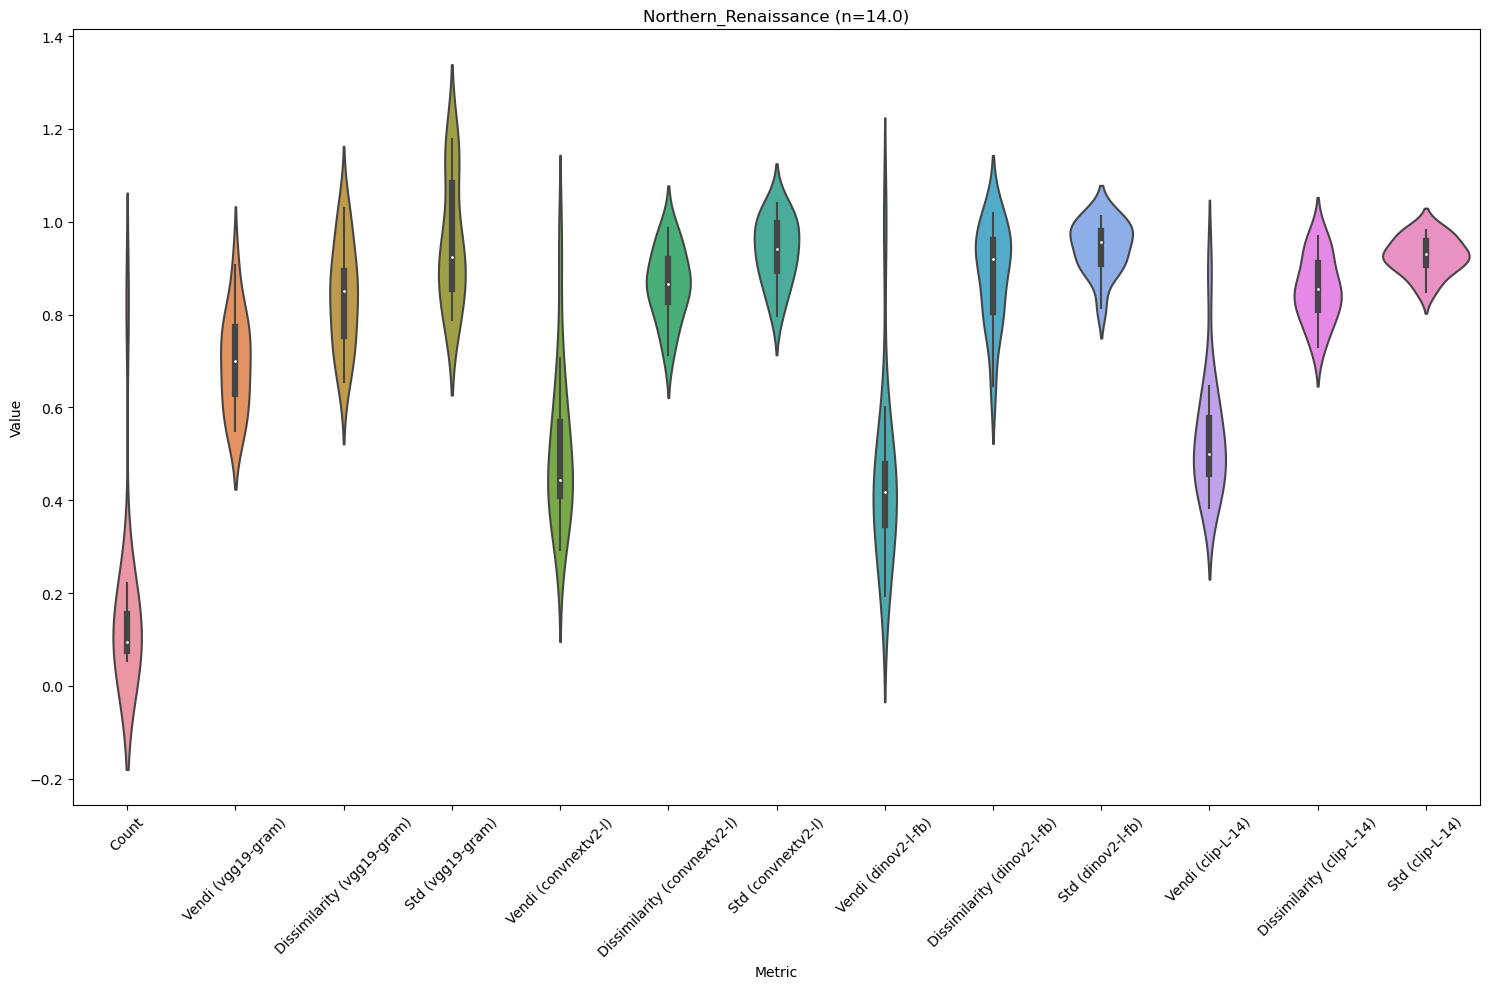

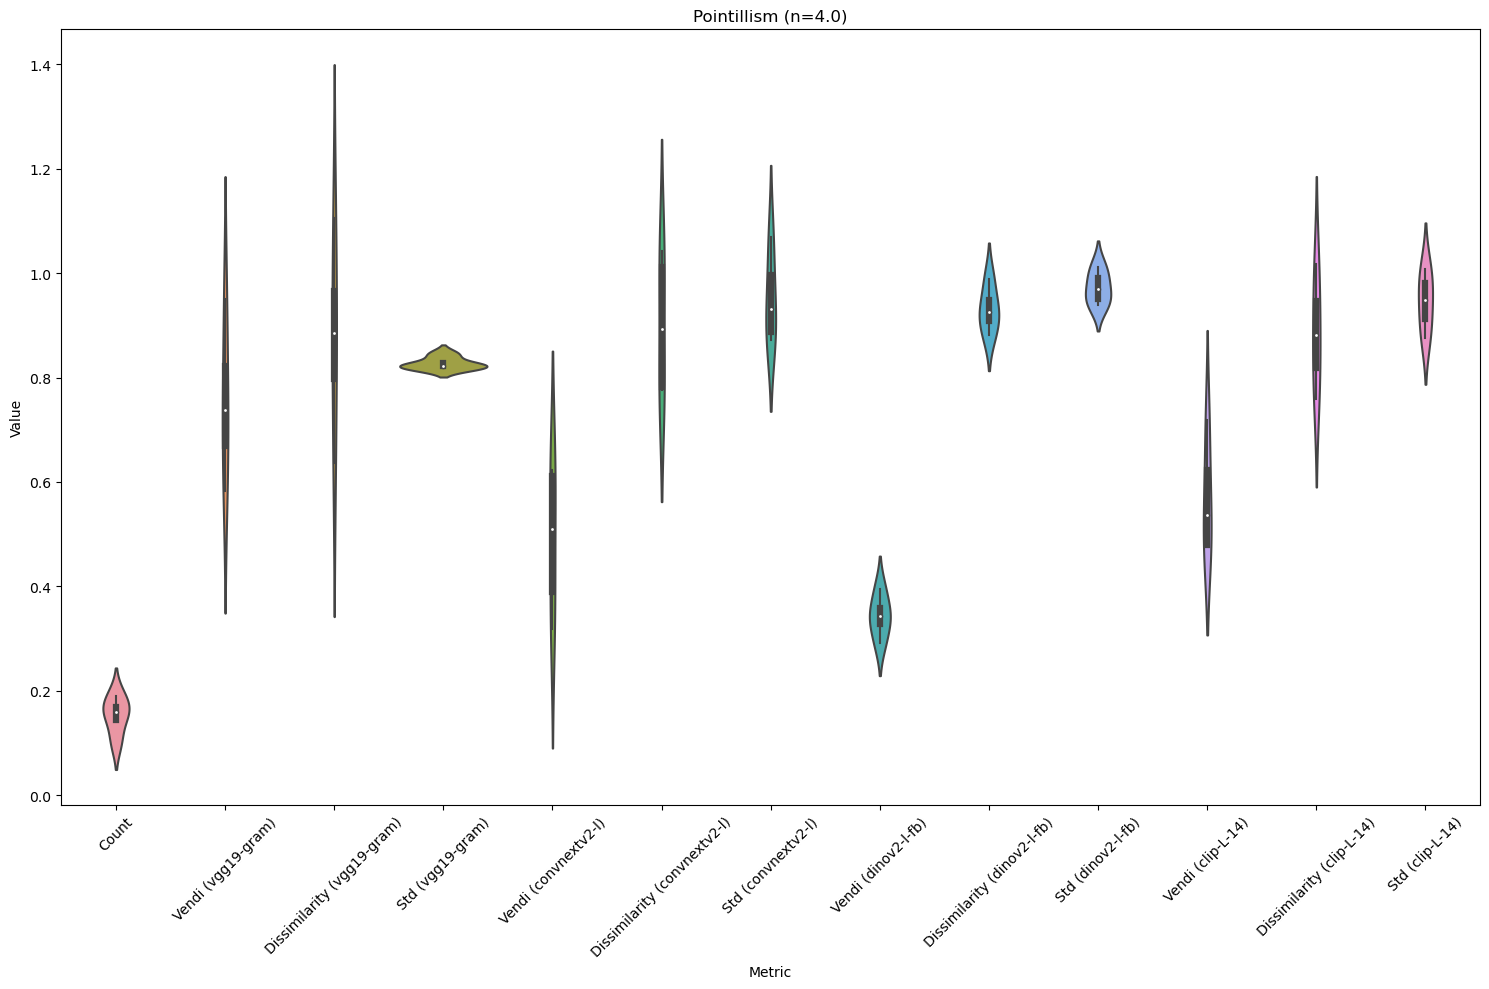

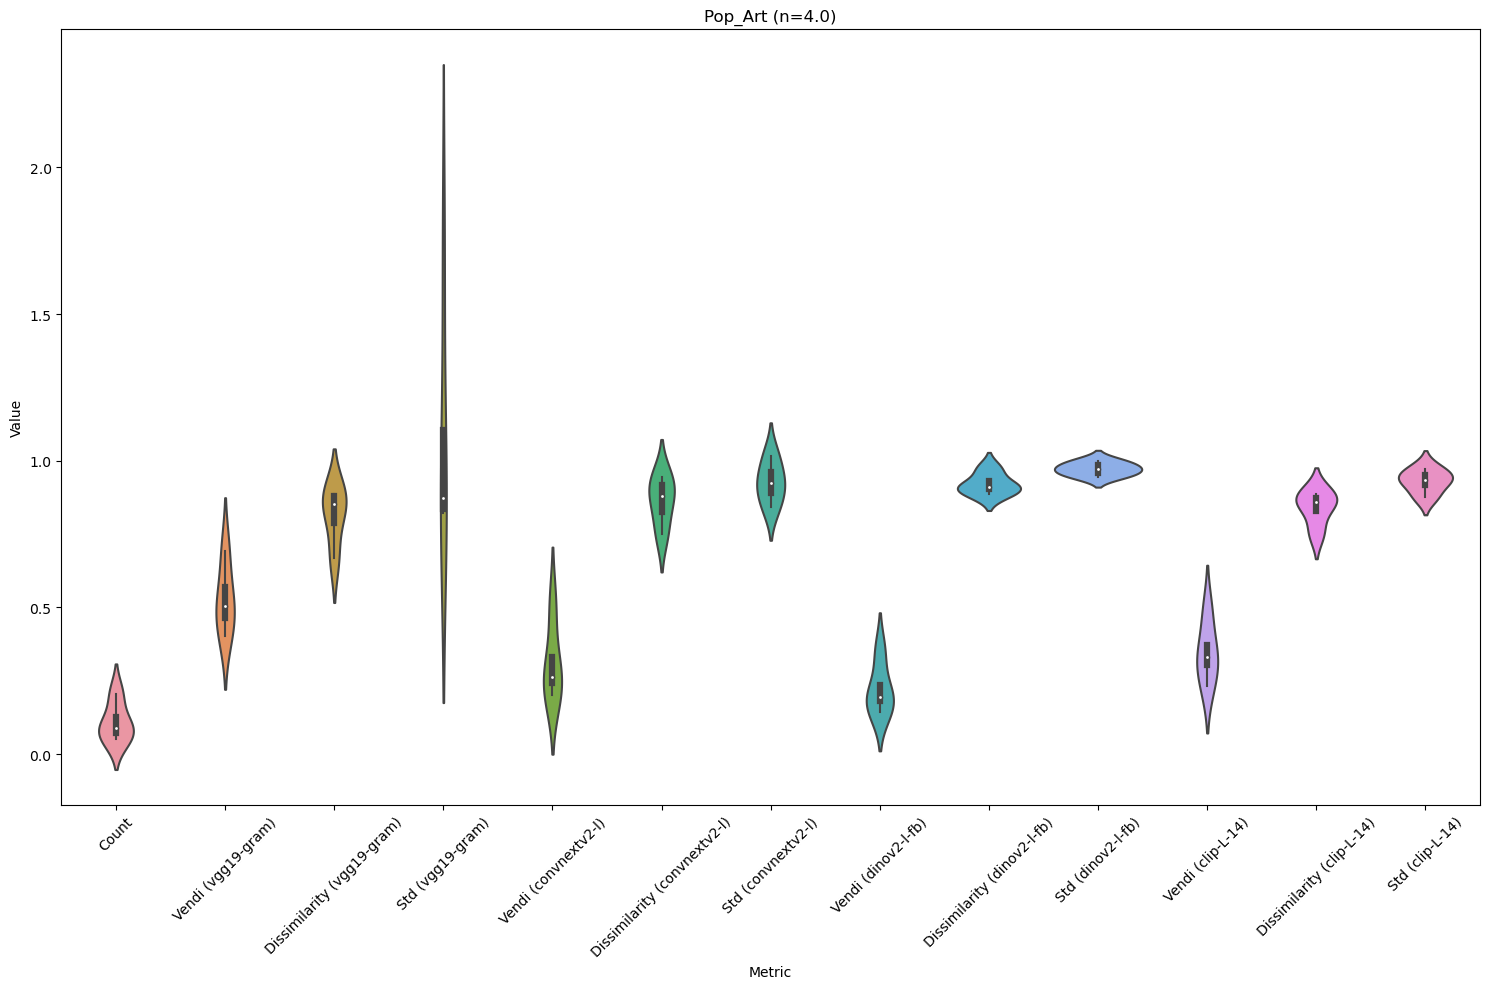

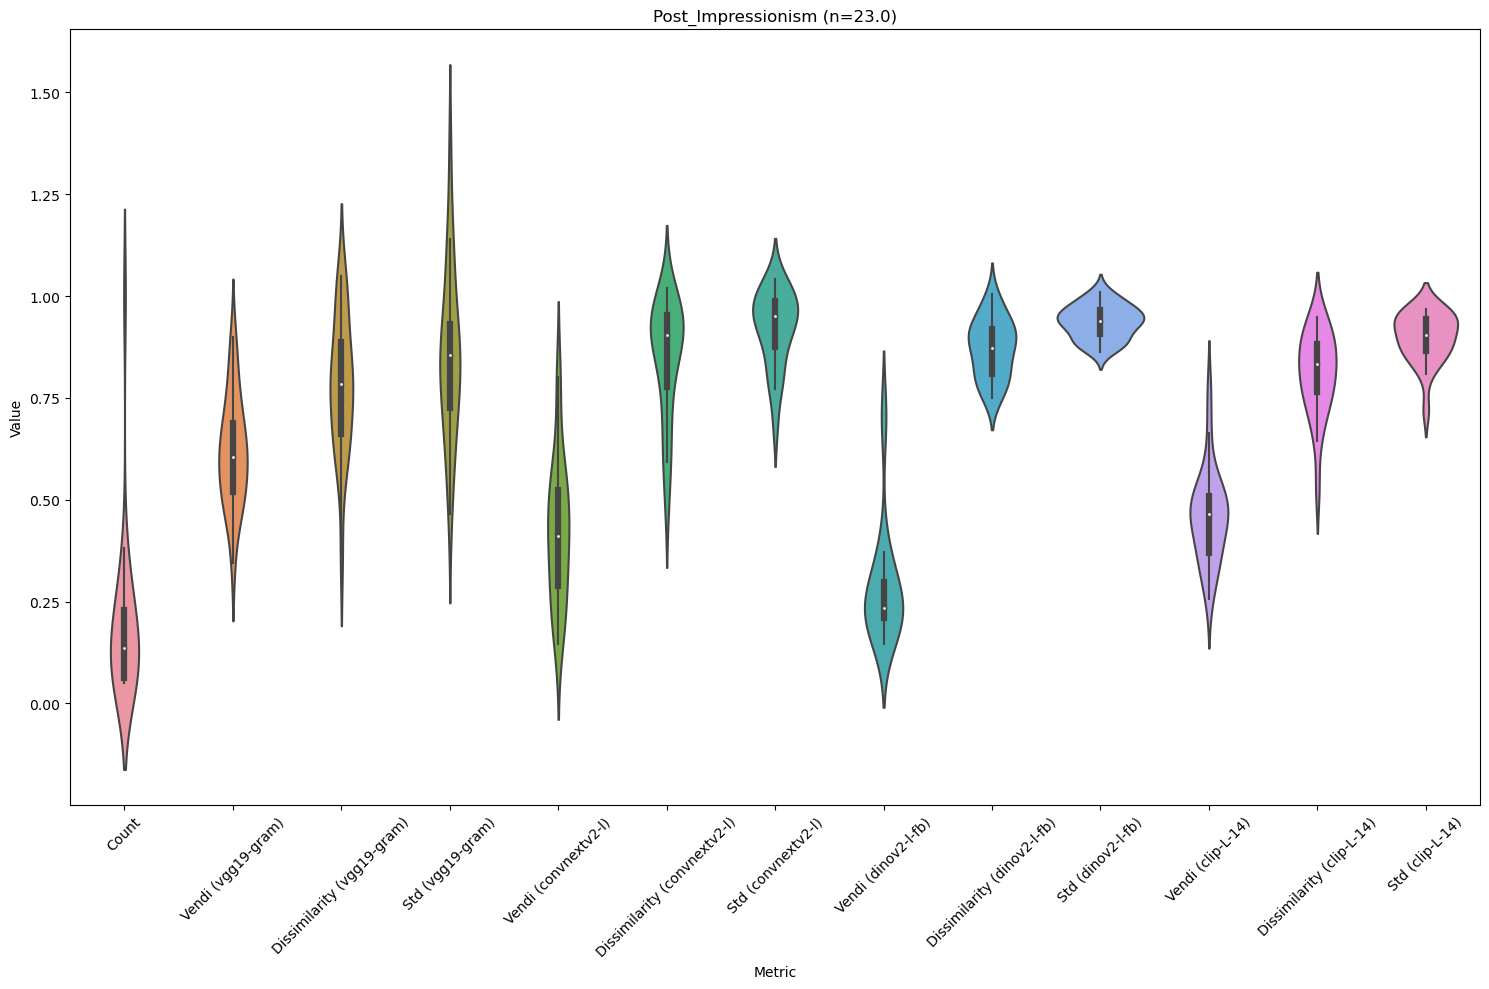

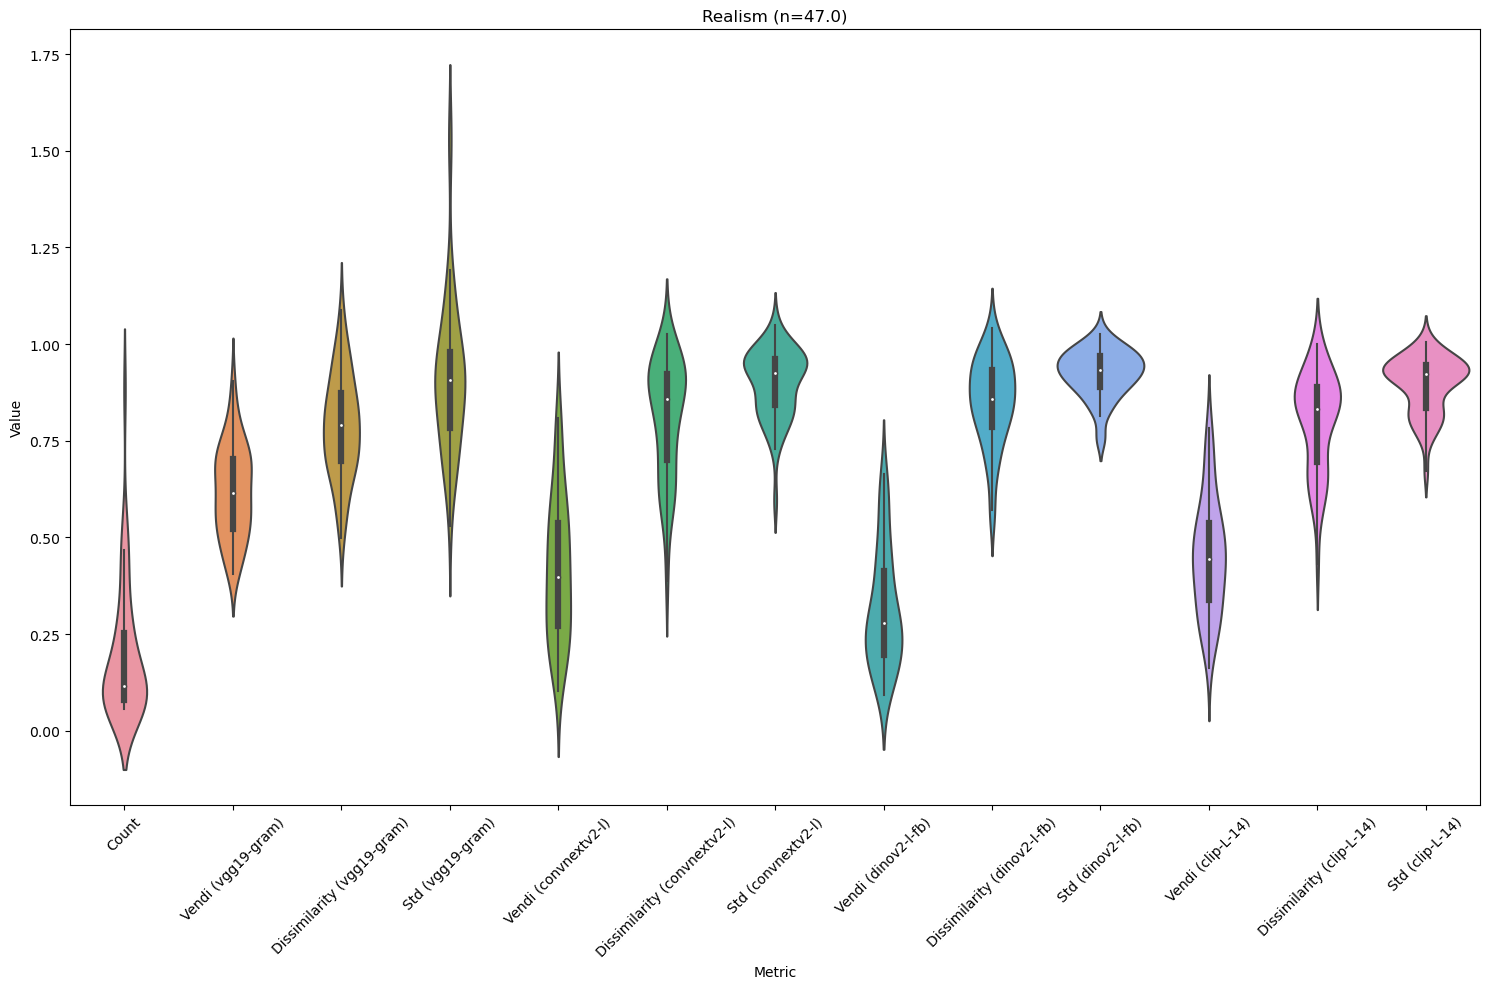

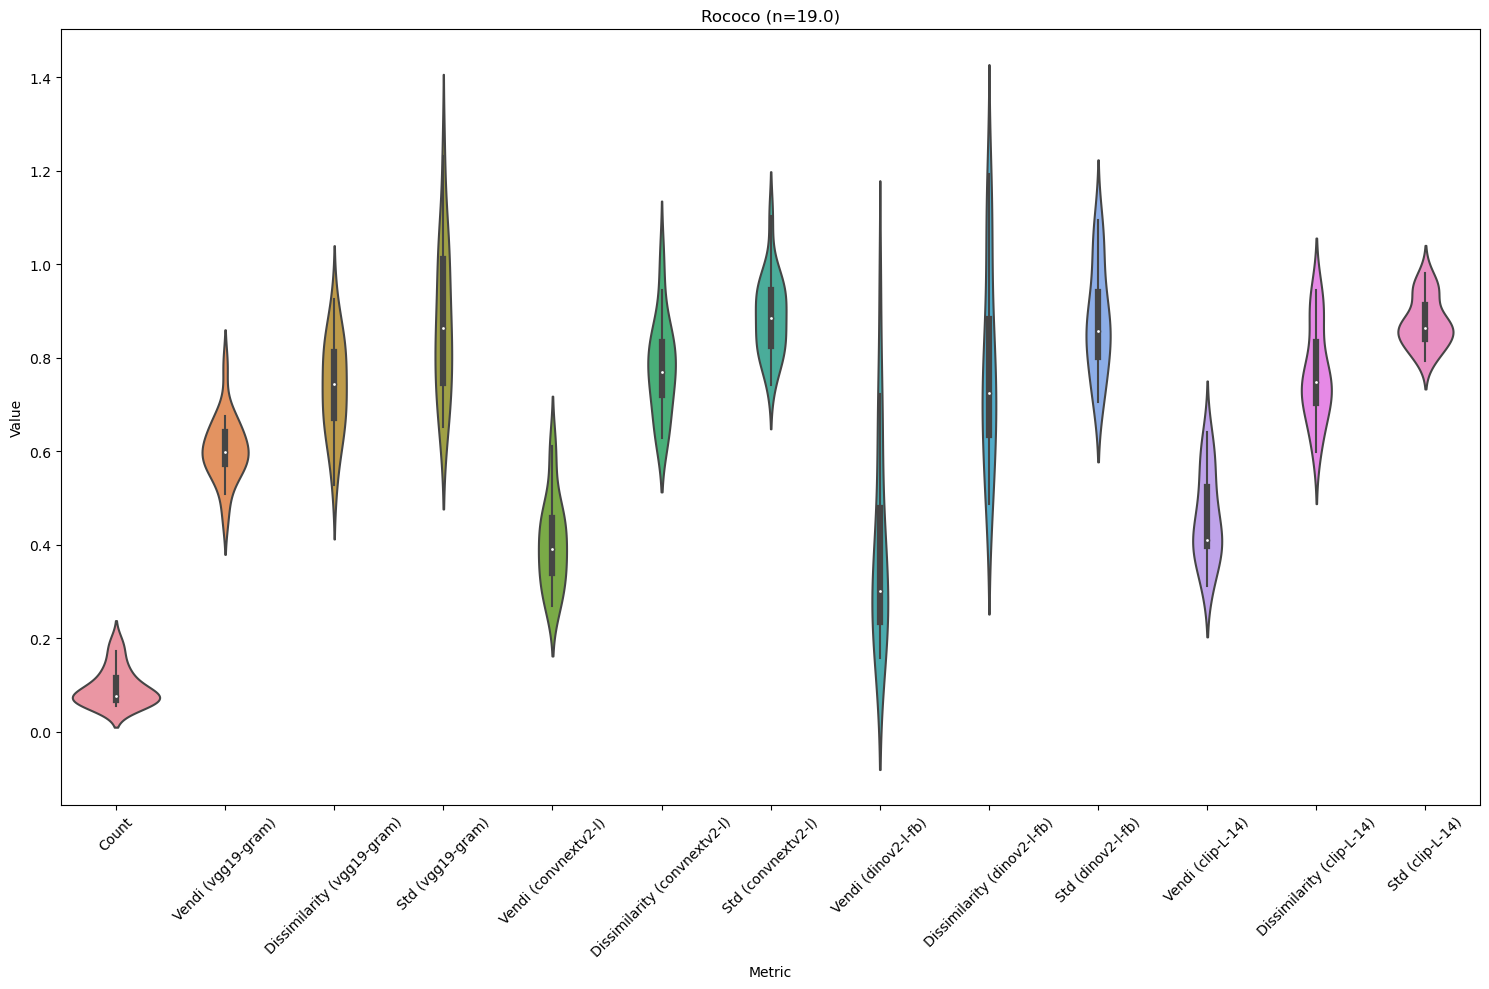

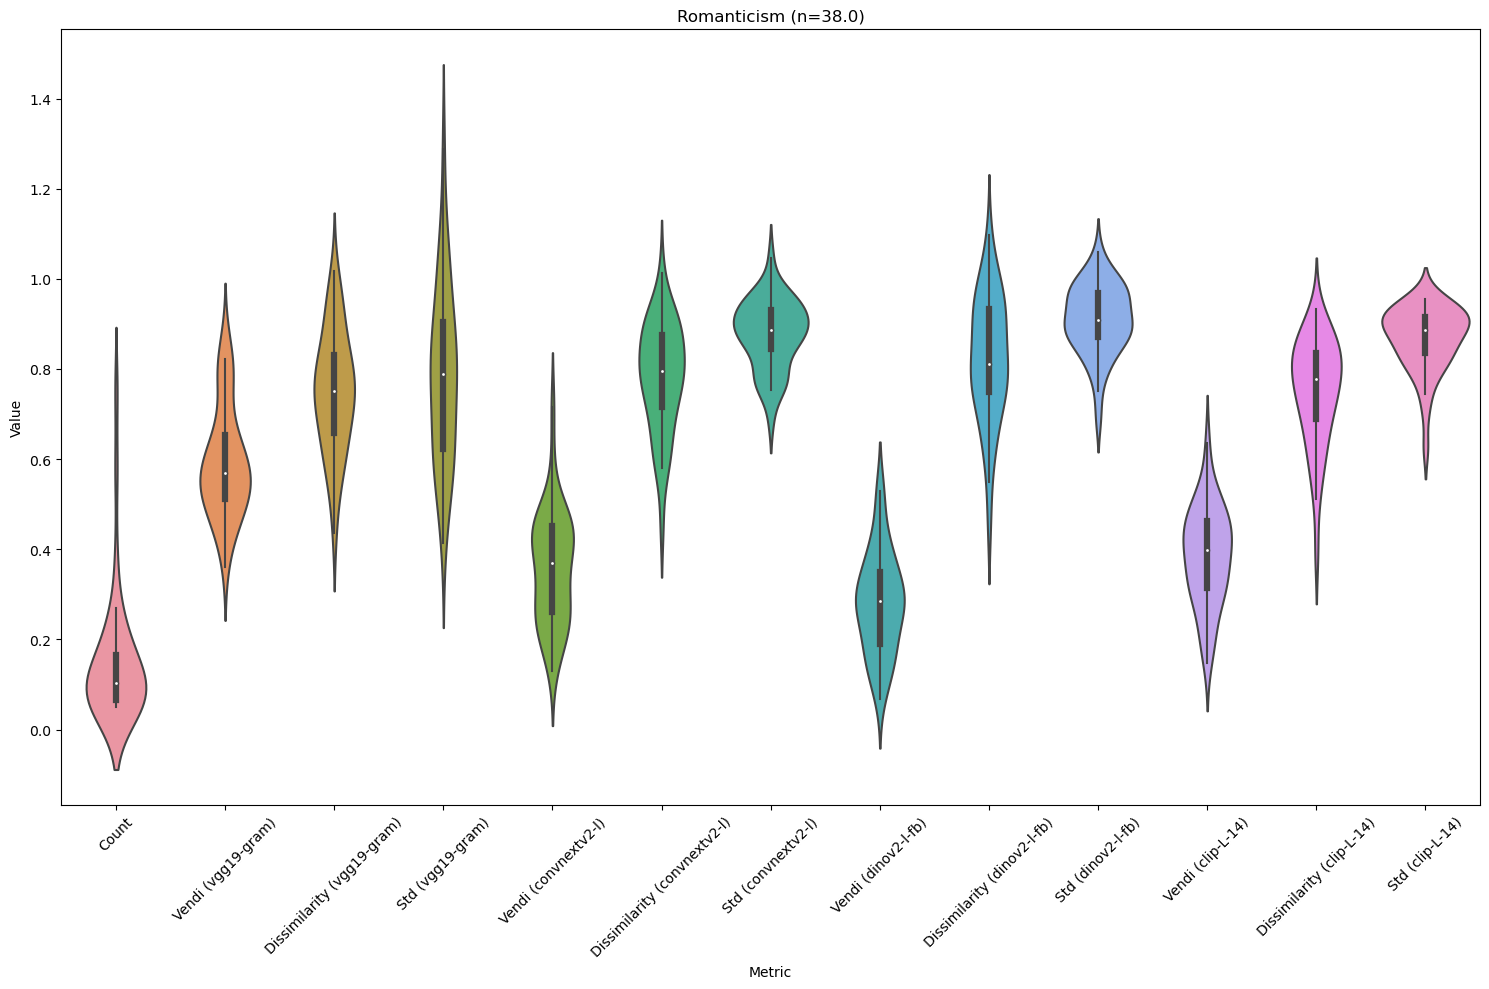

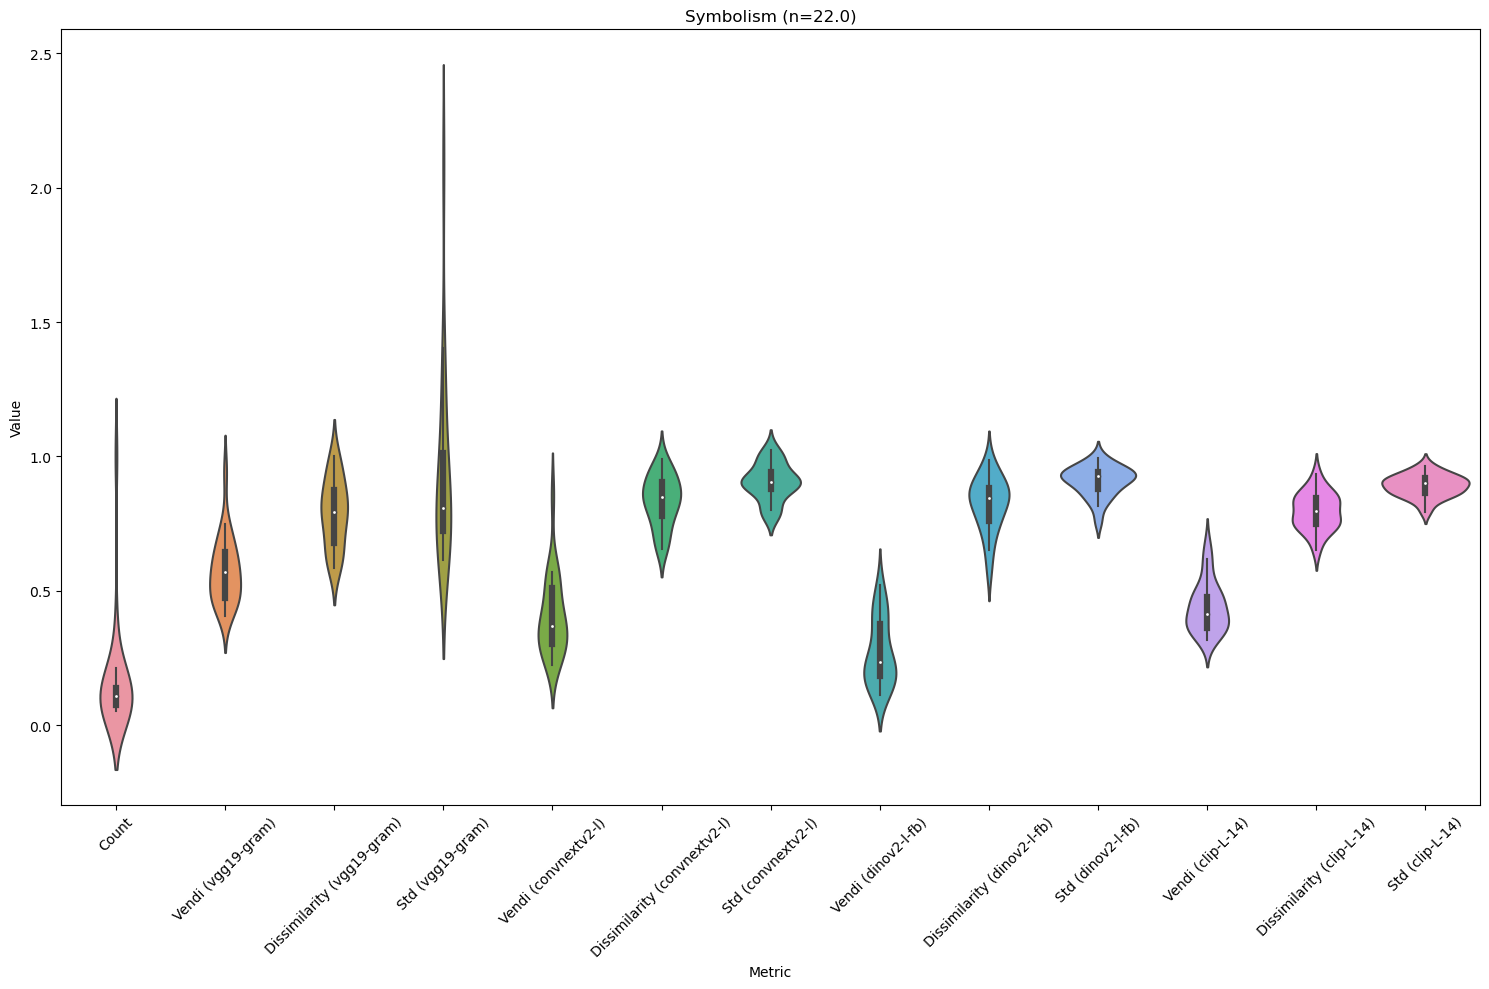

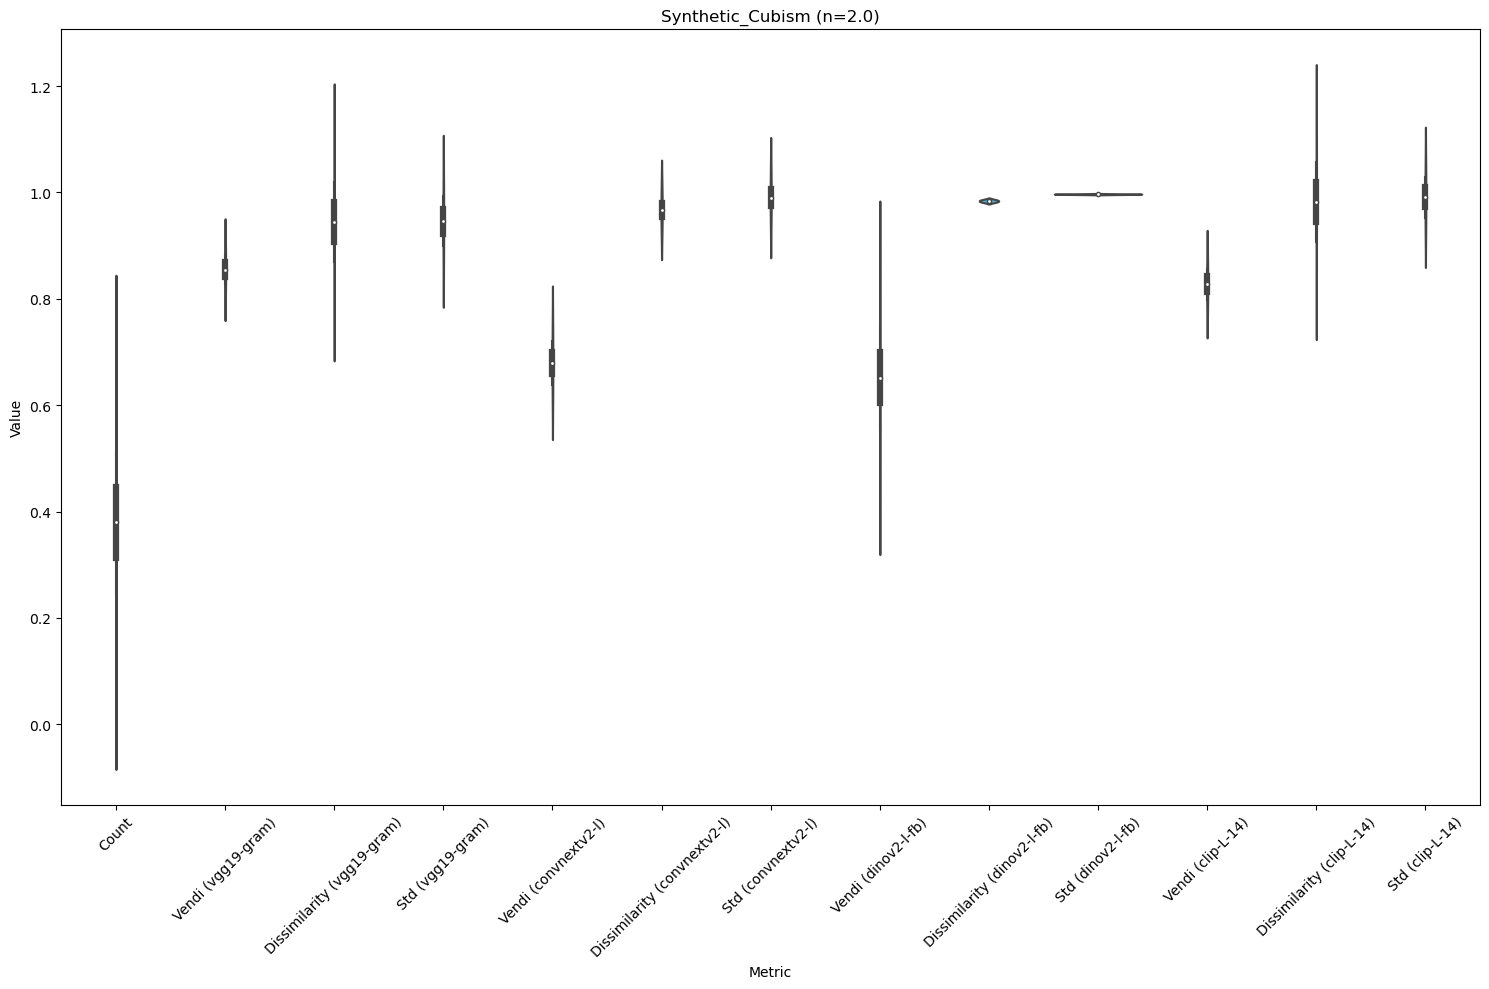

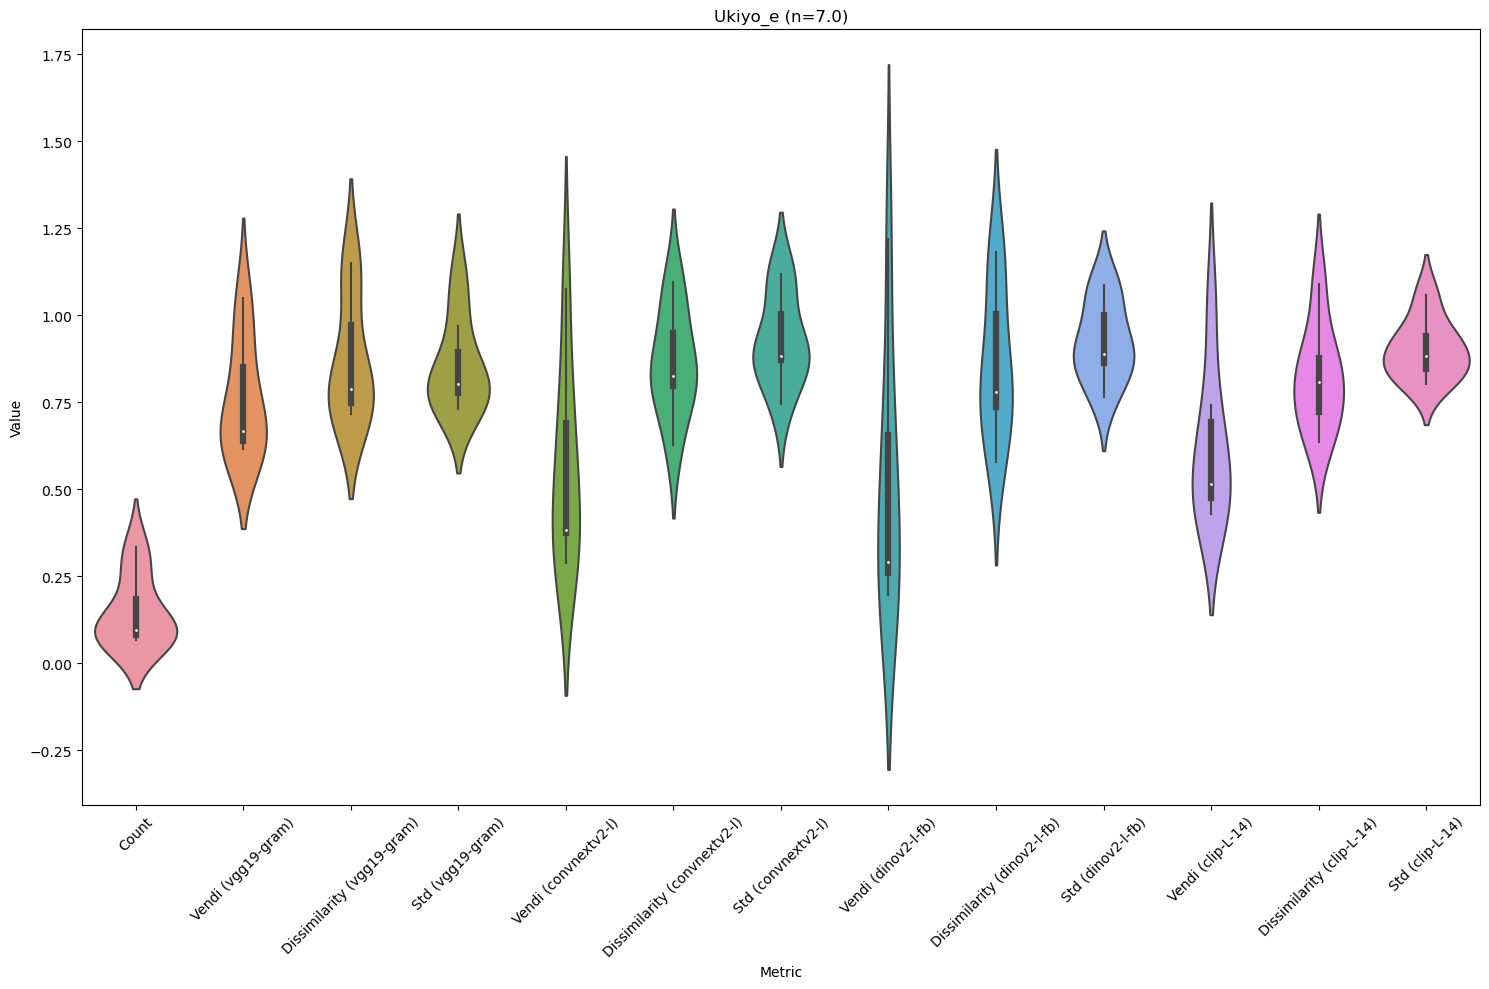

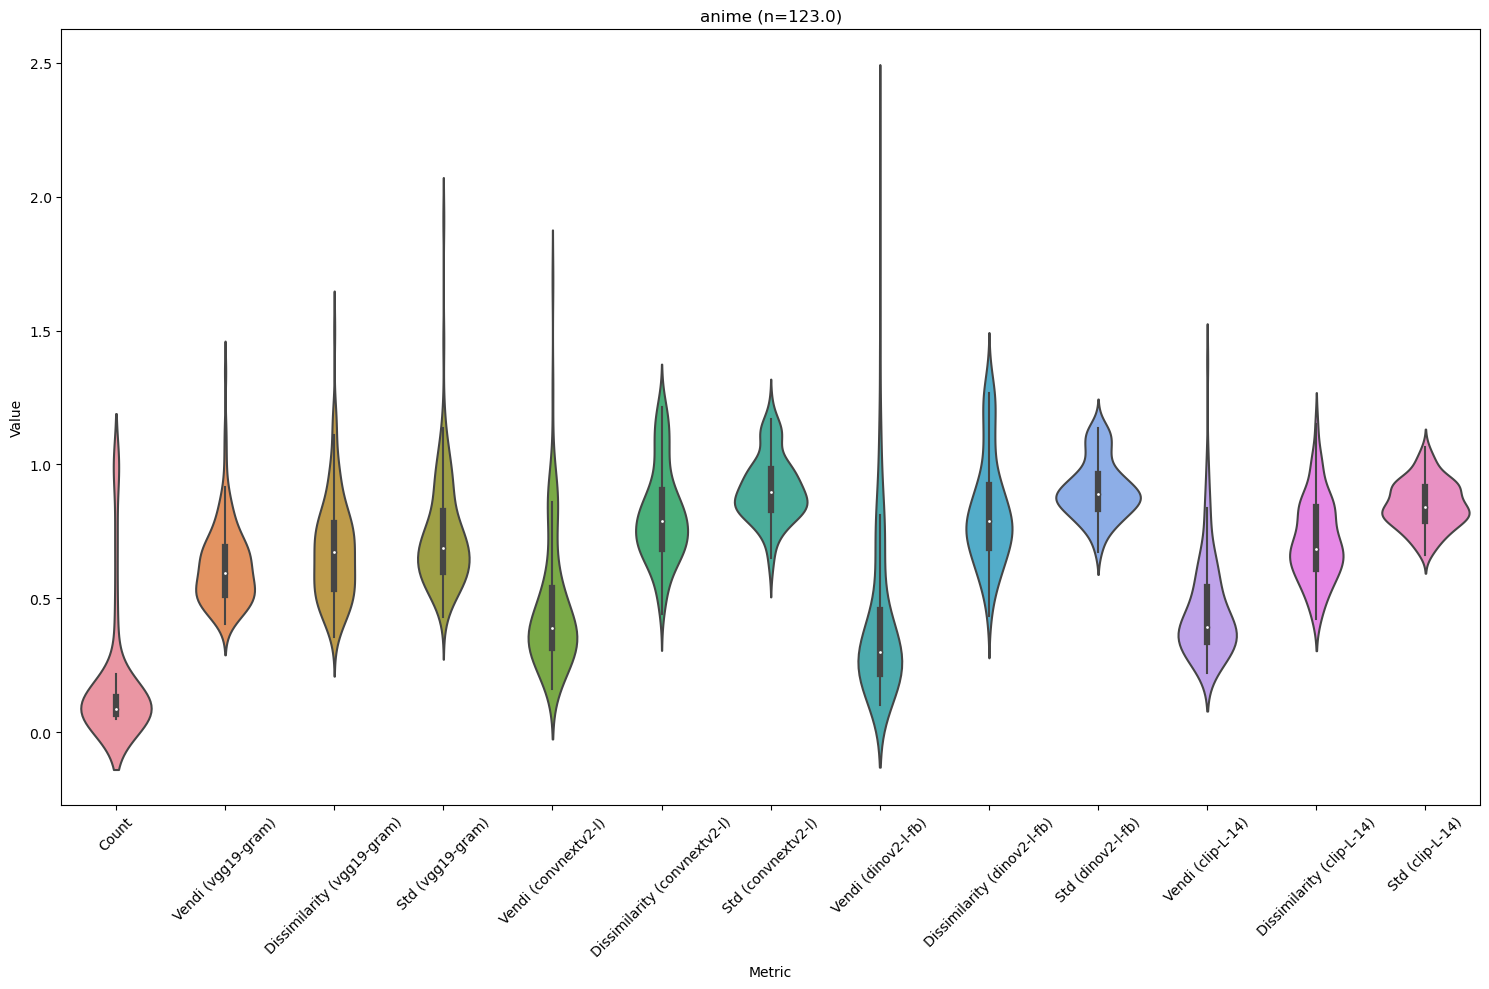

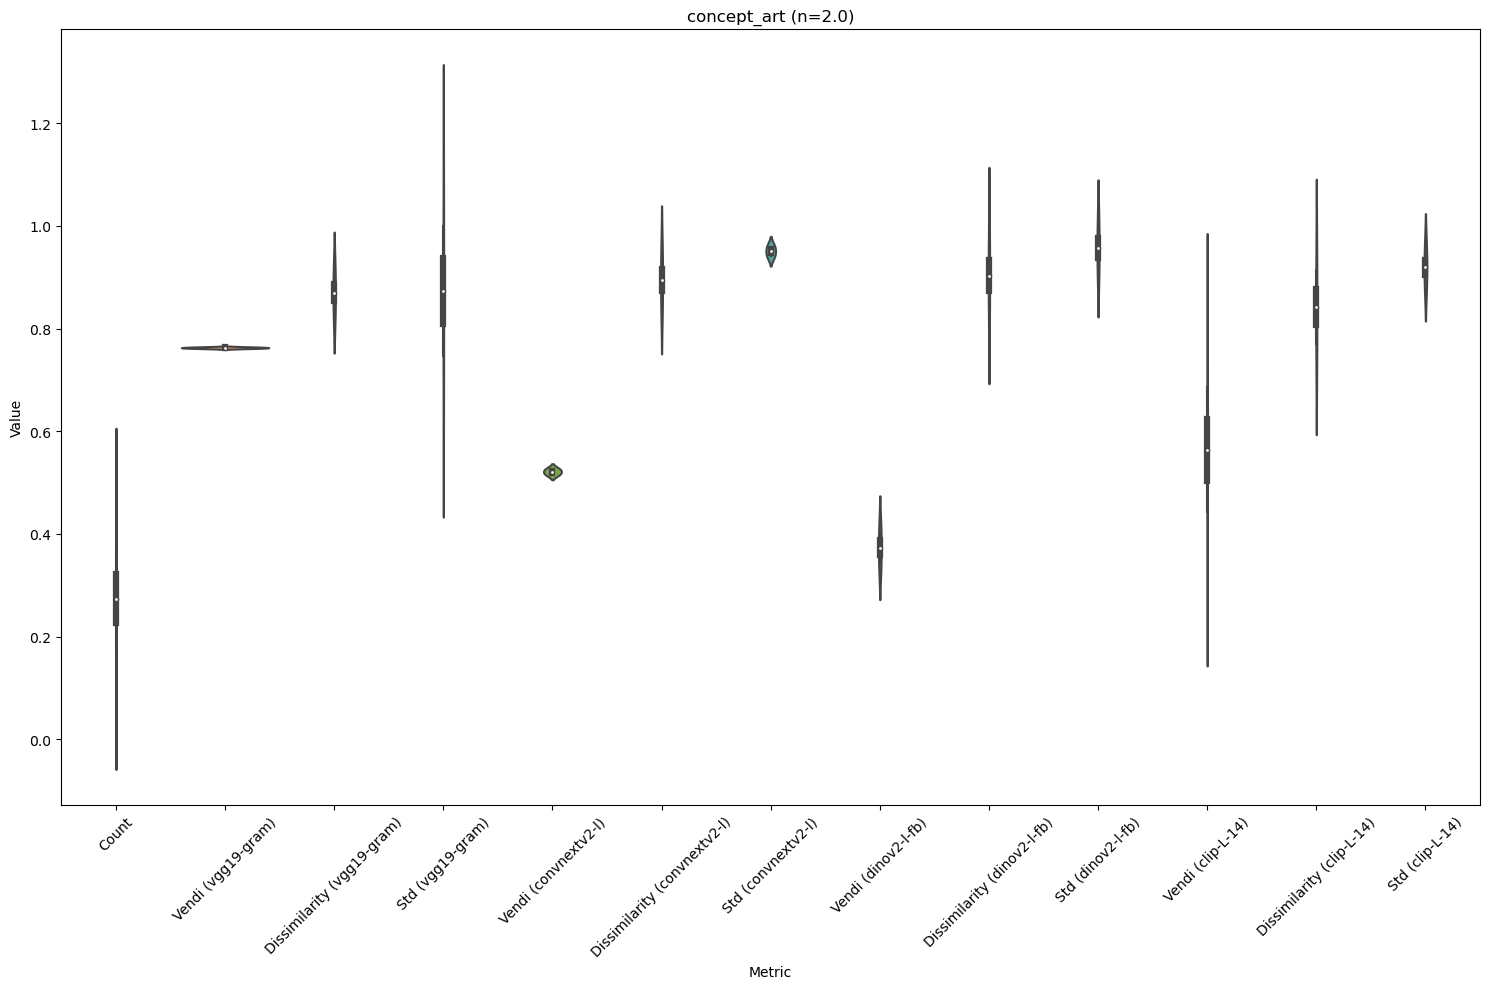

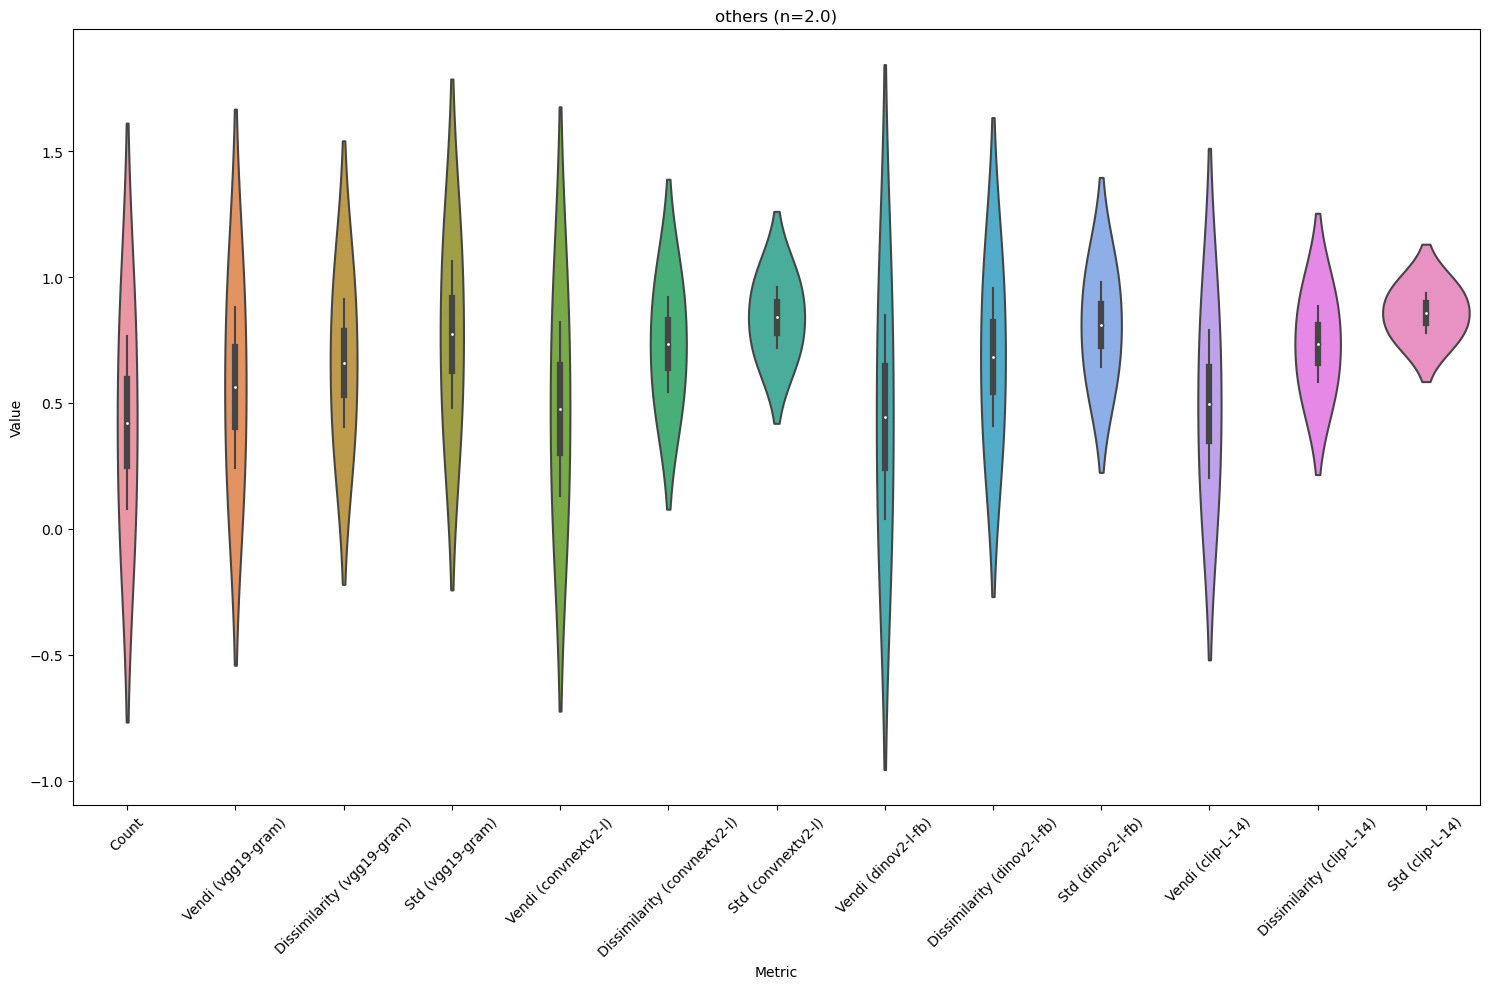

In [78]:
categories = full_df['Category'].unique()

for category in categories:
    plt.figure(figsize=(15, 10))

    filtered_df = full_df[full_df['Category'] == category]
    count_values = filtered_df.shape[0]/(len(diversity_metrics.columns)-1)

    sns.violinplot(x='Metric', y='Value', data=filtered_df)
    plt.title(f"{category} (n={count_values})")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'figures/categories/{category}.png')

In [82]:
metrics_avg['Vendi (clip-L-14)']['Minimalism']

[('Minimalism/agnes-martin', 0.24825222260596153),
 ('Minimalism/brice-marden', 0.29154747523839586)]